In [1]:
import world
import agents
from ff import Solved
import ff
import pddl_functions
from teacher import TeacherAgent
import os
import numpy as np
from scipy.stats import norm
from IPython.display import clear_output
import matplotlib.pyplot as plt
import pandas as pd
import gc
import pickle
from evaluation import plot_cumsum, test_colour_model, ResultsFile, get_agent
import configparser
import logging
from collections import defaultdict
import prob_model
import sqlalchemy

In [2]:
def get_kde_config(config_name):
    model_config = configparser.ConfigParser()
    model_config.read('config/kde.ini')
    model_config = model_config[config_name]
    config_dict = {}
    config_dict['use_3d'] = model_config.getboolean('use_3d')
    config_dict['fix_bw'] = model_config.getboolean('fix_bw')
    config_dict['bw'] = model_config.getfloat('bw')
    config_dict['norm'] = model_config.getfloat('norm')
    return config_dict


In [3]:
problem_dir = 'onerule'
problems = list(os.listdir('tworules'))


In [4]:
w = world.PDDLWorld('blocks-domain.pddl', '{}/{}'.format(problem_dir, problems[0]))
teacher = TeacherAgent()
agent = agents.CorrectingAgent(w, teacher=teacher, update_negative=False, 
                               colour_model_type='kde', model_config=get_kde_config('fixed_bw'))

Parsing domain blocks-domain.pddl
Parsing problem tworules/problem1.pddl


Parsing domain blocks-domain.pddl
Parsing problem tworules/problem1.pddl
0 []


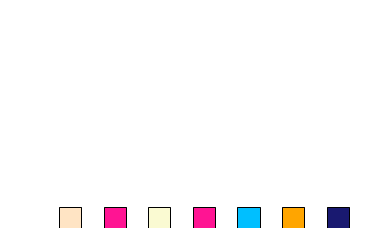

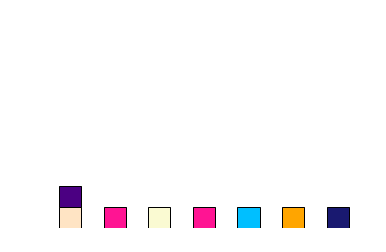

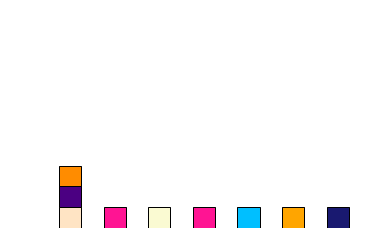

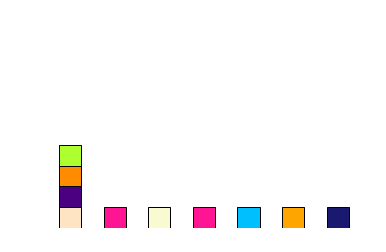

T: No, now you cannot put b1 in the tower because you must put green blocks on yellow blocks


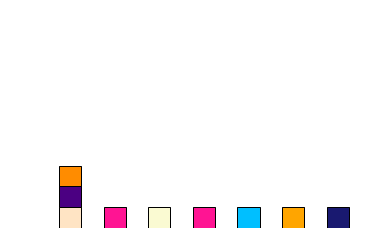

0.4831370725270172 [('b1', 'yellow'), ('b6', 'green')]


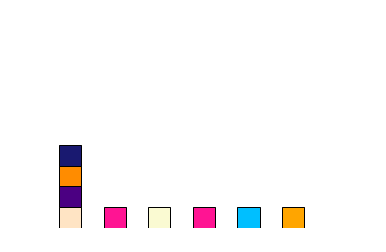

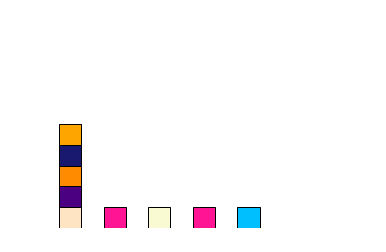

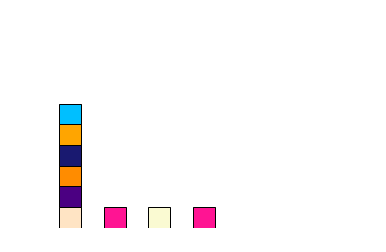

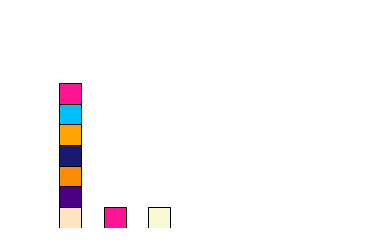

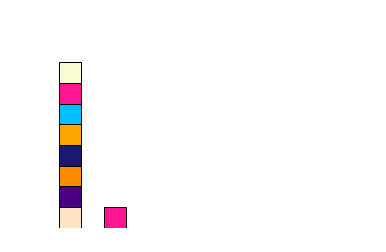

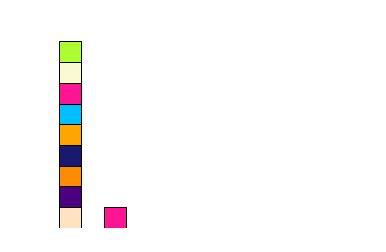

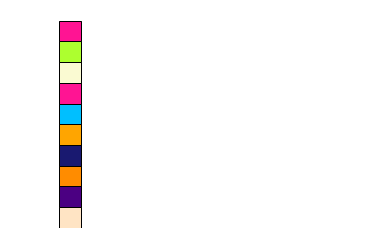

Parsing domain blocks-domain.pddl
Parsing problem tworules/problem10.pddl
1.320073338384541 [('b1', 'yellow'), ('b2', 'green'), ('b9', 'yellow')]
1.6162759665795272 [('b1', 'yellow'), ('b2', 'green'), ('b9', 'yellow'), ('b3', 'green')]


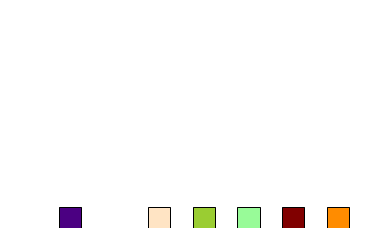

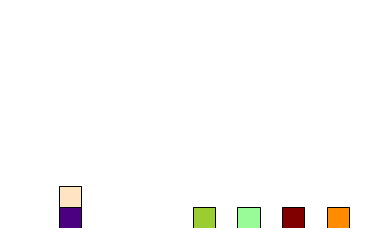

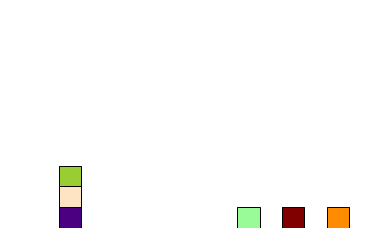

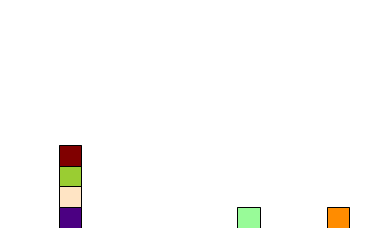

(forall (?x) (or (not (red ?x)) (exists (?y) (and (blue ?y) (on ?x ?y)))))
T: no, put red blocks on blue blocks


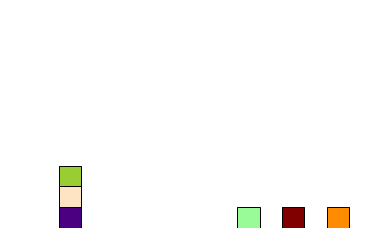

6.881437581777434 [('b2', 'green'), ('b4', 'red'), ('b9', 'yellow')]
6.881437581777434 [('b2', 'green'), ('b4', 'red'), ('b9', 'yellow'), ('b2', 'blue')]
11.202276298394327 [('b2', 'green'), ('b9', 'yellow')]
11.202276298394327 [('b2', 'green'), ('b9', 'yellow'), ('b2', 'blue')]
11.498478926589314 [('b2', 'green'), ('b9', 'yellow'), ('b3', 'green')]


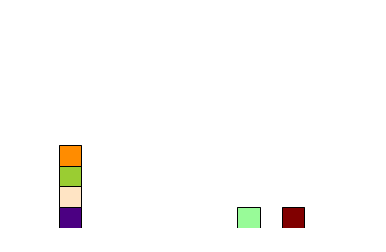

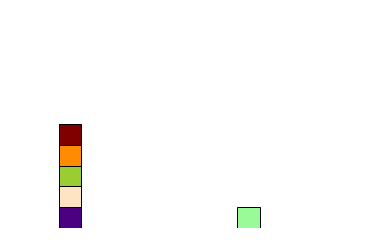

(forall (?x) (or (not (red ?x)) (exists (?y) (and (blue ?y) (on ?x ?y)))))
T: no, put red blocks on blue blocks


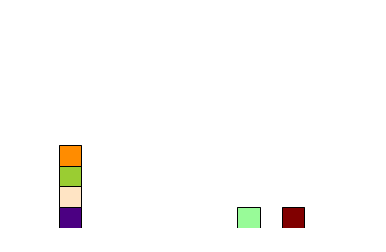

6.12220275348997 [('b4', 'red'), ('b9', 'yellow')]
6.12220275348997 [('b4', 'red'), ('b9', 'yellow'), ('b3', 'blue')]
6.418405381684956 [('b4', 'red'), ('b9', 'yellow'), ('b3', 'green')]
6.418405381684956 [('b4', 'red'), ('b9', 'yellow'), ('b3', 'blue'), ('b3', 'green')]


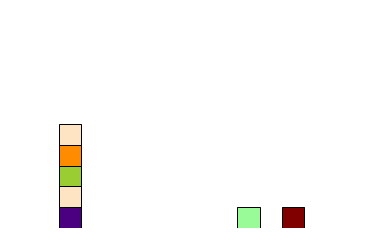

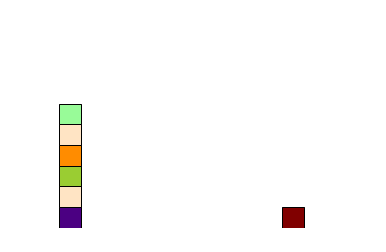

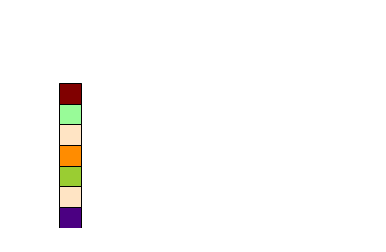

(forall (?x) (or (not (red ?x)) (exists (?y) (and (blue ?y) (on ?x ?y)))))
T: no, put red blocks on blue blocks


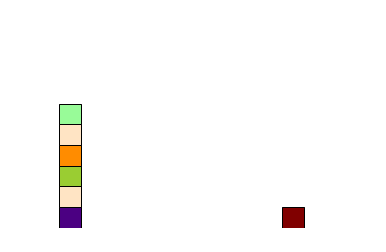

4.6397771857123145 [('b4', 'red')]
4.6397771857123145 [('b4', 'red'), ('b3', 'blue')]
8.960615902329206 []


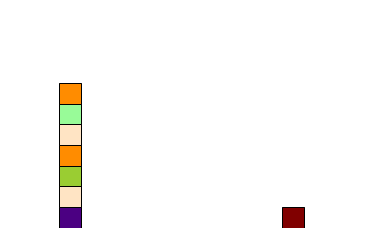

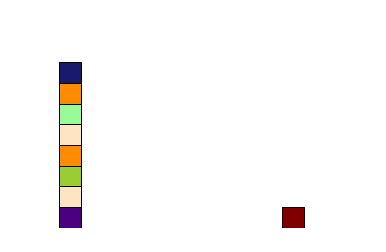

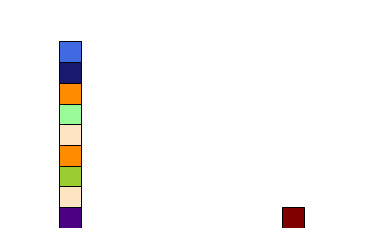

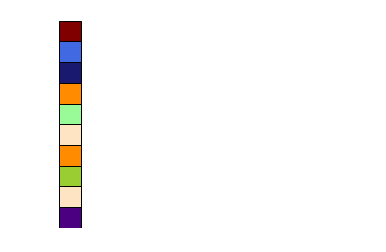

Parsing domain blocks-domain.pddl
Parsing problem tworules/problem11.pddl
8.2855096500234 [('b2', 'yellow'), ('b6', 'yellow'), ('b8', 'red'), ('b9', 'red')]
8.2855096500234 [('b2', 'yellow'), ('b6', 'yellow'), ('b8', 'red'), ('b9', 'red'), ('b0', 'blue')]
8.2855096500234 [('b2', 'yellow'), ('b6', 'yellow'), ('b8', 'red'), ('b9', 'red'), ('b0', 'blue'), ('b1', 'blue')]
8.581712278218387 [('b2', 'yellow'), ('b6', 'yellow'), ('b8', 'red'), ('b9', 'red'), ('b5', 'green')]
8.581712278218387 [('b2', 'yellow'), ('b6', 'yellow'), ('b8', 'red'), ('b9', 'red'), ('b0', 'blue'), ('b5', 'green')]
8.581712278218387 [('b2', 'yellow'), ('b6', 'yellow'), ('b8', 'red'), ('b9', 'red'), ('b5', 'green'), ('b0', 'blue')]
8.581712278218387 [('b2', 'yellow'), ('b6', 'yellow'), ('b8', 'red'), ('b9', 'red'), ('b0', 'blue'), ('b1', 'blue'), ('b5', 'green')]
8.581712278218387 [('b2', 'yellow'), ('b6', 'yellow'), ('b8', 'red'), ('b9', 'red'), ('b0', 'blue'), ('b5', 'green'), ('b1', 'blue')]
8.581712278218387 [('b2

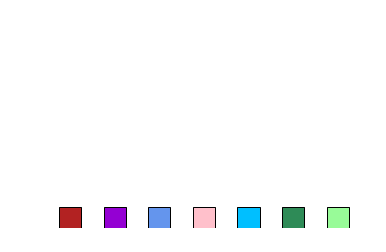

(forall (?x) (or (not (red ?x)) (exists (?y) (and (blue ?y) (on ?x ?y)))))
T: no, put red blocks on blue blocks


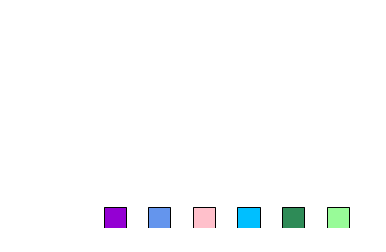

8.42612158082773 [('b2', 'yellow'), ('b6', 'yellow'), ('b8', 'red'), ('b9', 'red')]
8.42612158082773 [('b2', 'yellow'), ('b6', 'yellow'), ('b8', 'red'), ('b9', 'red'), ('b0', 'blue')]
8.42612158082773 [('b2', 'yellow'), ('b6', 'yellow'), ('b8', 'red'), ('b9', 'red'), ('b0', 'blue'), ('b1', 'blue')]
8.722324209022716 [('b2', 'yellow'), ('b6', 'yellow'), ('b8', 'red'), ('b9', 'red'), ('b5', 'green')]
8.722324209022716 [('b2', 'yellow'), ('b6', 'yellow'), ('b8', 'red'), ('b9', 'red'), ('b0', 'blue'), ('b5', 'green')]
8.722324209022716 [('b2', 'yellow'), ('b6', 'yellow'), ('b8', 'red'), ('b9', 'red'), ('b5', 'green'), ('b0', 'blue')]
8.722324209022716 [('b2', 'yellow'), ('b6', 'yellow'), ('b8', 'red'), ('b9', 'red'), ('b0', 'blue'), ('b1', 'blue'), ('b5', 'green')]
8.722324209022716 [('b2', 'yellow'), ('b6', 'yellow'), ('b8', 'red'), ('b9', 'red'), ('b0', 'blue'), ('b5', 'green'), ('b1', 'blue')]
8.722324209022716 [('b2', 'yellow'), ('b6', 'yellow'), ('b8', 'red'), ('b9', 'red'), ('b5', 'g

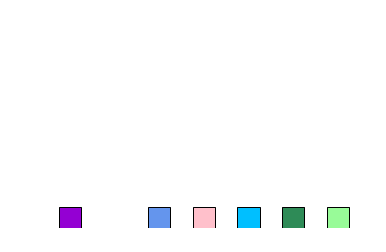

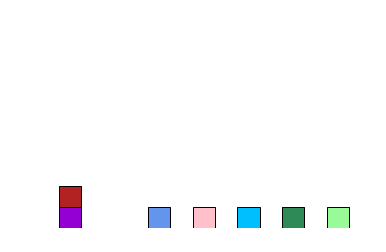

(forall (?x) (or (not (red ?x)) (exists (?y) (and (blue ?y) (on ?x ?y)))))
T: no, put red blocks on blue blocks


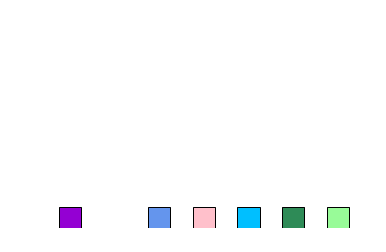

8.42612158082773 [('b2', 'yellow'), ('b6', 'yellow'), ('b8', 'red'), ('b9', 'red')]
8.42612158082773 [('b2', 'yellow'), ('b6', 'yellow'), ('b8', 'red'), ('b9', 'red'), ('b0', 'blue')]
8.42612158082773 [('b2', 'yellow'), ('b6', 'yellow'), ('b8', 'red'), ('b9', 'red'), ('b0', 'blue'), ('b1', 'blue')]
8.722324209022716 [('b2', 'yellow'), ('b6', 'yellow'), ('b8', 'red'), ('b9', 'red'), ('b5', 'green')]
8.722324209022716 [('b2', 'yellow'), ('b6', 'yellow'), ('b8', 'red'), ('b9', 'red'), ('b0', 'blue'), ('b5', 'green')]
8.722324209022716 [('b2', 'yellow'), ('b6', 'yellow'), ('b8', 'red'), ('b9', 'red'), ('b5', 'green'), ('b0', 'blue')]
8.722324209022716 [('b2', 'yellow'), ('b6', 'yellow'), ('b8', 'red'), ('b9', 'red'), ('b0', 'blue'), ('b1', 'blue'), ('b5', 'green')]
8.722324209022716 [('b2', 'yellow'), ('b6', 'yellow'), ('b8', 'red'), ('b9', 'red'), ('b0', 'blue'), ('b5', 'green'), ('b1', 'blue')]
8.722324209022716 [('b2', 'yellow'), ('b6', 'yellow'), ('b8', 'red'), ('b9', 'red'), ('b5', 'g

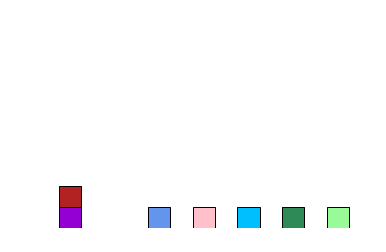

(forall (?x) (or (not (red ?x)) (exists (?y) (and (blue ?y) (on ?x ?y)))))
T: no, put red blocks on blue blocks


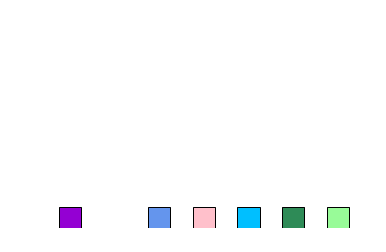

8.439814275719387 [('b2', 'yellow'), ('b6', 'yellow'), ('b8', 'red'), ('b9', 'red')]
8.439814275719387 [('b2', 'yellow'), ('b6', 'yellow'), ('b8', 'red'), ('b9', 'red'), ('b0', 'blue')]
8.439814275719387 [('b2', 'yellow'), ('b6', 'yellow'), ('b8', 'red'), ('b9', 'red'), ('b0', 'blue'), ('b1', 'blue')]
8.736016903914374 [('b2', 'yellow'), ('b6', 'yellow'), ('b8', 'red'), ('b9', 'red'), ('b5', 'green')]
8.736016903914374 [('b2', 'yellow'), ('b6', 'yellow'), ('b8', 'red'), ('b9', 'red'), ('b0', 'blue'), ('b5', 'green')]
8.736016903914374 [('b2', 'yellow'), ('b6', 'yellow'), ('b8', 'red'), ('b9', 'red'), ('b5', 'green'), ('b0', 'blue')]
8.736016903914374 [('b2', 'yellow'), ('b6', 'yellow'), ('b8', 'red'), ('b9', 'red'), ('b0', 'blue'), ('b1', 'blue'), ('b5', 'green')]
8.736016903914374 [('b2', 'yellow'), ('b6', 'yellow'), ('b8', 'red'), ('b9', 'red'), ('b0', 'blue'), ('b5', 'green'), ('b1', 'blue')]
8.736016903914374 [('b2', 'yellow'), ('b6', 'yellow'), ('b8', 'red'), ('b9', 'red'), ('b5',

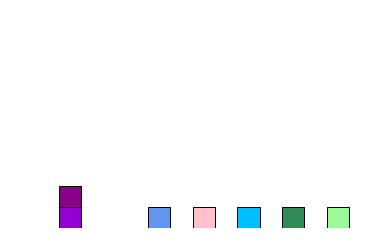

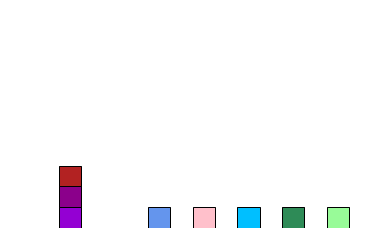

(forall (?x) (or (not (red ?x)) (exists (?y) (and (blue ?y) (on ?x ?y)))))
T: no, put red blocks on blue blocks


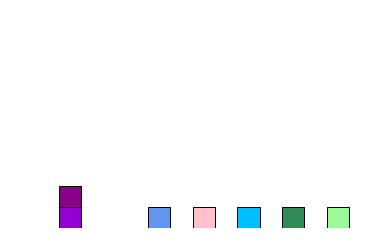

7.7463201154553625 [('b2', 'yellow'), ('b6', 'yellow'), ('b8', 'red'), ('b9', 'red')]
7.7463201154553625 [('b2', 'yellow'), ('b6', 'yellow'), ('b8', 'red'), ('b9', 'red'), ('b1', 'blue')]
7.7463201154553625 [('b2', 'yellow'), ('b6', 'yellow'), ('b8', 'red'), ('b9', 'red'), ('b1', 'blue'), ('b2', 'blue')]
8.042522743650348 [('b2', 'yellow'), ('b6', 'yellow'), ('b8', 'red'), ('b9', 'red'), ('b5', 'green')]
8.042522743650348 [('b2', 'yellow'), ('b6', 'yellow'), ('b8', 'red'), ('b9', 'red'), ('b1', 'blue'), ('b5', 'green')]
8.042522743650348 [('b2', 'yellow'), ('b6', 'yellow'), ('b8', 'red'), ('b9', 'red'), ('b5', 'green'), ('b1', 'blue')]
8.042522743650348 [('b2', 'yellow'), ('b6', 'yellow'), ('b8', 'red'), ('b9', 'red'), ('b1', 'blue'), ('b2', 'blue'), ('b5', 'green')]
8.042522743650348 [('b2', 'yellow'), ('b6', 'yellow'), ('b8', 'red'), ('b9', 'red'), ('b1', 'blue'), ('b5', 'green'), ('b2', 'blue')]
8.042522743650348 [('b2', 'yellow'), ('b6', 'yellow'), ('b8', 'red'), ('b9', 'red'), ('b

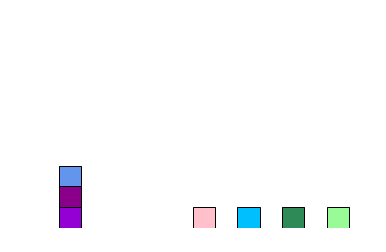

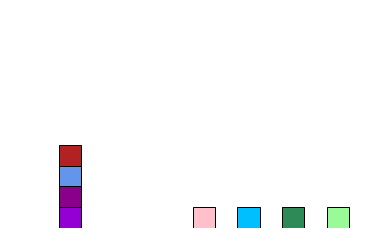

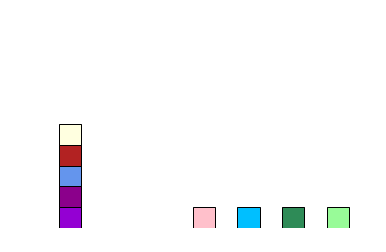

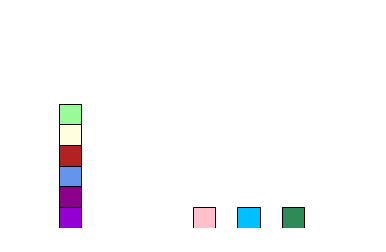

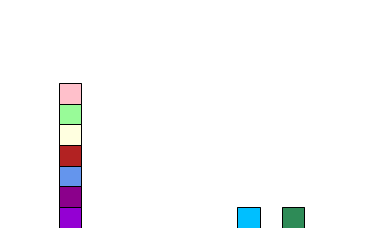

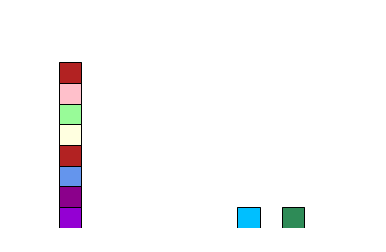

(forall (?x) (or (not (red ?x)) (exists (?y) (and (blue ?y) (on ?x ?y)))))
T: no, put red blocks on blue blocks


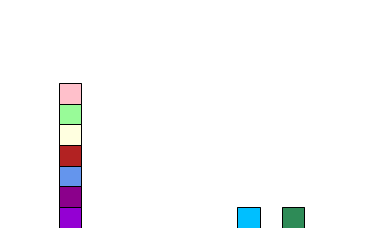

2.8672041493656573 [('b2', 'yellow'), ('b8', 'red')]
2.8672041493656573 [('b2', 'yellow'), ('b8', 'red'), ('b2', 'blue')]
5.860810958824743 [('b8', 'red')]
5.860810958824743 [('b8', 'red'), ('b2', 'blue')]
6.040591946050012 [('b2', 'yellow')]
9.034198755509097 []


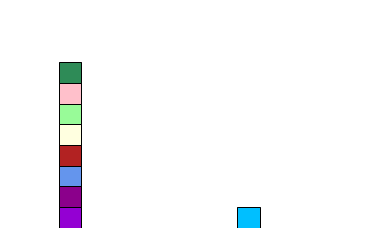

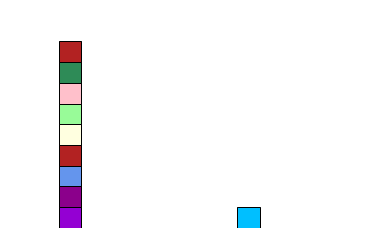

(forall (?x) (or (not (red ?x)) (exists (?y) (and (blue ?y) (on ?x ?y)))))
T: no, put red blocks on blue blocks


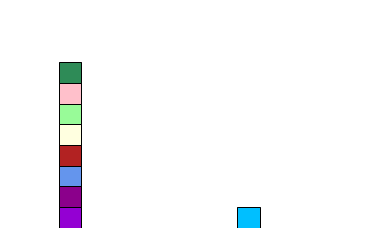

2.1246896747704507 [('b8', 'red')]
2.1246896747704507 [('b8', 'red'), ('b3', 'blue')]


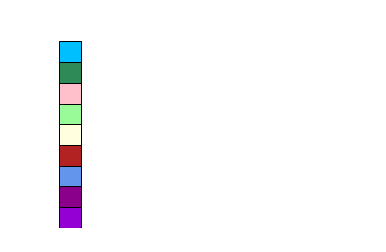

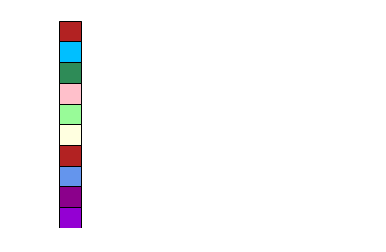

Parsing domain blocks-domain.pddl
Parsing problem tworules/problem12.pddl
7.603252177225987 [('b1', 'yellow'), ('b4', 'red'), ('b6', 'red'), ('b7', 'yellow')]
7.603252177225987 [('b1', 'yellow'), ('b4', 'red'), ('b6', 'red'), ('b7', 'yellow'), ('b0', 'blue')]
7.603252177225987 [('b1', 'yellow'), ('b4', 'red'), ('b6', 'red'), ('b7', 'yellow'), ('b0', 'blue'), ('b1', 'blue')]
9.963851635835322 [('b1', 'yellow'), ('b4', 'red'), ('b6', 'red'), ('b7', 'yellow'), ('b5', 'green')]
9.963851635835322 [('b1', 'yellow'), ('b4', 'red'), ('b6', 'red'), ('b7', 'yellow'), ('b0', 'blue'), ('b5', 'green')]
9.963851635835322 [('b1', 'yellow'), ('b4', 'red'), ('b6', 'red'), ('b7', 'yellow'), ('b5', 'green'), ('b0', 'blue')]
9.963851635835322 [('b1', 'yellow'), ('b4', 'red'), ('b6', 'red'), ('b7', 'yellow'), ('b0', 'blue'), ('b1', 'blue'), ('b5', 'green')]
9.963851635835322 [('b1', 'yellow'), ('b4', 'red'), ('b6', 'red'), ('b7', 'yellow'), ('b0', 'blue'), ('b5', 'green'), ('b1', 'blue')]
9.963851635835322

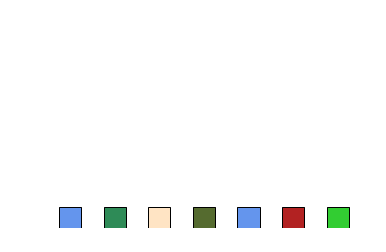

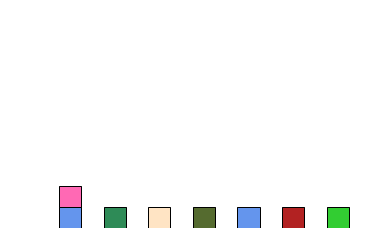

T: No, now you cannot put b4 in the tower because you must put red blocks on blue blocks


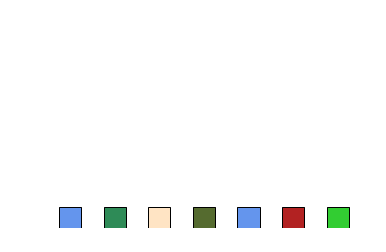

0.7121544960377293 [('b1', 'yellow'), ('b3', 'blue'), ('b4', 'red'), ('b6', 'red'), ('b7', 'yellow'), ('b9', 'blue')]
3.072753954647064 [('b1', 'yellow'), ('b3', 'blue'), ('b4', 'red'), ('b6', 'red'), ('b7', 'yellow'), ('b9', 'blue'), ('b5', 'green')]
3.7057613054968153 [('b1', 'yellow'), ('b3', 'blue'), ('b4', 'red'), ('b6', 'red'), ('b9', 'blue')]
6.06636076410615 [('b1', 'yellow'), ('b3', 'blue'), ('b4', 'red'), ('b6', 'red'), ('b9', 'blue'), ('b5', 'green')]


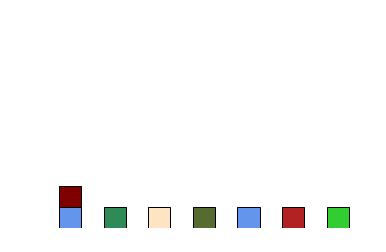

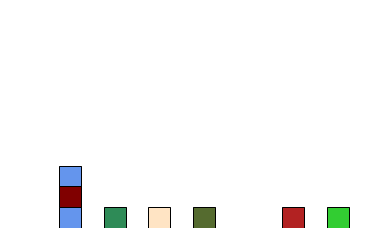

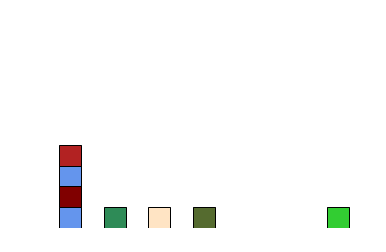

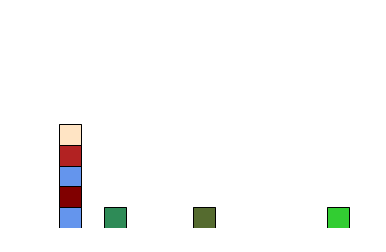

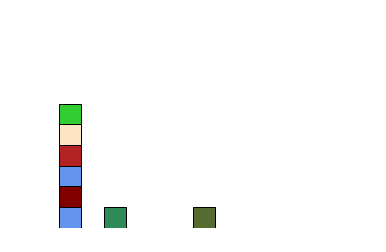

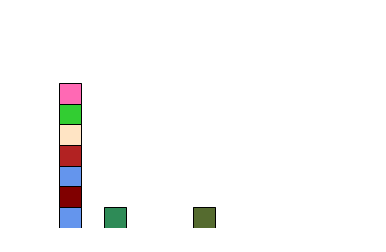

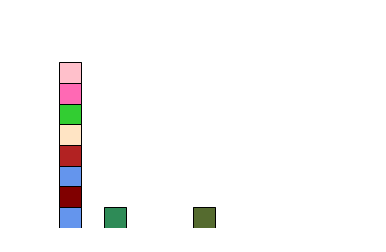

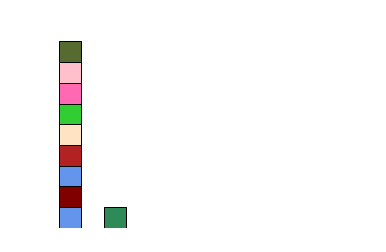

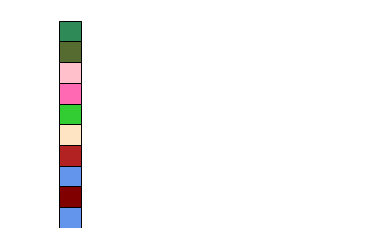

Parsing domain blocks-domain.pddl
Parsing problem tworules/problem13.pddl
1.098351100421781 [('b5', 'red'), ('b7', 'red'), ('b9', 'yellow')]
3.2953373923124927 [('b5', 'red'), ('b9', 'yellow')]
5.446192392795491 [('b5', 'red'), ('b7', 'red')]
6.491119044681844 [('b9', 'yellow')]
7.555168879672922 [('b5', 'red'), ('b7', 'red'), ('b9', 'yellow'), ('b8', 'green')]
7.643178684686203 [('b5', 'red')]
8.61018547757063 [('b5', 'red'), ('b7', 'red'), ('b9', 'yellow'), ('b9', 'blue')]
9.752155171563633 [('b5', 'red'), ('b9', 'yellow'), ('b8', 'green')]
10.807171769461341 [('b5', 'red'), ('b9', 'yellow'), ('b9', 'blue')]
10.838960337055553 []


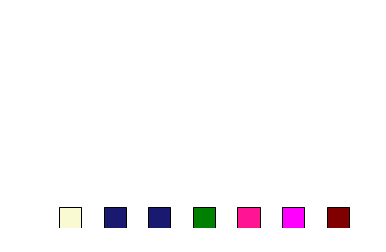

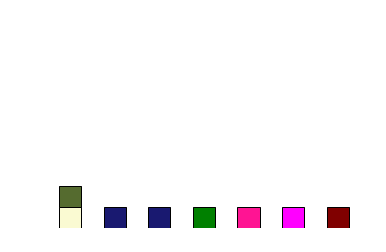

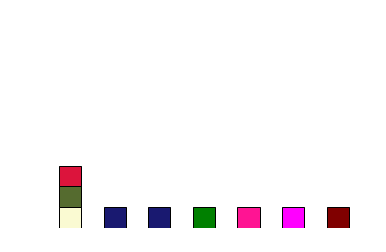

(forall (?x) (or (not (red ?x)) (exists (?y) (and (blue ?y) (on ?x ?y)))))
T: no, put red blocks on blue blocks


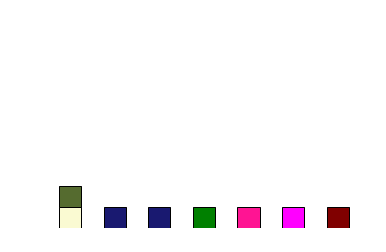

1.373536315171861 [('b5', 'red'), ('b7', 'red')]
3.9481920394955425 [('b5', 'red')]
6.844643811935137 []


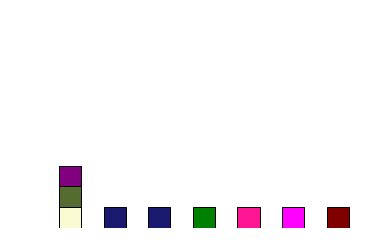

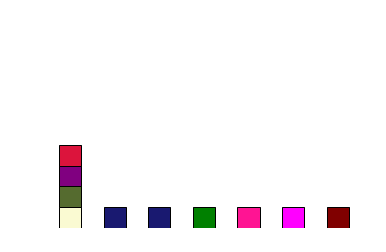

(forall (?x) (or (not (red ?x)) (exists (?y) (and (blue ?y) (on ?x ?y)))))
T: no, put red blocks on blue blocks


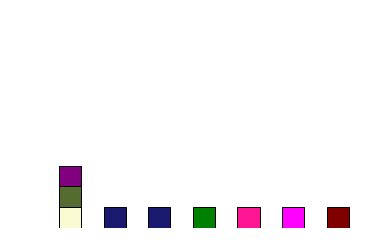

1.0950165858896466 [('b5', 'red'), ('b7', 'red')]
3.669672310213328 [('b5', 'red')]
6.566124082652923 []


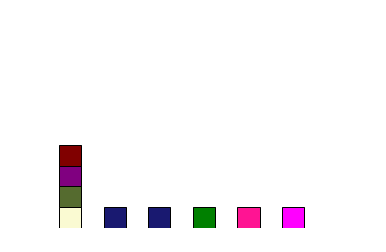

(forall (?x) (or (not (red ?x)) (exists (?y) (and (blue ?y) (on ?x ?y)))))
T: no, put red blocks on blue blocks


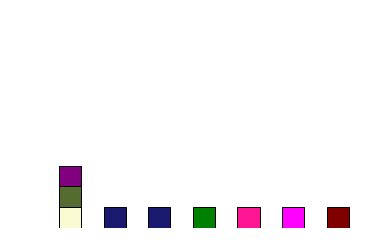

1.0444770718409497 [('b5', 'red'), ('b6', 'red'), ('b7', 'red')]
1.0875034790162221 [('b5', 'red'), ('b7', 'red')]
3.482647220033358 [('b5', 'red')]
6.681342124540533 []


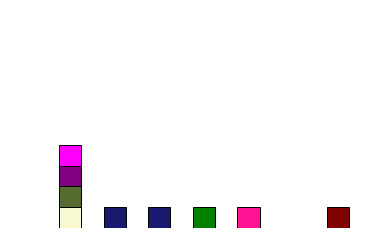

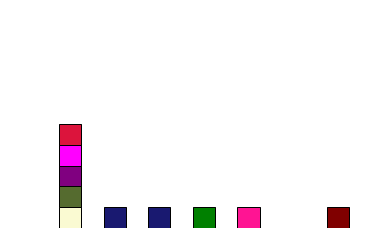

(forall (?x) (or (not (red ?x)) (exists (?y) (and (blue ?y) (on ?x ?y)))))
T: no, put red blocks on blue blocks


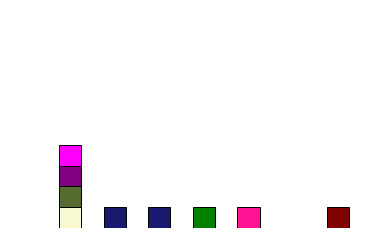

0.37234908442414544 [('b5', 'red'), ('b7', 'red')]
2.767492825441281 [('b5', 'red')]
5.966187729948456 []


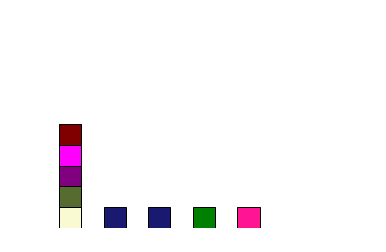

(forall (?x) (or (not (red ?x)) (exists (?y) (and (blue ?y) (on ?x ?y)))))
T: no, put red blocks on blue blocks


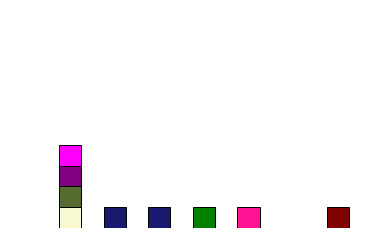

0.37234908442414544 [('b5', 'red'), ('b7', 'red')]
2.767492825441281 [('b5', 'red')]
5.966187729948456 []


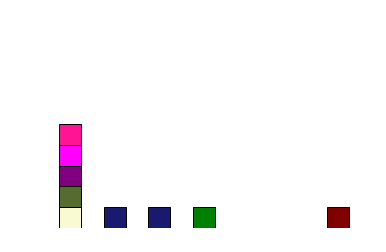

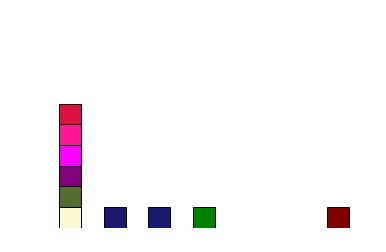

(forall (?x) (or (not (red ?x)) (exists (?y) (and (blue ?y) (on ?x ?y)))))
T: no, put red blocks on blue blocks


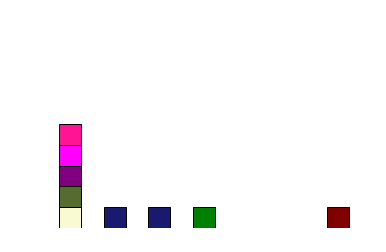

0.3723216239273434 [('b5', 'red'), ('b7', 'red')]
2.767465364944479 [('b5', 'red')]
5.966160269451654 []


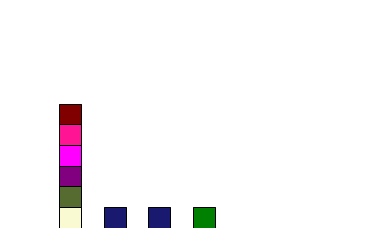

(forall (?x) (or (not (red ?x)) (exists (?y) (and (blue ?y) (on ?x ?y)))))
T: no, put red blocks on blue blocks


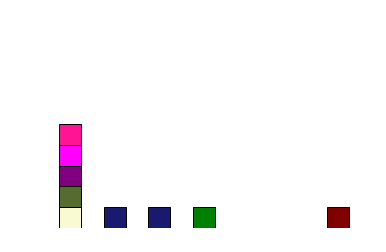

0.3723216239273434 [('b5', 'red'), ('b7', 'red')]
2.767465364944479 [('b5', 'red')]
5.966160269451654 []


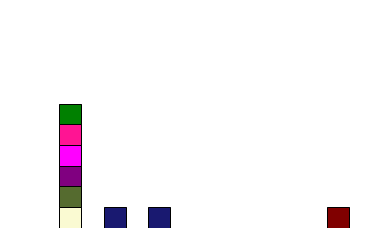

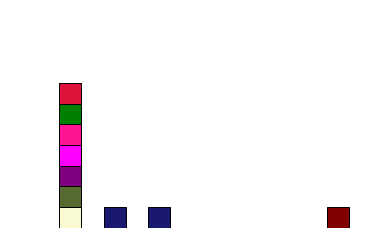

(forall (?x) (or (not (red ?x)) (exists (?y) (and (blue ?y) (on ?x ?y)))))
T: no, put red blocks on blue blocks


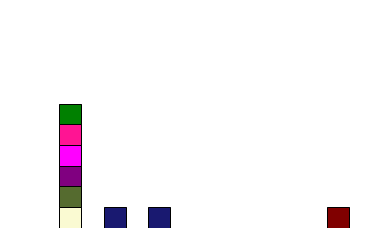

0.1961802097233416 [('b5', 'red'), ('b7', 'red')]
2.5913239507404775 [('b5', 'red')]
5.790018855247652 []


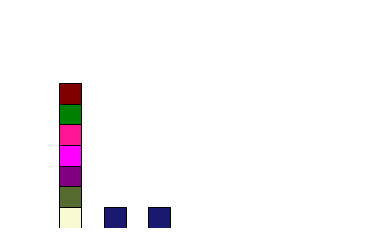

(forall (?x) (or (not (red ?x)) (exists (?y) (and (blue ?y) (on ?x ?y)))))
T: no, put red blocks on blue blocks


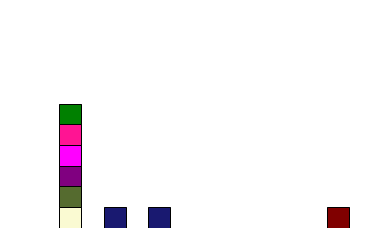

0.1961802097233416 [('b5', 'red'), ('b7', 'red')]
2.5913239507404775 [('b5', 'red')]
5.790018855247652 []


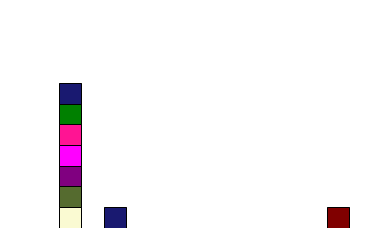

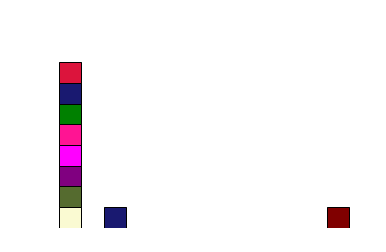

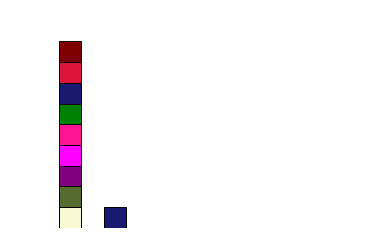

(forall (?x) (or (not (red ?x)) (exists (?y) (and (blue ?y) (on ?x ?y)))))
T: no, put red blocks on blue blocks


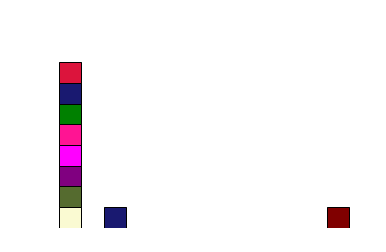

0.16069540765765838 [('b5', 'red'), ('b7', 'red')]
2.555839148674794 [('b5', 'red')]
5.754534053181969 []


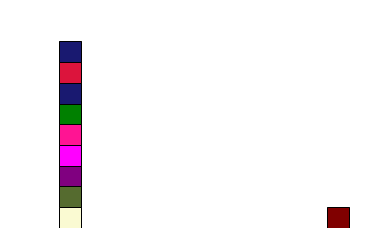

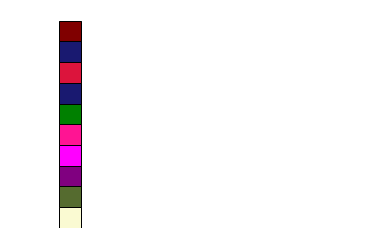

Parsing domain blocks-domain.pddl
Parsing problem tworules/problem14.pddl
1.5608816251769435 [('b2', 'yellow'), ('b5', 'green'), ('b6', 'red'), ('b7', 'yellow'), ('b9', 'red')]
1.603908032352216 [('b2', 'yellow'), ('b5', 'green'), ('b7', 'yellow'), ('b9', 'red')]
4.1193670739159725 [('b2', 'yellow'), ('b5', 'green'), ('b6', 'red'), ('b7', 'yellow'), ('b9', 'red'), ('b1', 'green')]
4.162393481091245 [('b2', 'yellow'), ('b5', 'green'), ('b7', 'yellow'), ('b9', 'red'), ('b1', 'green')]
4.5544884346360295 [('b2', 'yellow'), ('b5', 'green'), ('b6', 'red'), ('b9', 'red')]
4.597514841811302 [('b2', 'yellow'), ('b5', 'green'), ('b9', 'red')]
4.802602936859391 [('b2', 'yellow'), ('b5', 'green'), ('b7', 'yellow')]
6.9251043366254725 [('b2', 'yellow'), ('b5', 'green'), ('b6', 'red'), ('b7', 'yellow'), ('b9', 'red'), ('b7', 'blue')]
6.968130743800745 [('b2', 'yellow'), ('b5', 'green'), ('b7', 'yellow'), ('b9', 'red'), ('b7', 'blue')]
7.3610883855984195 [('b2', 'yellow'), ('b5', 'green'), ('b7', 'y

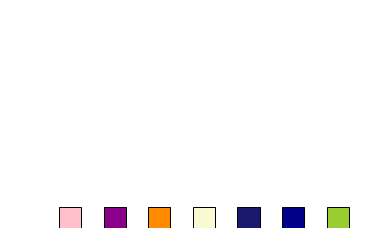

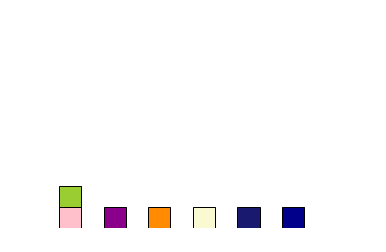

T: No, now you cannot put b2 in the tower because you must put green blocks on yellow blocks


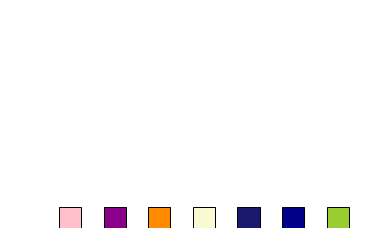

1.7406369977905667 [('b2', 'yellow'), ('b5', 'green'), ('b6', 'red'), ('b7', 'yellow'), ('b9', 'red')]
1.783663404965839 [('b2', 'yellow'), ('b5', 'green'), ('b7', 'yellow'), ('b9', 'red')]
2.977668342718043 [('b2', 'yellow'), ('b5', 'green'), ('b6', 'red'), ('b7', 'yellow'), ('b9', 'red'), ('b1', 'green')]
3.020694749893315 [('b2', 'yellow'), ('b5', 'green'), ('b7', 'yellow'), ('b9', 'red'), ('b1', 'green')]
4.735730250729181 [('b2', 'yellow'), ('b5', 'green'), ('b6', 'red'), ('b9', 'red')]
4.778756657904453 [('b2', 'yellow'), ('b5', 'green'), ('b9', 'red')]
4.982358309473014 [('b2', 'yellow'), ('b5', 'green'), ('b7', 'yellow')]
6.219389654400491 [('b2', 'yellow'), ('b5', 'green'), ('b7', 'yellow'), ('b1', 'green')]


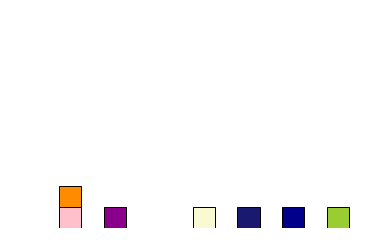

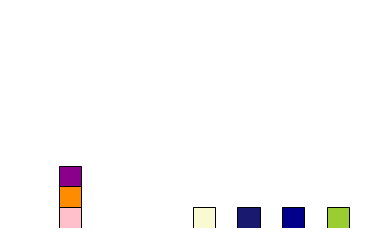

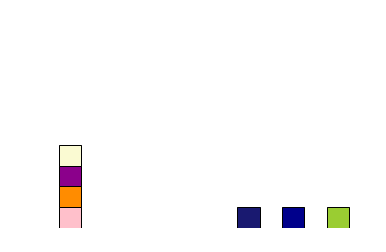

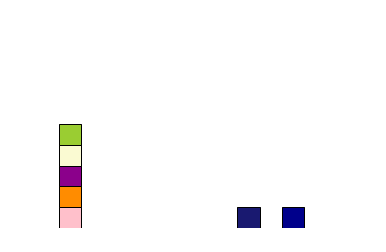

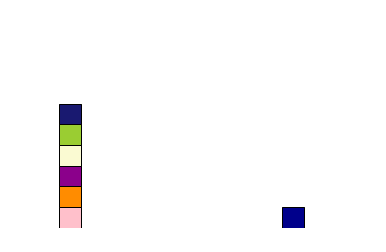

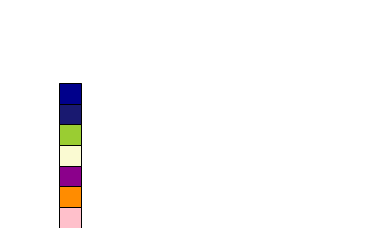

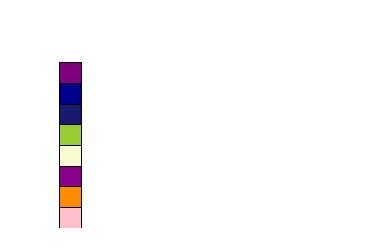

T: No, now you cannot put b9 in the tower because you must put red blocks on blue blocks


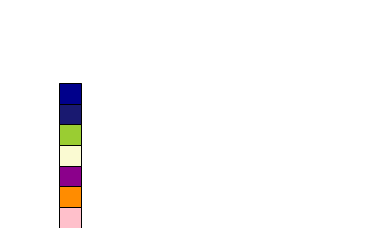

0.6371064233013914 [('b6', 'red'), ('b9', 'red'), ('b9', 'blue')]
1.9797115443361961 [('b9', 'red'), ('b9', 'blue')]
2.180208165293814 [('b6', 'red'), ('b9', 'red'), ('b9', 'blue'), ('b6', 'blue')]
3.522813286328619 [('b9', 'red'), ('b9', 'blue'), ('b6', 'blue')]
4.80313527807175 [('b6', 'red'), ('b9', 'red'), ('b9', 'blue'), ('b6', 'blue'), ('b8', 'blue')]
4.989690723563194 [('b6', 'red'), ('b9', 'red'), ('b6', 'blue')]
6.276628207348397 [('b6', 'red'), ('b9', 'red'), ('b9', 'blue'), ('b6', 'blue'), ('b4', 'red')]
6.332295844597999 [('b9', 'red'), ('b6', 'blue')]


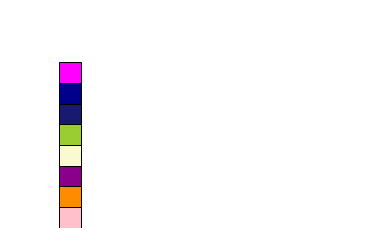

T: No, now you cannot put b9 in the tower because you must put red blocks on blue blocks


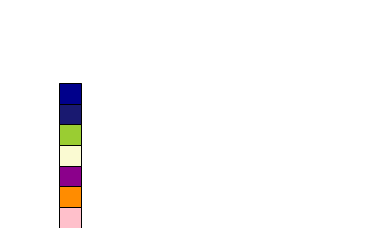

0.6371064233013914 [('b6', 'red'), ('b9', 'red'), ('b9', 'blue')]
1.9797115443361961 [('b9', 'red'), ('b9', 'blue')]
2.180208165293814 [('b6', 'red'), ('b9', 'red'), ('b9', 'blue'), ('b6', 'blue')]
3.522813286328619 [('b9', 'red'), ('b9', 'blue'), ('b6', 'blue')]
4.80313527807175 [('b6', 'red'), ('b9', 'red'), ('b9', 'blue'), ('b6', 'blue'), ('b8', 'blue')]
4.989690723563194 [('b6', 'red'), ('b9', 'red'), ('b6', 'blue')]
6.276628207348397 [('b6', 'red'), ('b9', 'red'), ('b9', 'blue'), ('b6', 'blue'), ('b4', 'red')]
6.332295844597999 [('b9', 'red'), ('b6', 'blue')]
7.61261783634113 [('b6', 'red'), ('b9', 'red'), ('b6', 'blue'), ('b8', 'blue')]
7.619233328383202 [('b9', 'red'), ('b9', 'blue'), ('b6', 'blue'), ('b4', 'red')]
8.899555320126332 [('b6', 'red'), ('b9', 'red'), ('b9', 'blue'), ('b6', 'blue'), ('b8', 'blue'), ('b4', 'red')]
8.899555320126332 [('b6', 'red'), ('b9', 'red'), ('b9', 'blue'), ('b6', 'blue'), ('b4', 'red'), ('b8', 'blue')]
14.159195841211034 [('b6', 'red'), ('b9', 'r

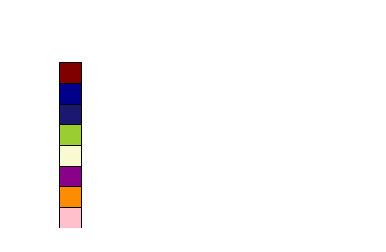

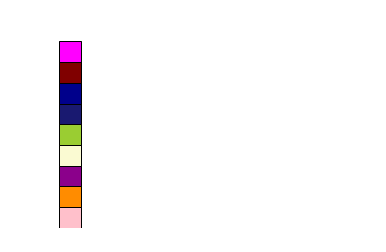

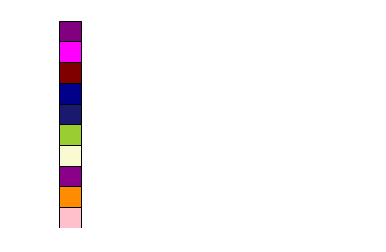

Parsing domain blocks-domain.pddl
Parsing problem tworules/problem15.pddl
4.047382931889929 [('b5', 'red'), ('b7', 'blue'), ('b8', 'red'), ('b9', 'red')]
4.208789190392547 [('b5', 'red'), ('b7', 'blue'), ('b8', 'red'), ('b9', 'red'), ('b0', 'blue')]
4.273044516950796 [('b5', 'red'), ('b7', 'blue'), ('b8', 'red')]
4.370195448895166 [('b5', 'red'), ('b7', 'blue'), ('b8', 'red'), ('b9', 'red'), ('b0', 'blue'), ('b1', 'blue')]


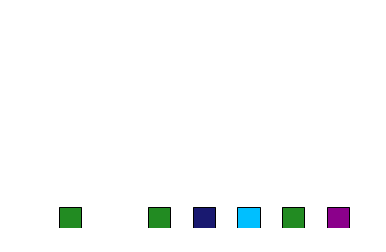

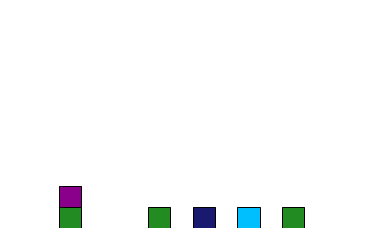

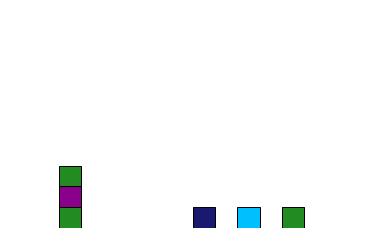

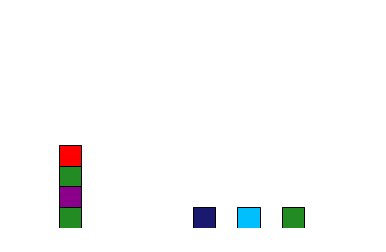

(forall (?x) (or (not (red ?x)) (exists (?y) (and (blue ?y) (on ?x ?y)))))
T: no, put red blocks on blue blocks


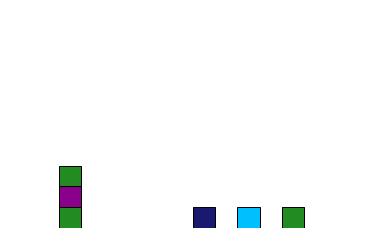

2.891377564091408 [('b1', 'blue'), ('b4', 'blue'), ('b7', 'blue'), ('b8', 'red'), ('b9', 'red')]
2.958955195530523 [('b4', 'blue'), ('b7', 'blue'), ('b8', 'red'), ('b9', 'red')]


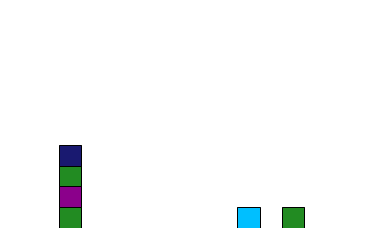

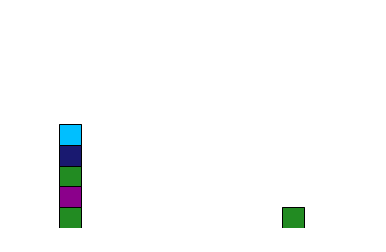

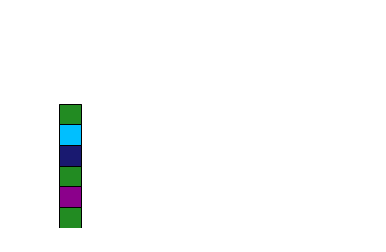

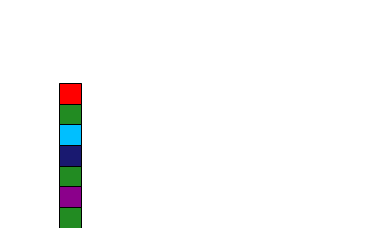

(forall (?x) (or (not (red ?x)) (exists (?y) (and (blue ?y) (on ?x ?y)))))
T: no, put red blocks on blue blocks


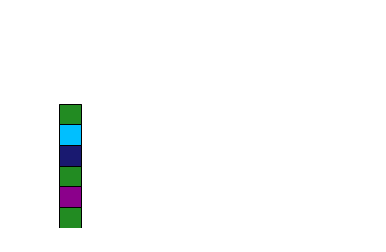

1.843198840066934 [('b4', 'blue'), ('b7', 'blue'), ('b8', 'red'), ('b9', 'red')]


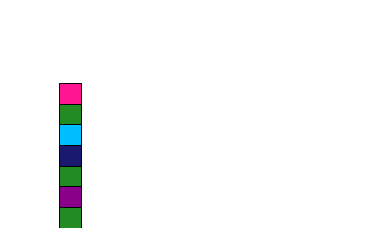

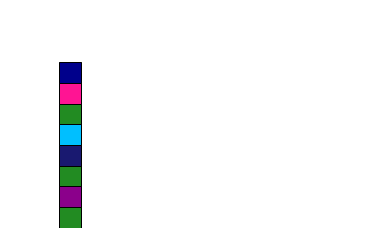

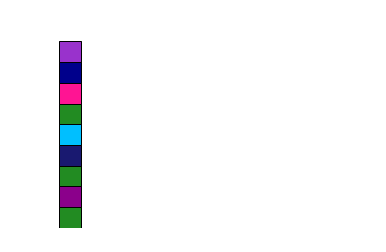

T: No, now you cannot put b8 in the tower because you must put red blocks on blue blocks


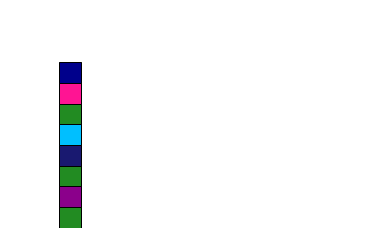

1.3208586234701667 [('b6', 'blue'), ('b7', 'blue'), ('b8', 'red')]
1.7886310560676209 [('b6', 'blue'), ('b7', 'blue'), ('b8', 'red'), ('b7', 'red')]
1.8390814509280777 [('b6', 'blue'), ('b8', 'red')]


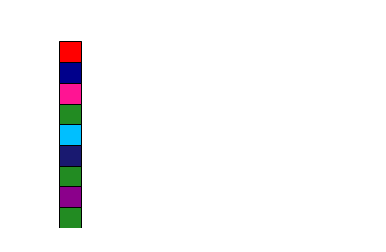

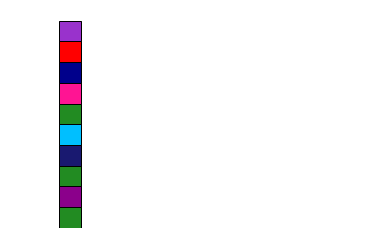

Parsing domain blocks-domain.pddl
Parsing problem tworules/problem16.pddl
3.647232700514823 [('b0', 'red'), ('b1', 'yellow'), ('b2', 'blue'), ('b3', 'red'), ('b3', 'blue'), ('b4', 'blue'), ('b5', 'yellow'), ('b6', 'red')]
3.877146936926649 [('b0', 'red'), ('b1', 'yellow'), ('b2', 'blue'), ('b3', 'red'), ('b3', 'blue'), ('b4', 'blue'), ('b5', 'yellow'), ('b6', 'red'), ('b8', 'green')]
4.302654454211273 [('b0', 'red'), ('b1', 'yellow'), ('b2', 'blue'), ('b3', 'red'), ('b3', 'blue'), ('b4', 'blue'), ('b5', 'yellow'), ('b6', 'red'), ('b8', 'green'), ('b7', 'green')]


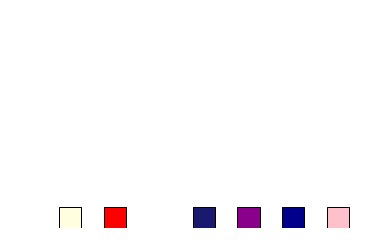

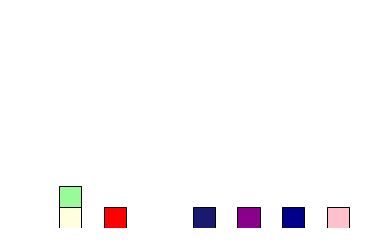

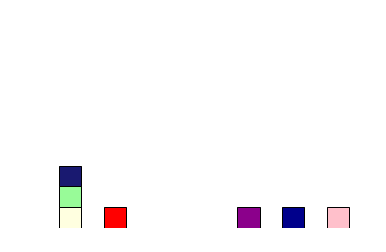

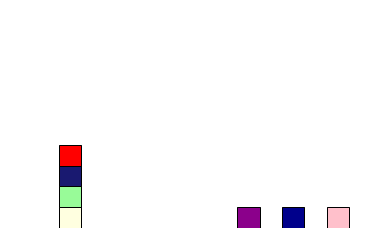

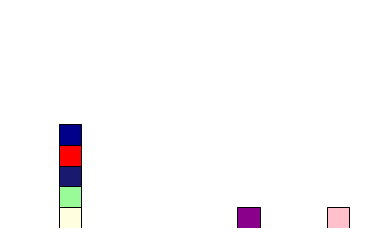

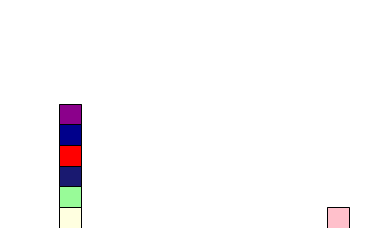

T: No, now you cannot put b6 in the tower because you must put red blocks on blue blocks


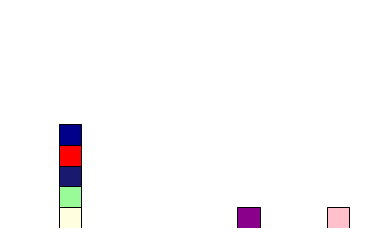

2.62838008840799 [('b3', 'red'), ('b3', 'blue'), ('b4', 'blue'), ('b5', 'yellow'), ('b6', 'red')]
2.8582943248198163 [('b3', 'red'), ('b3', 'blue'), ('b4', 'blue'), ('b5', 'yellow'), ('b6', 'red'), ('b8', 'green')]
5.623473341346605 [('b3', 'red'), ('b3', 'blue'), ('b4', 'blue'), ('b6', 'red')]
5.7647178890365165 [('b3', 'red'), ('b3', 'blue'), ('b4', 'blue'), ('b6', 'red'), ('b6', 'blue')]
5.853387577758431 [('b3', 'red'), ('b3', 'blue'), ('b4', 'blue'), ('b6', 'red'), ('b8', 'green')]
6.5796105080100595 [('b3', 'blue'), ('b4', 'blue'), ('b6', 'red')]
7.221791762107858 [('b3', 'red'), ('b4', 'blue'), ('b6', 'red')]
7.36303630979777 [('b3', 'red'), ('b4', 'blue'), ('b6', 'red'), ('b6', 'blue')]


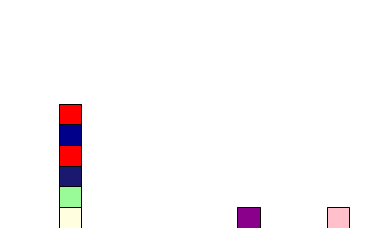

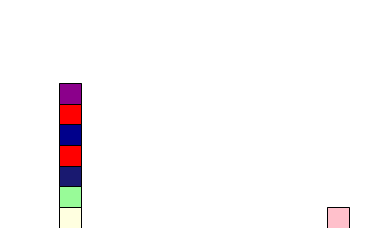

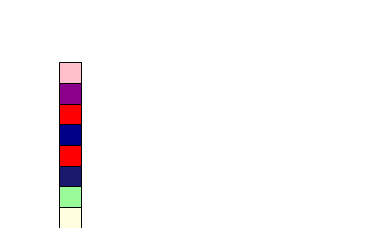

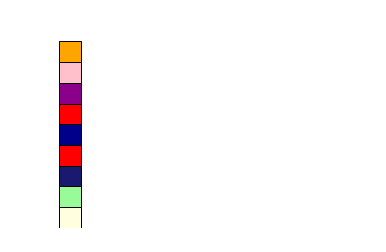

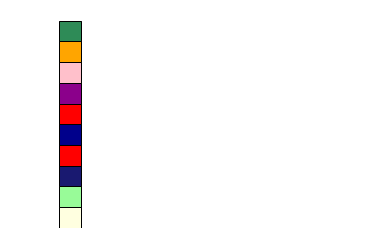

Parsing domain blocks-domain.pddl
Parsing problem tworules/problem17.pddl
4.2891709358684045 [('b1', 'yellow'), ('b3', 'blue'), ('b4', 'yellow'), ('b5', 'yellow'), ('b6', 'blue'), ('b7', 'blue'), ('b8', 'blue')]
4.502624408088806 [('b1', 'yellow'), ('b3', 'blue'), ('b4', 'yellow'), ('b5', 'yellow'), ('b6', 'blue'), ('b7', 'blue')]
4.5190851722802305 [('b1', 'yellow'), ('b3', 'blue'), ('b4', 'yellow'), ('b5', 'yellow'), ('b6', 'blue'), ('b7', 'blue'), ('b8', 'blue'), ('b9', 'green')]
4.732538644500632 [('b1', 'yellow'), ('b3', 'blue'), ('b4', 'yellow'), ('b5', 'yellow'), ('b6', 'blue'), ('b7', 'blue'), ('b9', 'green')]
4.734094686828971 [('b1', 'yellow'), ('b4', 'yellow'), ('b5', 'yellow'), ('b6', 'blue'), ('b7', 'blue')]
4.83866039695681 [('b1', 'yellow'), ('b3', 'blue'), ('b4', 'yellow'), ('b5', 'yellow'), ('b6', 'blue'), ('b7', 'blue'), ('b8', 'blue'), ('b0', 'red')]
4.964008923240797 [('b1', 'yellow'), ('b4', 'yellow'), ('b5', 'yellow'), ('b6', 'blue'), ('b7', 'blue'), ('b9', 'green

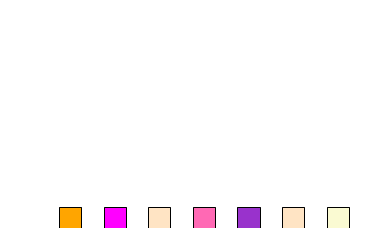

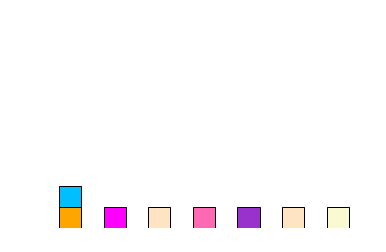

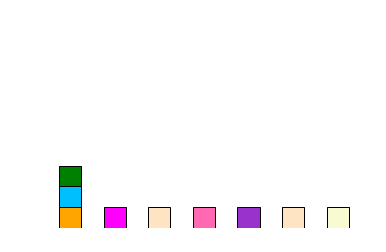

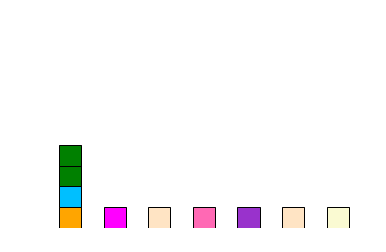

T: No, now you cannot put b5 in the tower because you must put green blocks on yellow blocks


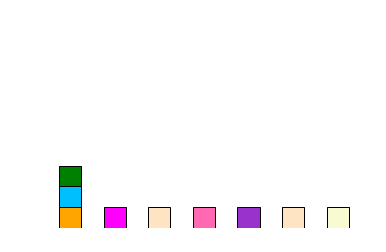

3.238870553781179 [('b1', 'yellow'), ('b3', 'blue'), ('b4', 'yellow'), ('b5', 'yellow'), ('b6', 'green'), ('b6', 'blue'), ('b7', 'green'), ('b7', 'blue')]
3.470340832521344 [('b1', 'yellow'), ('b4', 'yellow'), ('b5', 'yellow'), ('b6', 'green'), ('b6', 'blue'), ('b7', 'green'), ('b7', 'blue')]
3.788360014869584 [('b1', 'yellow'), ('b3', 'blue'), ('b4', 'yellow'), ('b5', 'yellow'), ('b6', 'green'), ('b6', 'blue'), ('b7', 'green'), ('b7', 'blue'), ('b0', 'red')]
4.01983029360975 [('b1', 'yellow'), ('b4', 'yellow'), ('b5', 'yellow'), ('b6', 'green'), ('b6', 'blue'), ('b7', 'green'), ('b7', 'blue'), ('b0', 'red')]
4.394790311752072 [('b1', 'yellow'), ('b4', 'yellow'), ('b5', 'yellow'), ('b6', 'green'), ('b7', 'green'), ('b7', 'blue')]
4.419312610824313 [('b1', 'yellow'), ('b3', 'blue'), ('b4', 'yellow'), ('b5', 'yellow'), ('b6', 'green'), ('b6', 'blue'), ('b7', 'green'), ('b7', 'blue'), ('b0', 'red'), ('b3', 'red')]
4.6507828895644785 [('b1', 'yellow'), ('b4', 'yellow'), ('b5', 'yellow'), (

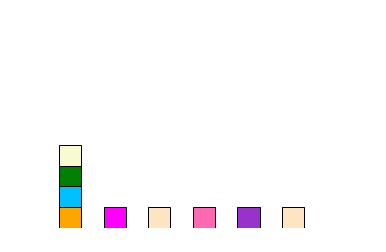

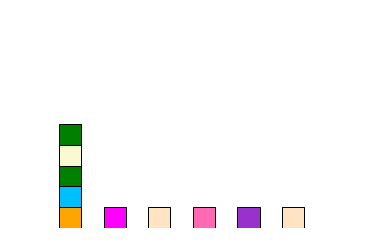

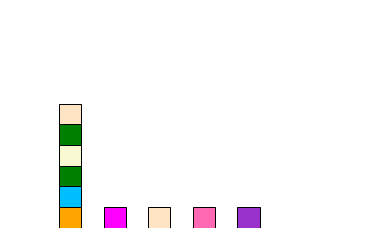

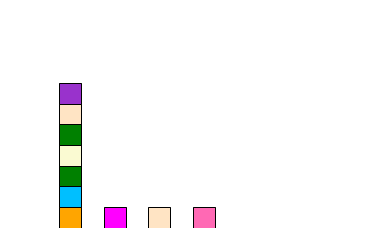

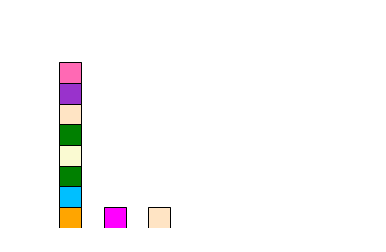

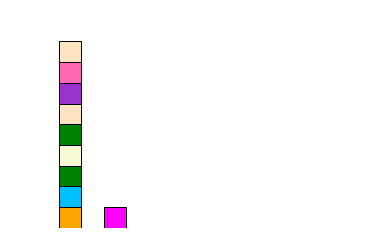

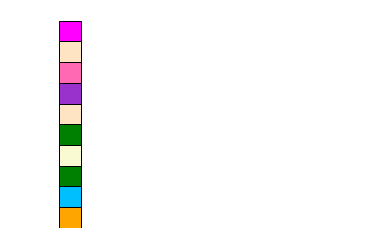

Parsing domain blocks-domain.pddl
Parsing problem tworules/problem18.pddl
4.66609490257521 [('b1', 'red'), ('b2', 'red'), ('b2', 'blue'), ('b3', 'blue'), ('b5', 'yellow'), ('b6', 'yellow'), ('b7', 'blue'), ('b9', 'green')]
4.7254902511138335 [('b1', 'red'), ('b2', 'red'), ('b2', 'blue'), ('b3', 'blue'), ('b5', 'yellow'), ('b6', 'yellow'), ('b7', 'blue'), ('b9', 'green'), ('b4', 'green')]
4.897565181315375 [('b1', 'red'), ('b2', 'red'), ('b2', 'blue'), ('b3', 'blue'), ('b5', 'yellow'), ('b6', 'yellow'), ('b9', 'green')]
4.9569605298539985 [('b1', 'red'), ('b2', 'red'), ('b2', 'blue'), ('b3', 'blue'), ('b5', 'yellow'), ('b6', 'yellow'), ('b9', 'green'), ('b4', 'green')]


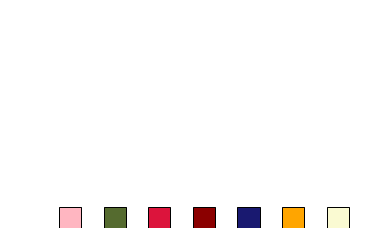

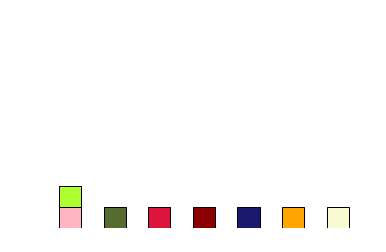

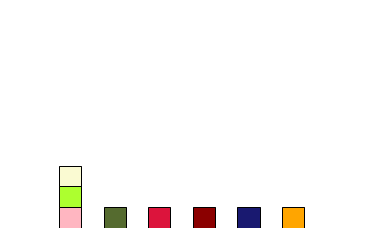

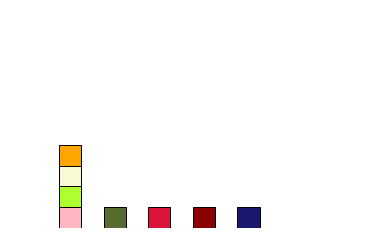

(forall (?y) (or (not (yellow ?y)) (exists (?x) (and (green ?x) (on ?x ?y)))))
T: no, put green blocks on yellow blocks


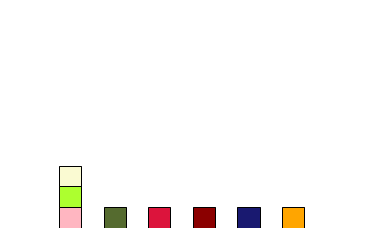

4.422815245395423 [('b1', 'red'), ('b2', 'red'), ('b2', 'blue'), ('b3', 'blue'), ('b5', 'yellow'), ('b7', 'blue')]
4.4819856071853055 [('b1', 'red'), ('b2', 'red'), ('b2', 'blue'), ('b3', 'blue'), ('b5', 'yellow'), ('b7', 'blue'), ('b4', 'green')]
4.654285524135588 [('b1', 'red'), ('b2', 'red'), ('b2', 'blue'), ('b3', 'blue'), ('b5', 'yellow')]
4.7134558859254705 [('b1', 'red'), ('b2', 'red'), ('b2', 'blue'), ('b3', 'blue'), ('b5', 'yellow'), ('b4', 'green')]
5.053767841350151 [('b1', 'red'), ('b2', 'red'), ('b2', 'blue'), ('b3', 'blue'), ('b5', 'yellow'), ('b7', 'blue'), ('b7', 'red')]
5.112938203140033 [('b1', 'red'), ('b2', 'red'), ('b2', 'blue'), ('b3', 'blue'), ('b5', 'yellow'), ('b7', 'blue'), ('b7', 'red'), ('b4', 'green')]
5.112938203140034 [('b1', 'red'), ('b2', 'red'), ('b2', 'blue'), ('b3', 'blue'), ('b5', 'yellow'), ('b7', 'blue'), ('b4', 'green'), ('b7', 'red')]
8.770047379364865 [('b1', 'red'), ('b2', 'red'), ('b2', 'blue'), ('b3', 'blue'), ('b7', 'blue')]
9.0015176581050

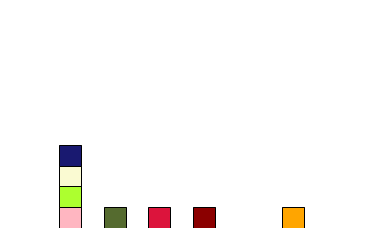

(forall (?y) (or (not (yellow ?y)) (exists (?x) (and (green ?x) (on ?x ?y)))))
T: no, put green blocks on yellow blocks


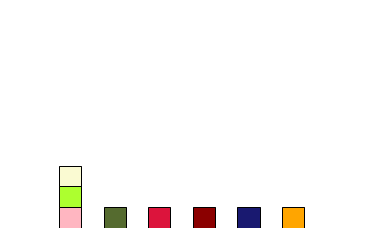

4.422815245521396 [('b1', 'red'), ('b2', 'red'), ('b2', 'blue'), ('b3', 'blue'), ('b5', 'yellow'), ('b7', 'blue')]
4.481985607325531 [('b1', 'red'), ('b2', 'red'), ('b2', 'blue'), ('b3', 'blue'), ('b5', 'yellow'), ('b7', 'blue'), ('b4', 'green')]
4.654285524261561 [('b1', 'red'), ('b2', 'red'), ('b2', 'blue'), ('b3', 'blue'), ('b5', 'yellow')]
4.713455886065696 [('b1', 'red'), ('b2', 'red'), ('b2', 'blue'), ('b3', 'blue'), ('b5', 'yellow'), ('b4', 'green')]
5.053767841476125 [('b1', 'red'), ('b2', 'red'), ('b2', 'blue'), ('b3', 'blue'), ('b5', 'yellow'), ('b7', 'blue'), ('b7', 'red')]
5.11293820328026 [('b1', 'red'), ('b2', 'red'), ('b2', 'blue'), ('b3', 'blue'), ('b5', 'yellow'), ('b7', 'blue'), ('b4', 'green'), ('b7', 'red')]
5.11293820328026 [('b1', 'red'), ('b2', 'red'), ('b2', 'blue'), ('b3', 'blue'), ('b5', 'yellow'), ('b7', 'blue'), ('b7', 'red'), ('b4', 'green')]
8.770047379490839 [('b1', 'red'), ('b2', 'red'), ('b2', 'blue'), ('b3', 'blue'), ('b7', 'blue')]
9.001517658231004 [

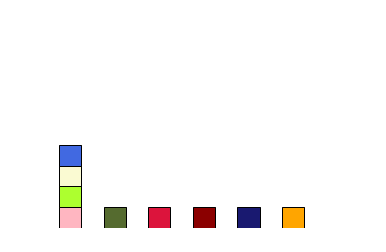

(forall (?y) (or (not (yellow ?y)) (exists (?x) (and (green ?x) (on ?x ?y)))))
T: no, put green blocks on yellow blocks


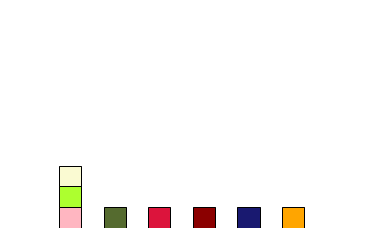

4.422815245521396 [('b1', 'red'), ('b2', 'red'), ('b2', 'blue'), ('b3', 'blue'), ('b5', 'yellow'), ('b7', 'blue')]
4.481985607325531 [('b1', 'red'), ('b2', 'red'), ('b2', 'blue'), ('b3', 'blue'), ('b5', 'yellow'), ('b7', 'blue'), ('b4', 'green')]
4.654285524261561 [('b1', 'red'), ('b2', 'red'), ('b2', 'blue'), ('b3', 'blue'), ('b5', 'yellow')]
4.713455886065696 [('b1', 'red'), ('b2', 'red'), ('b2', 'blue'), ('b3', 'blue'), ('b5', 'yellow'), ('b4', 'green')]
5.053767841476125 [('b1', 'red'), ('b2', 'red'), ('b2', 'blue'), ('b3', 'blue'), ('b5', 'yellow'), ('b7', 'blue'), ('b7', 'red')]
5.11293820328026 [('b1', 'red'), ('b2', 'red'), ('b2', 'blue'), ('b3', 'blue'), ('b5', 'yellow'), ('b7', 'blue'), ('b4', 'green'), ('b7', 'red')]
5.11293820328026 [('b1', 'red'), ('b2', 'red'), ('b2', 'blue'), ('b3', 'blue'), ('b5', 'yellow'), ('b7', 'blue'), ('b7', 'red'), ('b4', 'green')]
8.770047379490839 [('b1', 'red'), ('b2', 'red'), ('b2', 'blue'), ('b3', 'blue'), ('b7', 'blue')]
9.001517658231004 [

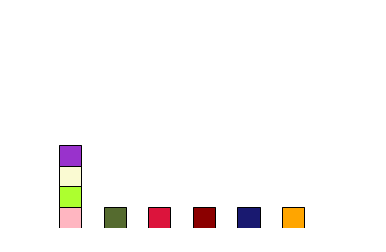

(forall (?y) (or (not (yellow ?y)) (exists (?x) (and (green ?x) (on ?x ?y)))))
T: no, put green blocks on yellow blocks


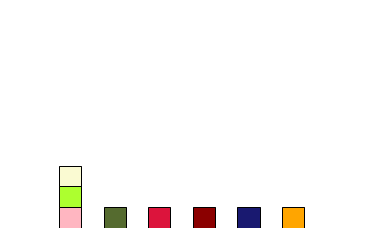

4.422815245521396 [('b1', 'red'), ('b2', 'red'), ('b2', 'blue'), ('b3', 'blue'), ('b5', 'yellow'), ('b7', 'blue')]
4.481985607325531 [('b1', 'red'), ('b2', 'red'), ('b2', 'blue'), ('b3', 'blue'), ('b5', 'yellow'), ('b7', 'blue'), ('b4', 'green')]
4.654285524261561 [('b1', 'red'), ('b2', 'red'), ('b2', 'blue'), ('b3', 'blue'), ('b5', 'yellow')]
4.713455886065696 [('b1', 'red'), ('b2', 'red'), ('b2', 'blue'), ('b3', 'blue'), ('b5', 'yellow'), ('b4', 'green')]
5.053767841476125 [('b1', 'red'), ('b2', 'red'), ('b2', 'blue'), ('b3', 'blue'), ('b5', 'yellow'), ('b7', 'blue'), ('b7', 'red')]
5.11293820328026 [('b1', 'red'), ('b2', 'red'), ('b2', 'blue'), ('b3', 'blue'), ('b5', 'yellow'), ('b7', 'blue'), ('b4', 'green'), ('b7', 'red')]
5.11293820328026 [('b1', 'red'), ('b2', 'red'), ('b2', 'blue'), ('b3', 'blue'), ('b5', 'yellow'), ('b7', 'blue'), ('b7', 'red'), ('b4', 'green')]
8.770047379490839 [('b1', 'red'), ('b2', 'red'), ('b2', 'blue'), ('b3', 'blue'), ('b7', 'blue')]
9.001517658231004 [

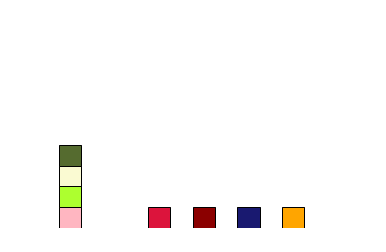

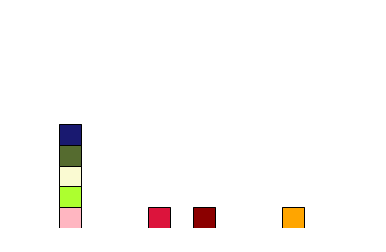

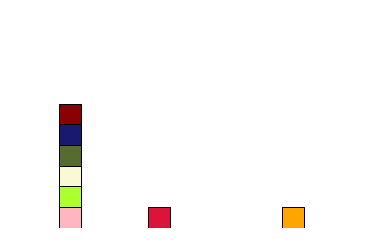

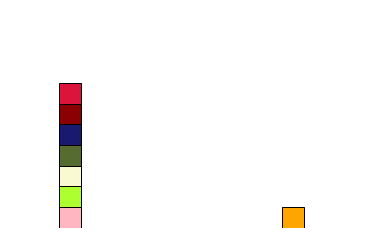

(forall (?x) (or (not (red ?x)) (exists (?y) (and (blue ?y) (on ?x ?y)))))
T: no, put red blocks on blue blocks


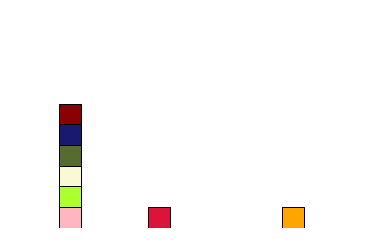

2.8405829193183014 [('b1', 'red'), ('b2', 'red'), ('b2', 'blue'), ('b7', 'blue')]
2.899753281122436 [('b1', 'red'), ('b2', 'red'), ('b2', 'blue'), ('b7', 'blue'), ('b4', 'green')]
3.0720531980584664 [('b1', 'red'), ('b2', 'red'), ('b2', 'blue')]
3.2949358760477407 [('b1', 'red'), ('b2', 'red'), ('b2', 'blue'), ('b7', 'blue'), ('b8', 'blue')]
3.5264061547879058 [('b1', 'red'), ('b2', 'red'), ('b2', 'blue'), ('b8', 'blue')]
3.6359293920847082 [('b1', 'red'), ('b2', 'red'), ('b2', 'blue'), ('b7', 'blue'), ('b7', 'red')]
4.0902823488141475 [('b1', 'red'), ('b2', 'red'), ('b2', 'blue'), ('b7', 'blue'), ('b8', 'blue'), ('b7', 'red')]
4.0902823488141475 [('b1', 'red'), ('b2', 'red'), ('b2', 'blue'), ('b7', 'blue'), ('b7', 'red'), ('b8', 'blue')]
5.419420760988636 [('b2', 'red'), ('b2', 'blue'), ('b7', 'blue')]
5.650891039728801 [('b2', 'red'), ('b2', 'blue')]
6.214767233755042 [('b2', 'red'), ('b2', 'blue'), ('b7', 'blue'), ('b7', 'red')]
15.631083414568312 [('b1', 'red'), ('b2', 'red'), ('b2

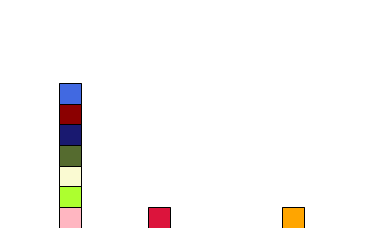

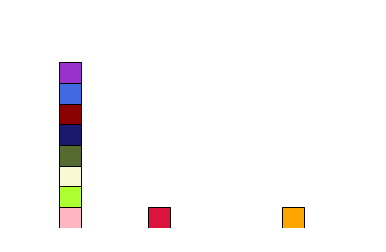

T: No, now you cannot put b1 in the tower because you must put red blocks on blue blocks


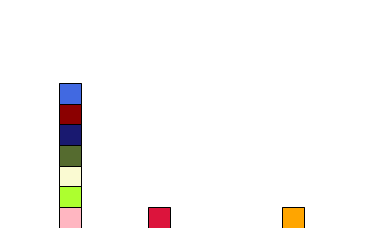

2.626572803590969 [('b1', 'red'), ('b7', 'blue')]


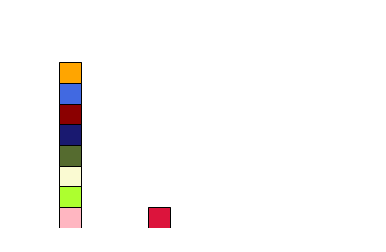

T: No, now you cannot put b1 in the tower because you must put red blocks on blue blocks


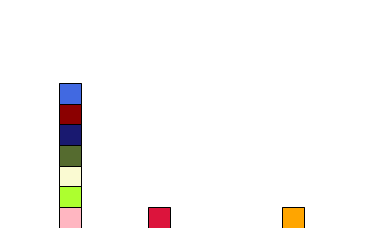

2.626572803590969 [('b1', 'red'), ('b7', 'blue')]
2.6857431653951034 [('b1', 'red'), ('b7', 'blue'), ('b4', 'green')]
2.858043082331134 [('b1', 'red')]
3.080925760320408 [('b1', 'red'), ('b7', 'blue'), ('b8', 'blue')]
3.312396039060573 [('b1', 'red'), ('b8', 'blue')]


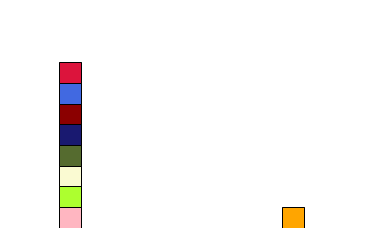

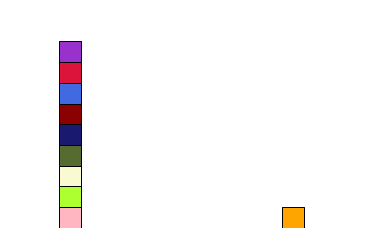

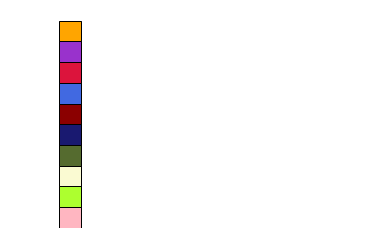

Parsing domain blocks-domain.pddl
Parsing problem tworules/problem19.pddl
4.159155904920603 [('b0', 'blue'), ('b2', 'red'), ('b2', 'blue'), ('b3', 'blue'), ('b4', 'blue'), ('b5', 'yellow'), ('b6', 'red'), ('b6', 'blue'), ('b7', 'green'), ('b9', 'yellow')]
4.372609377141004 [('b0', 'blue'), ('b2', 'red'), ('b2', 'blue'), ('b4', 'blue'), ('b5', 'yellow'), ('b6', 'red'), ('b6', 'blue'), ('b7', 'green'), ('b9', 'yellow')]
4.709916650777051 [('b0', 'blue'), ('b2', 'red'), ('b2', 'blue'), ('b3', 'blue'), ('b4', 'blue'), ('b5', 'yellow'), ('b6', 'red'), ('b6', 'blue'), ('b7', 'green'), ('b9', 'yellow'), ('b1', 'red')]
4.9233701229974525 [('b0', 'blue'), ('b2', 'red'), ('b2', 'blue'), ('b4', 'blue'), ('b5', 'yellow'), ('b6', 'red'), ('b6', 'blue'), ('b7', 'green'), ('b9', 'yellow'), ('b1', 'red')]
4.964517738284429 [('b0', 'blue'), ('b2', 'red'), ('b2', 'blue'), ('b5', 'yellow'), ('b6', 'red'), ('b6', 'blue'), ('b7', 'green'), ('b9', 'yellow')]
5.260677396633499 [('b0', 'blue'), ('b2', 'red'),

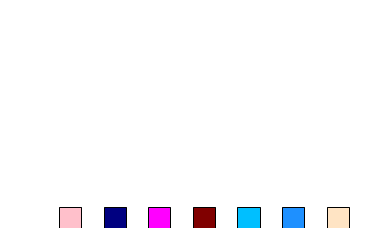

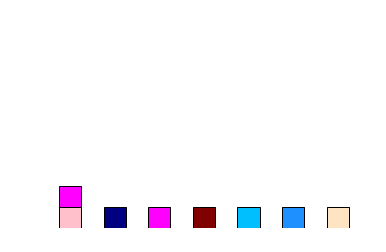

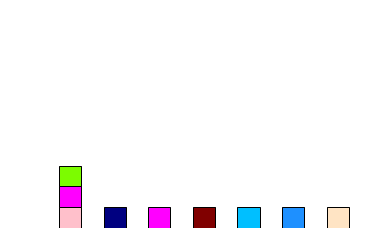

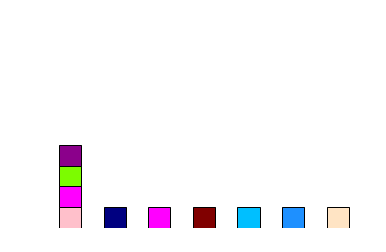

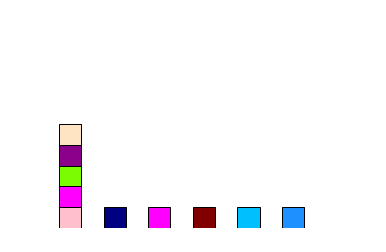

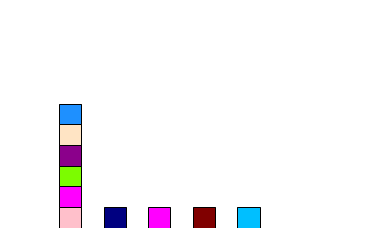

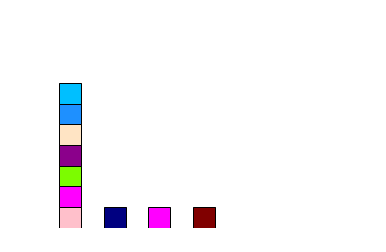

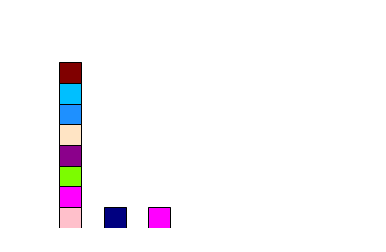

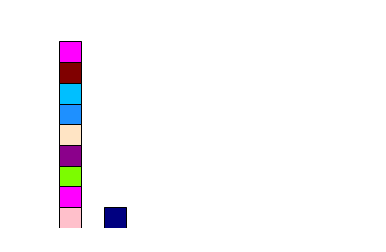

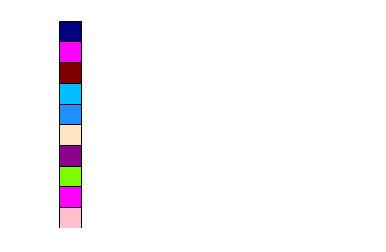

Parsing domain blocks-domain.pddl
Parsing problem tworules/problem2.pddl
5.154215948008783 [('b0', 'green'), ('b1', 'yellow'), ('b2', 'blue'), ('b3', 'yellow'), ('b4', 'green'), ('b4', 'blue'), ('b6', 'red'), ('b6', 'blue'), ('b7', 'blue')]
5.250160788453493 [('b0', 'green'), ('b1', 'yellow'), ('b2', 'blue'), ('b3', 'yellow'), ('b4', 'green'), ('b6', 'red'), ('b6', 'blue'), ('b7', 'blue')]
5.455148011538402 [('b0', 'green'), ('b1', 'yellow'), ('b2', 'blue'), ('b3', 'yellow'), ('b4', 'green'), ('b4', 'blue'), ('b6', 'red'), ('b6', 'blue'), ('b7', 'blue'), ('b7', 'red')]
5.551092851983111 [('b0', 'green'), ('b1', 'yellow'), ('b2', 'blue'), ('b3', 'yellow'), ('b4', 'green'), ('b6', 'red'), ('b6', 'blue'), ('b7', 'blue'), ('b7', 'red')]
6.4820188337707965 [('b0', 'green'), ('b1', 'yellow'), ('b2', 'blue'), ('b3', 'yellow'), ('b4', 'green'), ('b6', 'red'), ('b6', 'blue')]
6.782950897300415 [('b0', 'green'), ('b1', 'yellow'), ('b2', 'blue'), ('b3', 'yellow'), ('b4', 'green'), ('b6', 'red'), 

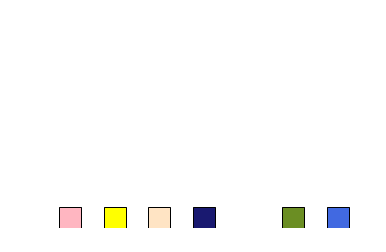

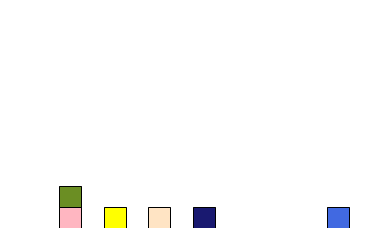

T: No, now you cannot put b0 in the tower because you must put green blocks on yellow blocks


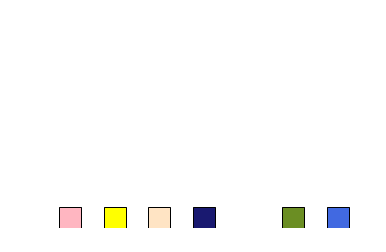

5.312790823337185 [('b0', 'green'), ('b0', 'yellow'), ('b1', 'yellow'), ('b2', 'blue'), ('b3', 'yellow'), ('b4', 'green'), ('b4', 'blue'), ('b6', 'red'), ('b6', 'blue'), ('b7', 'blue'), ('b8', 'green')]
5.408735663781894 [('b0', 'green'), ('b0', 'yellow'), ('b1', 'yellow'), ('b2', 'blue'), ('b3', 'yellow'), ('b4', 'green'), ('b6', 'red'), ('b6', 'blue'), ('b7', 'blue'), ('b8', 'green')]
5.613722886866803 [('b0', 'green'), ('b0', 'yellow'), ('b1', 'yellow'), ('b2', 'blue'), ('b3', 'yellow'), ('b4', 'green'), ('b4', 'blue'), ('b6', 'red'), ('b6', 'blue'), ('b7', 'blue'), ('b8', 'green'), ('b7', 'red')]
5.709667727311513 [('b0', 'green'), ('b0', 'yellow'), ('b1', 'yellow'), ('b2', 'blue'), ('b3', 'yellow'), ('b4', 'green'), ('b6', 'red'), ('b6', 'blue'), ('b7', 'blue'), ('b8', 'green'), ('b7', 'red')]
6.640593709099198 [('b0', 'green'), ('b0', 'yellow'), ('b1', 'yellow'), ('b2', 'blue'), ('b3', 'yellow'), ('b4', 'green'), ('b6', 'red'), ('b6', 'blue'), ('b8', 'green')]
6.941525772628816 [

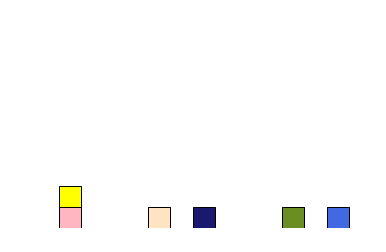

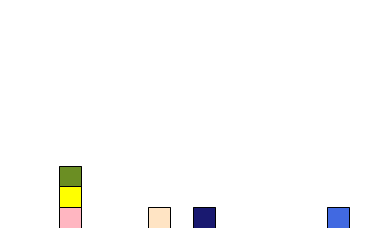

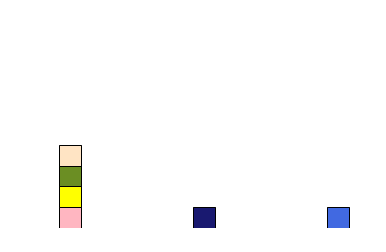

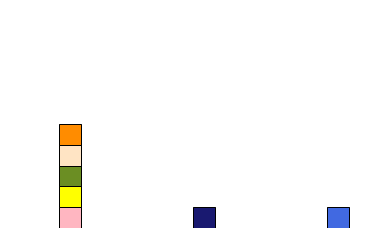

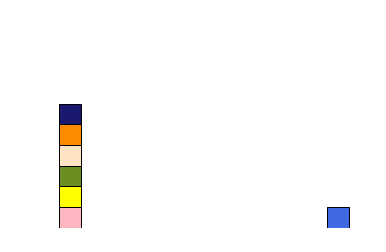

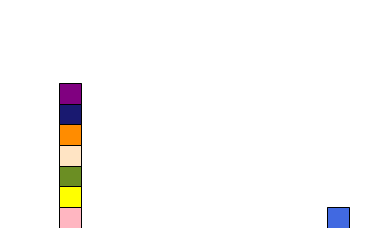

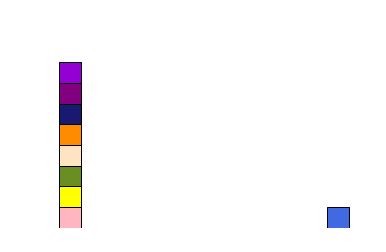

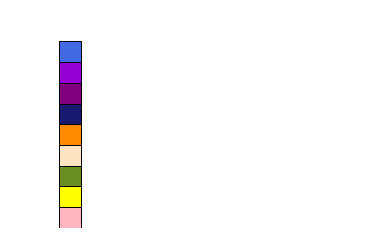

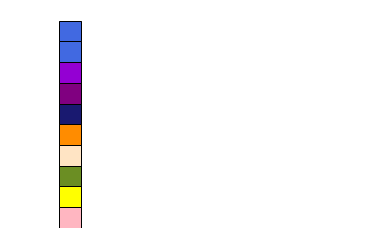

Parsing domain blocks-domain.pddl
Parsing problem tworules/problem20.pddl
7.490981782838986 [('b1', 'red'), ('b1', 'blue'), ('b2', 'green'), ('b2', 'yellow'), ('b3', 'red'), ('b3', 'blue'), ('b5', 'green'), ('b6', 'red'), ('b6', 'blue'), ('b7', 'red'), ('b8', 'green'), ('b8', 'yellow')]
7.849793301975553 [('b1', 'red'), ('b1', 'blue'), ('b2', 'green'), ('b2', 'yellow'), ('b3', 'red'), ('b3', 'blue'), ('b5', 'green'), ('b6', 'red'), ('b6', 'blue'), ('b7', 'red'), ('b8', 'green'), ('b8', 'yellow'), ('b0', 'blue')]
8.34909591973641 [('b1', 'blue'), ('b2', 'green'), ('b2', 'yellow'), ('b3', 'red'), ('b3', 'blue'), ('b5', 'green'), ('b6', 'red'), ('b6', 'blue'), ('b7', 'red'), ('b8', 'green'), ('b8', 'yellow')]
8.626829185395472 [('b1', 'blue'), ('b2', 'green'), ('b3', 'red'), ('b3', 'blue'), ('b5', 'green'), ('b6', 'red'), ('b6', 'blue'), ('b7', 'red'), ('b8', 'green'), ('b8', 'yellow')]


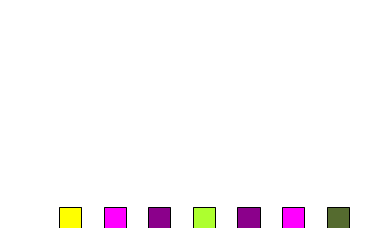

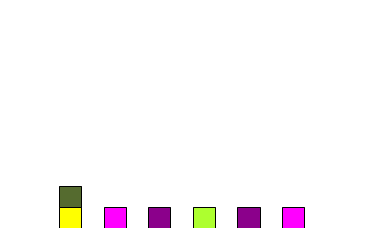

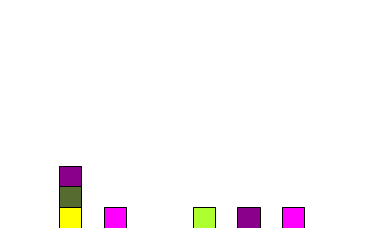

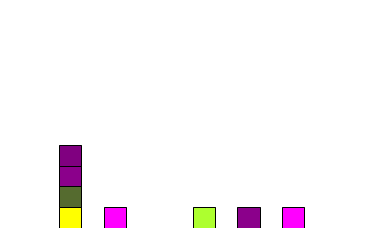

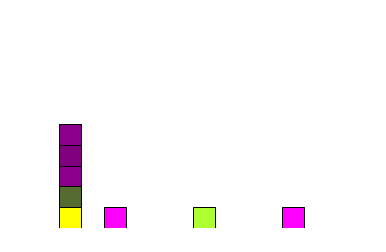

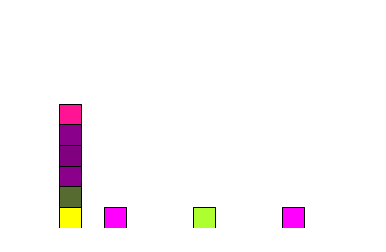

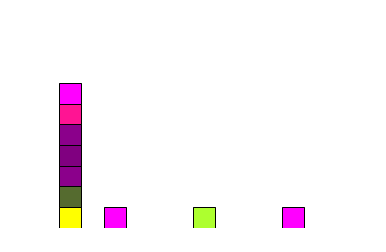

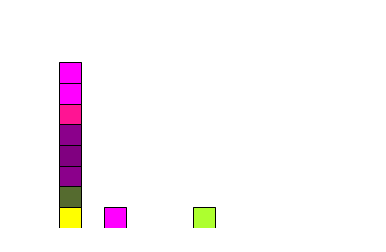

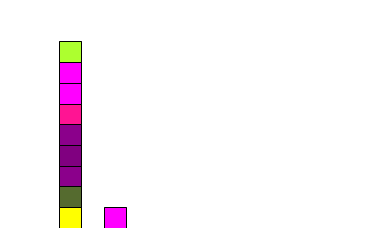

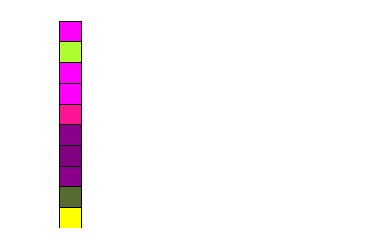

Parsing domain blocks-domain.pddl
Parsing problem tworules/problem21.pddl
5.030058728468303 [('b0', 'yellow'), ('b2', 'yellow'), ('b3', 'green'), ('b4', 'red'), ('b5', 'green'), ('b6', 'blue'), ('b7', 'green'), ('b8', 'red'), ('b8', 'blue'), ('b9', 'blue')]
5.6219670896117275 [('b0', 'yellow'), ('b2', 'yellow'), ('b3', 'green'), ('b4', 'red'), ('b5', 'green'), ('b7', 'green'), ('b8', 'red'), ('b8', 'blue'), ('b9', 'blue')]


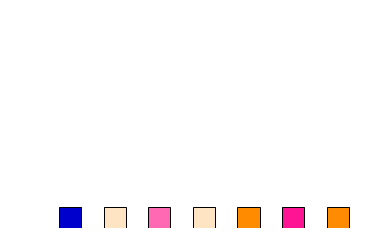

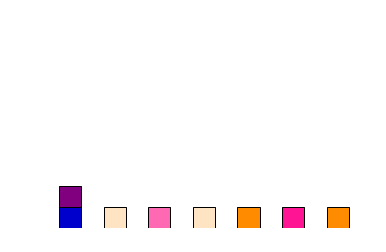

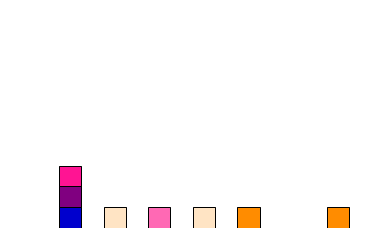

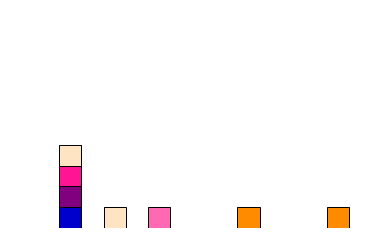

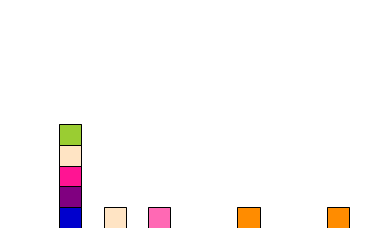

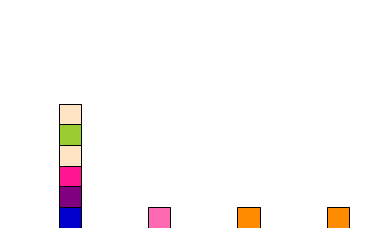

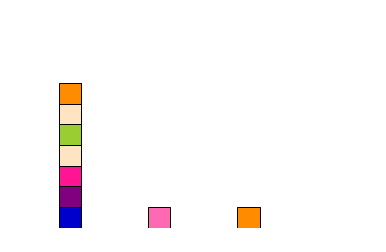

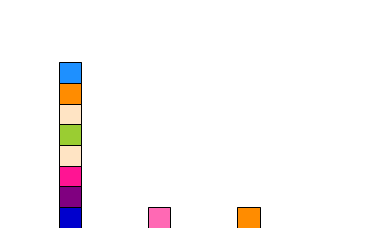

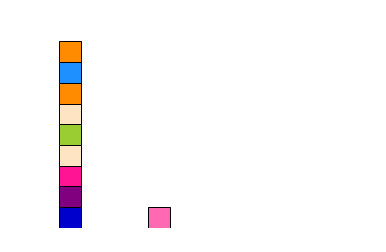

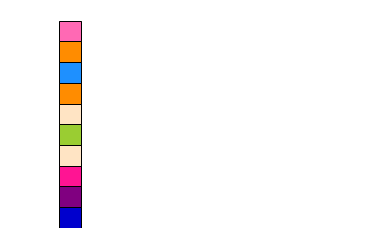

Parsing domain blocks-domain.pddl
Parsing problem tworules/problem22.pddl
6.8087038513029485 [('b0', 'green'), ('b1', 'yellow'), ('b3', 'red'), ('b4', 'blue'), ('b5', 'green'), ('b5', 'yellow'), ('b6', 'green'), ('b6', 'yellow'), ('b7', 'blue'), ('b9', 'green')]
7.0401741300431135 [('b0', 'green'), ('b1', 'yellow'), ('b3', 'red'), ('b5', 'green'), ('b5', 'yellow'), ('b6', 'green'), ('b6', 'yellow'), ('b7', 'blue'), ('b9', 'green')]


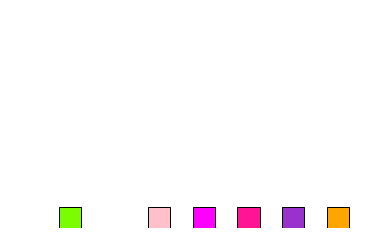

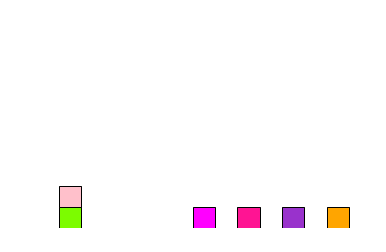

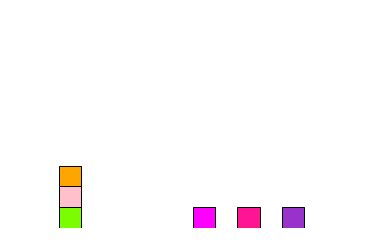

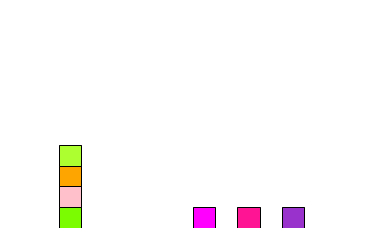

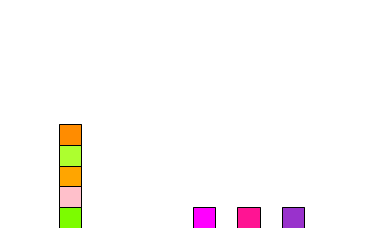

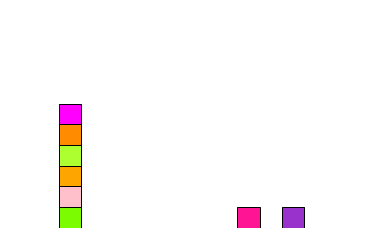

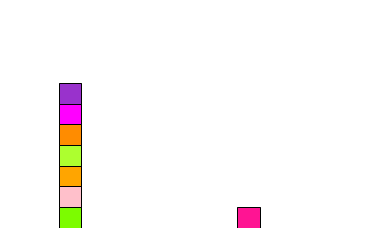

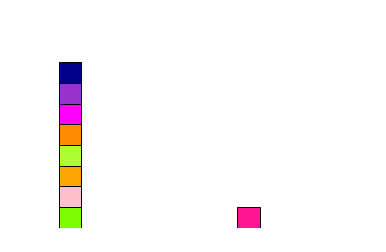

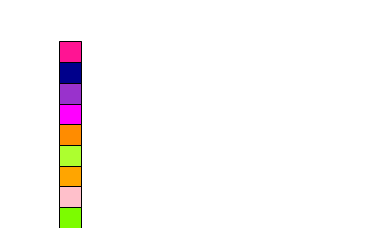

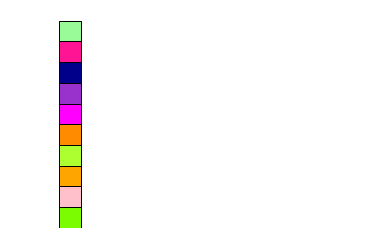

Parsing domain blocks-domain.pddl
Parsing problem tworules/problem23.pddl
3.439933284890922 [('b0', 'yellow'), ('b1', 'blue'), ('b2', 'yellow'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'red'), ('b5', 'blue'), ('b6', 'green'), ('b6', 'yellow'), ('b7', 'blue'), ('b8', 'blue'), ('b9', 'red'), ('b9', 'blue')]
3.671403563631087 [('b0', 'yellow'), ('b2', 'yellow'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'red'), ('b5', 'blue'), ('b6', 'green'), ('b6', 'yellow'), ('b7', 'blue'), ('b8', 'blue'), ('b9', 'red'), ('b9', 'blue')]
4.1116090690252545 [('b0', 'yellow'), ('b1', 'blue'), ('b2', 'yellow'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'red'), ('b5', 'blue'), ('b6', 'green'), ('b7', 'blue'), ('b8', 'blue'), ('b9', 'red'), ('b9', 'blue')]
4.235279757657329 [('b0', 'yellow'), ('b1', 'blue'), ('b2', 'yellow'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'red'), ('b5', 'blue'), ('b6', 'green'), ('b6', 'yellow'), ('b7', 'blue'), ('b8', 'blue'), ('b9', 'red'), ('b9', 'blue'), ('b1', 'red')]
4.343079

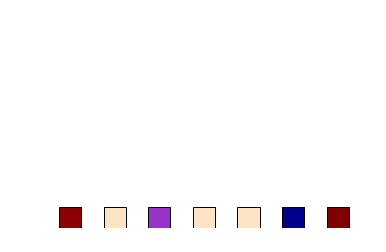

(forall (?x) (or (not (red ?x)) (exists (?y) (and (blue ?y) (on ?x ?y)))))
T: no, put red blocks on blue blocks


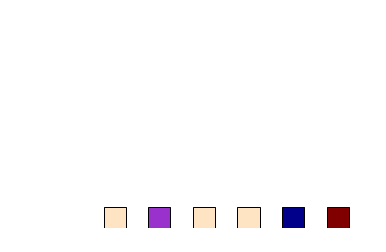

3.406477040417085 [('b0', 'yellow'), ('b1', 'blue'), ('b2', 'yellow'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'red'), ('b5', 'blue'), ('b6', 'green'), ('b6', 'yellow'), ('b7', 'blue'), ('b8', 'blue'), ('b9', 'red'), ('b9', 'blue')]
3.63794731915725 [('b0', 'yellow'), ('b2', 'yellow'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'red'), ('b5', 'blue'), ('b6', 'green'), ('b6', 'yellow'), ('b7', 'blue'), ('b8', 'blue'), ('b9', 'red'), ('b9', 'blue')]
4.078152824551418 [('b0', 'yellow'), ('b1', 'blue'), ('b2', 'yellow'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'red'), ('b5', 'blue'), ('b6', 'green'), ('b7', 'blue'), ('b8', 'blue'), ('b9', 'red'), ('b9', 'blue')]
4.244300906120828 [('b0', 'yellow'), ('b1', 'blue'), ('b2', 'yellow'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'red'), ('b5', 'blue'), ('b6', 'green'), ('b6', 'yellow'), ('b7', 'blue'), ('b8', 'blue'), ('b9', 'red'), ('b9', 'blue'), ('b1', 'red')]
4.309623103291583 [('b0', 'yellow'), ('b2', 'yellow'), ('b3', 'yellow'), ('b4', 'blu

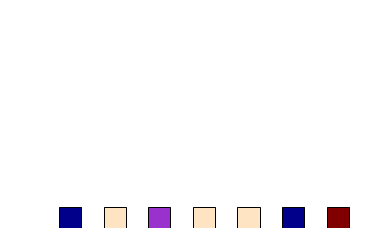

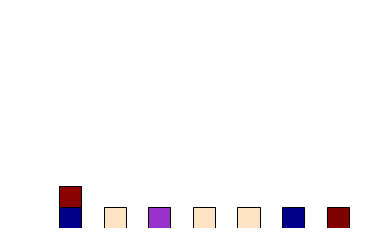

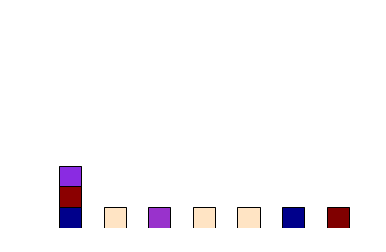

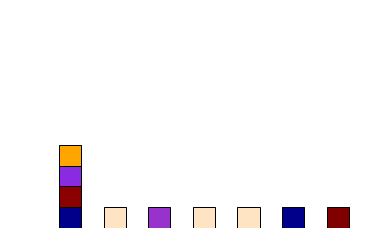

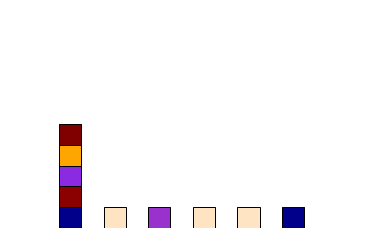

(forall (?x) (or (not (red ?x)) (exists (?y) (and (blue ?y) (on ?x ?y)))))
T: no, put red blocks on blue blocks


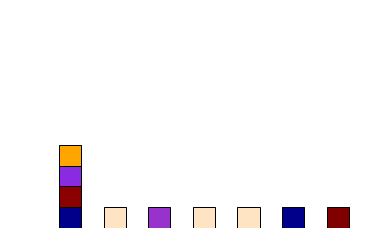

2.462758003240484 [('b0', 'yellow'), ('b1', 'blue'), ('b2', 'yellow'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'red'), ('b5', 'blue'), ('b6', 'green'), ('b6', 'yellow')]
2.6897209390546903 [('b0', 'yellow'), ('b2', 'yellow'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'red'), ('b5', 'blue'), ('b6', 'green'), ('b6', 'yellow')]
3.1344337873748165 [('b0', 'yellow'), ('b1', 'blue'), ('b2', 'yellow'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'red'), ('b5', 'blue'), ('b6', 'green')]
3.361396723189023 [('b0', 'yellow'), ('b2', 'yellow'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'red'), ('b5', 'blue'), ('b6', 'green')]
3.3622310413594954 [('b0', 'yellow'), ('b1', 'blue'), ('b2', 'yellow'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'red'), ('b5', 'blue'), ('b6', 'green'), ('b6', 'yellow'), ('b1', 'red')]
3.589193977173702 [('b0', 'yellow'), ('b2', 'yellow'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'red'), ('b5', 'blue'), ('b6', 'green'), ('b6', 'yellow'), ('b1', 'red')]
4.033906825493828 [('b0',

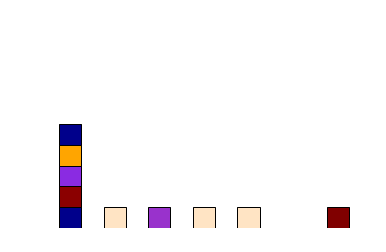

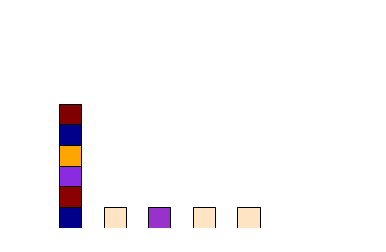

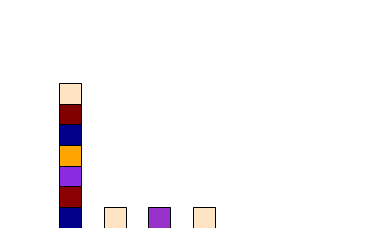

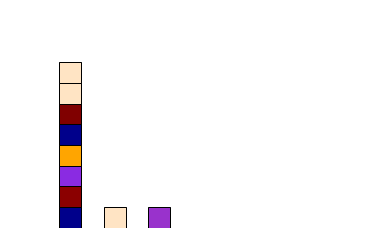

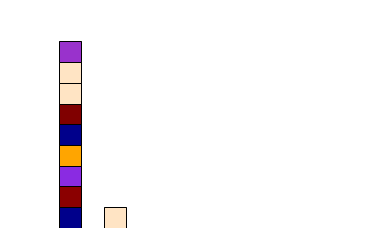

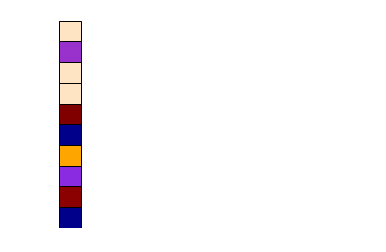

Parsing domain blocks-domain.pddl
Parsing problem tworules/problem24.pddl
5.258624730045693 [('b0', 'blue'), ('b1', 'yellow'), ('b2', 'blue'), ('b4', 'green'), ('b5', 'green'), ('b5', 'yellow'), ('b6', 'yellow'), ('b7', 'yellow'), ('b8', 'yellow'), ('b9', 'green')]
5.4855876658599 [('b1', 'yellow'), ('b2', 'blue'), ('b4', 'green'), ('b5', 'green'), ('b5', 'yellow'), ('b6', 'yellow'), ('b7', 'yellow'), ('b8', 'yellow'), ('b9', 'green')]
5.594288240785689 [('b0', 'blue'), ('b1', 'yellow'), ('b2', 'blue'), ('b4', 'green'), ('b5', 'green'), ('b5', 'yellow'), ('b6', 'yellow'), ('b7', 'yellow'), ('b8', 'yellow'), ('b9', 'green'), ('b2', 'red')]
5.821251176599896 [('b1', 'yellow'), ('b2', 'blue'), ('b4', 'green'), ('b5', 'green'), ('b5', 'yellow'), ('b6', 'yellow'), ('b7', 'yellow'), ('b8', 'yellow'), ('b9', 'green'), ('b2', 'red')]
5.930300514180026 [('b0', 'blue'), ('b1', 'yellow'), ('b2', 'blue'), ('b4', 'green'), ('b5', 'green'), ('b6', 'yellow'), ('b7', 'yellow'), ('b8', 'yellow'), ('b9'

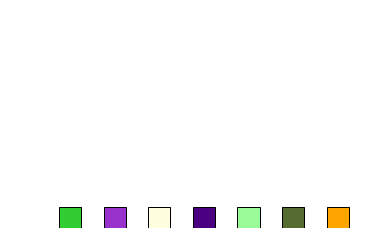

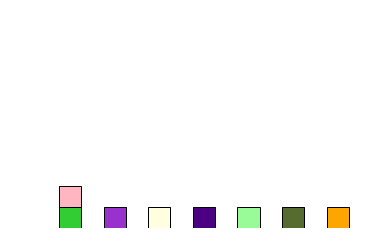

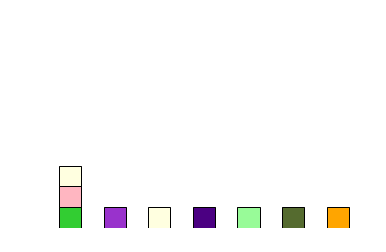

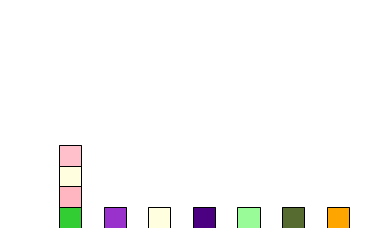

(forall (?y) (or (not (yellow ?y)) (exists (?x) (and (green ?x) (on ?x ?y)))))
T: no, put green blocks on yellow blocks


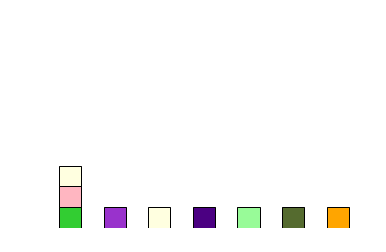

4.624398956639402 [('b0', 'blue'), ('b1', 'yellow'), ('b2', 'blue'), ('b4', 'green'), ('b5', 'green'), ('b5', 'yellow'), ('b6', 'yellow'), ('b7', 'yellow')]
4.851361892453609 [('b1', 'yellow'), ('b2', 'blue'), ('b4', 'green'), ('b5', 'green'), ('b5', 'yellow'), ('b6', 'yellow'), ('b7', 'yellow')]
4.960062467379397 [('b0', 'blue'), ('b1', 'yellow'), ('b2', 'blue'), ('b4', 'green'), ('b5', 'green'), ('b5', 'yellow'), ('b6', 'yellow'), ('b7', 'yellow'), ('b2', 'red')]
5.095753758042068 [('b0', 'blue'), ('b1', 'yellow'), ('b2', 'blue'), ('b4', 'green'), ('b5', 'green'), ('b6', 'yellow'), ('b7', 'yellow')]
5.187025403193604 [('b1', 'yellow'), ('b2', 'blue'), ('b4', 'green'), ('b5', 'green'), ('b5', 'yellow'), ('b6', 'yellow'), ('b7', 'yellow'), ('b2', 'red')]
5.322716693856275 [('b1', 'yellow'), ('b2', 'blue'), ('b4', 'green'), ('b5', 'green'), ('b6', 'yellow'), ('b7', 'yellow')]
5.431417268782064 [('b0', 'blue'), ('b1', 'yellow'), ('b2', 'blue'), ('b4', 'green'), ('b5', 'green'), ('b6', 'y

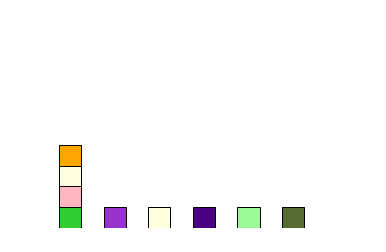

(forall (?y) (or (not (yellow ?y)) (exists (?x) (and (green ?x) (on ?x ?y)))))
T: no, put green blocks on yellow blocks


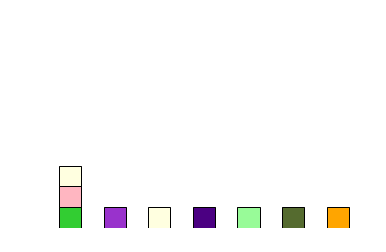

4.6243989566161625 [('b0', 'blue'), ('b1', 'yellow'), ('b2', 'blue'), ('b4', 'green'), ('b5', 'green'), ('b5', 'yellow'), ('b6', 'yellow'), ('b7', 'yellow')]
4.851361892430369 [('b1', 'yellow'), ('b2', 'blue'), ('b4', 'green'), ('b5', 'green'), ('b5', 'yellow'), ('b6', 'yellow'), ('b7', 'yellow')]
4.960062467356158 [('b0', 'blue'), ('b1', 'yellow'), ('b2', 'blue'), ('b4', 'green'), ('b5', 'green'), ('b5', 'yellow'), ('b6', 'yellow'), ('b7', 'yellow'), ('b2', 'red')]
5.095753758018829 [('b0', 'blue'), ('b1', 'yellow'), ('b2', 'blue'), ('b4', 'green'), ('b5', 'green'), ('b6', 'yellow'), ('b7', 'yellow')]
5.187025403170365 [('b1', 'yellow'), ('b2', 'blue'), ('b4', 'green'), ('b5', 'green'), ('b5', 'yellow'), ('b6', 'yellow'), ('b7', 'yellow'), ('b2', 'red')]
5.322716693833036 [('b1', 'yellow'), ('b2', 'blue'), ('b4', 'green'), ('b5', 'green'), ('b6', 'yellow'), ('b7', 'yellow')]
5.431417268758825 [('b0', 'blue'), ('b1', 'yellow'), ('b2', 'blue'), ('b4', 'green'), ('b5', 'green'), ('b6', '

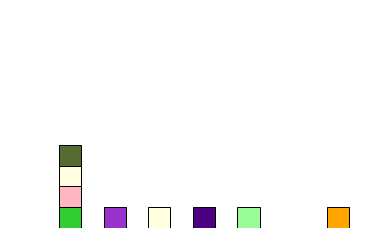

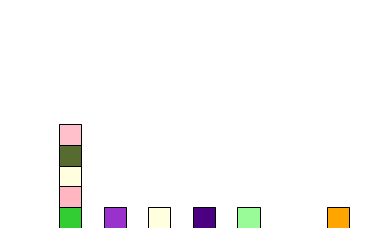

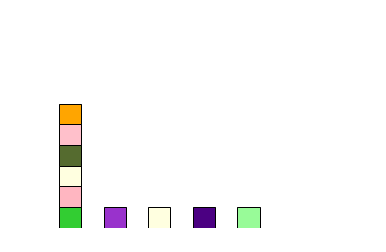

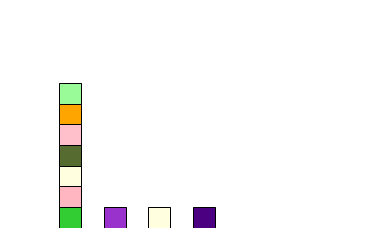

T: No, now you cannot put b1 in the tower because you must put green blocks on yellow blocks


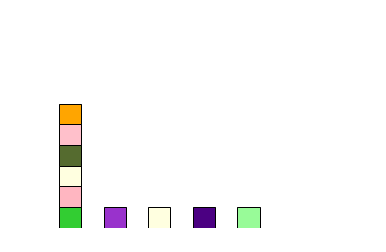

4.383093908717066 [('b0', 'blue'), ('b1', 'green'), ('b1', 'yellow'), ('b2', 'blue'), ('b3', 'green'), ('b5', 'green'), ('b5', 'yellow')]
4.610056844531273 [('b1', 'green'), ('b1', 'yellow'), ('b2', 'blue'), ('b3', 'green'), ('b5', 'green'), ('b5', 'yellow')]
4.718757419457061 [('b0', 'blue'), ('b1', 'green'), ('b1', 'yellow'), ('b2', 'blue'), ('b3', 'green'), ('b5', 'green'), ('b5', 'yellow'), ('b2', 'red')]
4.945720355271268 [('b1', 'green'), ('b1', 'yellow'), ('b2', 'blue'), ('b3', 'green'), ('b5', 'green'), ('b5', 'yellow'), ('b2', 'red')]
5.618230457576073 [('b0', 'blue'), ('b1', 'green'), ('b1', 'yellow'), ('b2', 'blue'), ('b3', 'green'), ('b5', 'green'), ('b5', 'yellow'), ('b2', 'red'), ('b0', 'red')]
6.246844932899453 [('b1', 'green'), ('b1', 'yellow'), ('b3', 'green'), ('b5', 'green'), ('b5', 'yellow')]


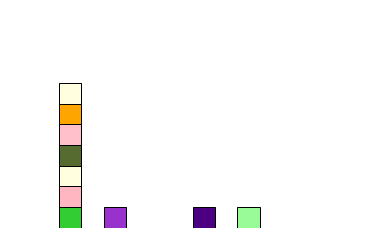

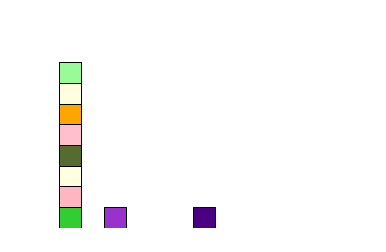

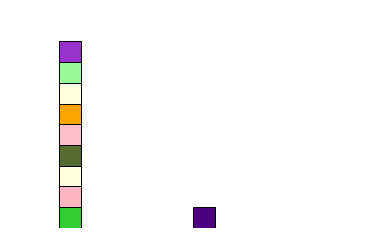

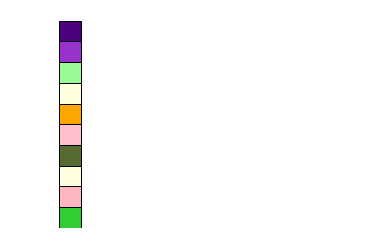

Parsing domain blocks-domain.pddl
Parsing problem tworules/problem25.pddl
6.728859876175228 [('b0', 'red'), ('b2', 'blue'), ('b3', 'blue'), ('b4', 'red'), ('b4', 'blue'), ('b5', 'yellow'), ('b6', 'blue'), ('b7', 'green'), ('b8', 'red'), ('b9', 'green'), ('b9', 'yellow')]
6.945880648601948 [('b0', 'red'), ('b3', 'blue'), ('b4', 'red'), ('b4', 'blue'), ('b5', 'yellow'), ('b6', 'blue'), ('b7', 'green'), ('b8', 'red'), ('b9', 'green'), ('b9', 'yellow')]


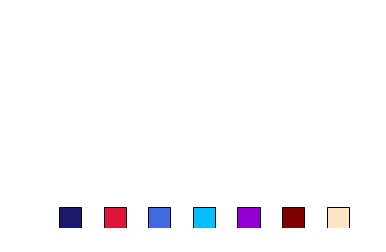

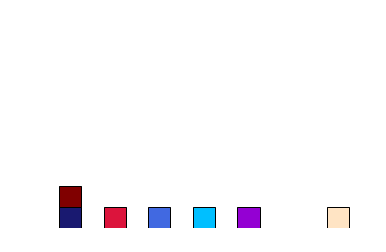

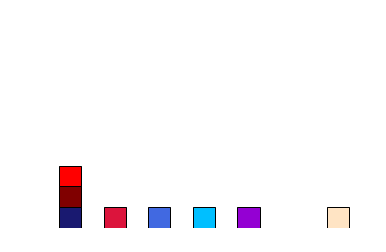

(forall (?x) (or (not (red ?x)) (exists (?y) (and (blue ?y) (on ?x ?y)))))
T: no, put red blocks on blue blocks


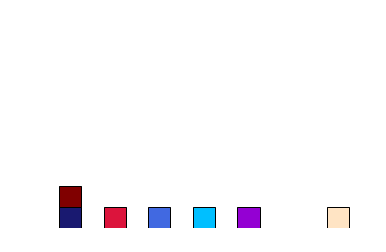

6.510682643436527 [('b0', 'red'), ('b2', 'blue'), ('b3', 'blue'), ('b4', 'red'), ('b4', 'blue'), ('b5', 'yellow'), ('b7', 'green'), ('b8', 'red'), ('b8', 'blue'), ('b9', 'green'), ('b9', 'yellow')]
6.515796307196341 [('b0', 'red'), ('b2', 'blue'), ('b3', 'blue'), ('b4', 'red'), ('b4', 'blue'), ('b5', 'yellow'), ('b7', 'green'), ('b8', 'red'), ('b9', 'green'), ('b9', 'yellow')]
6.972550543662399 [('b0', 'red'), ('b2', 'blue'), ('b3', 'blue'), ('b4', 'red'), ('b4', 'blue'), ('b5', 'yellow'), ('b7', 'green'), ('b8', 'red'), ('b8', 'blue'), ('b9', 'green'), ('b9', 'yellow'), ('b3', 'red')]
6.977664207422213 [('b0', 'red'), ('b2', 'blue'), ('b3', 'blue'), ('b4', 'red'), ('b4', 'blue'), ('b5', 'yellow'), ('b7', 'green'), ('b8', 'red'), ('b9', 'green'), ('b9', 'yellow'), ('b3', 'red')]
7.096121258287608 [('b0', 'red'), ('b2', 'blue'), ('b3', 'blue'), ('b4', 'red'), ('b4', 'blue'), ('b5', 'yellow'), ('b7', 'green'), ('b8', 'red'), ('b8', 'blue'), ('b9', 'yellow'), ('b3', 'red')]
7.129206735862

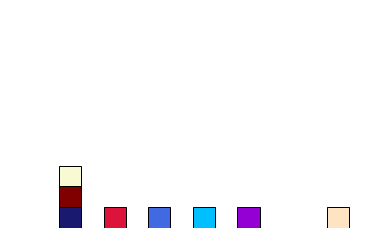

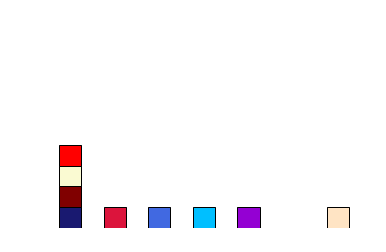

(forall (?x) (or (not (red ?x)) (exists (?y) (and (blue ?y) (on ?x ?y)))))
T: no, put red blocks on blue blocks


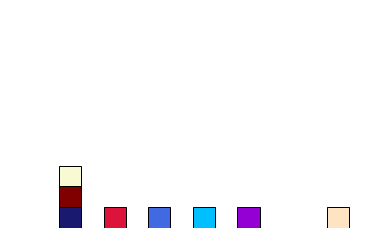

6.352319532707062 [('b0', 'red'), ('b2', 'blue'), ('b3', 'blue'), ('b5', 'yellow'), ('b7', 'green'), ('b8', 'red'), ('b8', 'blue'), ('b9', 'green'), ('b9', 'yellow')]
6.35767355019805 [('b0', 'red'), ('b2', 'blue'), ('b3', 'blue'), ('b5', 'yellow'), ('b7', 'green'), ('b8', 'red'), ('b9', 'green'), ('b9', 'yellow')]
6.8141874329329335 [('b0', 'red'), ('b2', 'blue'), ('b3', 'blue'), ('b5', 'yellow'), ('b7', 'green'), ('b8', 'red'), ('b8', 'blue'), ('b9', 'green'), ('b9', 'yellow'), ('b3', 'red')]
6.819541450423921 [('b0', 'red'), ('b2', 'blue'), ('b3', 'blue'), ('b5', 'yellow'), ('b7', 'green'), ('b8', 'red'), ('b9', 'green'), ('b9', 'yellow'), ('b3', 'red')]
6.937758147558143 [('b0', 'red'), ('b2', 'blue'), ('b3', 'blue'), ('b5', 'yellow'), ('b7', 'green'), ('b8', 'red'), ('b8', 'blue'), ('b9', 'yellow'), ('b3', 'red')]
6.97084362513295 [('b0', 'red'), ('b2', 'blue'), ('b3', 'blue'), ('b5', 'yellow'), ('b7', 'green'), ('b8', 'red'), ('b8', 'blue'), ('b9', 'green'), ('b9', 'yellow'), ('b

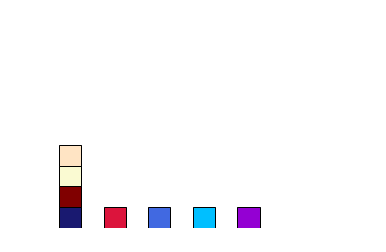

(forall (?y) (or (not (yellow ?y)) (exists (?x) (and (green ?x) (on ?x ?y)))))
T: no, put green blocks on yellow blocks


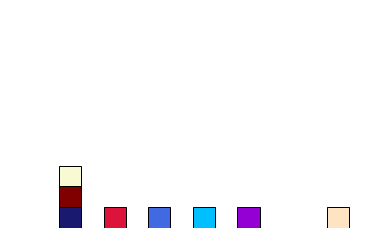

6.35354343455984 [('b0', 'red'), ('b2', 'blue'), ('b3', 'blue'), ('b5', 'yellow'), ('b7', 'green'), ('b8', 'red'), ('b8', 'blue'), ('b9', 'green'), ('b9', 'yellow')]
6.358897452050828 [('b0', 'red'), ('b2', 'blue'), ('b3', 'blue'), ('b5', 'yellow'), ('b7', 'green'), ('b8', 'red'), ('b9', 'green'), ('b9', 'yellow')]
6.815411334785711 [('b0', 'red'), ('b2', 'blue'), ('b3', 'blue'), ('b5', 'yellow'), ('b7', 'green'), ('b8', 'red'), ('b8', 'blue'), ('b9', 'green'), ('b9', 'yellow'), ('b3', 'red')]
6.820765352276699 [('b0', 'red'), ('b2', 'blue'), ('b3', 'blue'), ('b5', 'yellow'), ('b7', 'green'), ('b8', 'red'), ('b9', 'green'), ('b9', 'yellow'), ('b3', 'red')]
6.943322806626432 [('b0', 'red'), ('b2', 'blue'), ('b3', 'blue'), ('b5', 'yellow'), ('b7', 'green'), ('b8', 'red'), ('b8', 'blue'), ('b9', 'yellow'), ('b3', 'red')]
6.967188004706571 [('b0', 'red'), ('b2', 'blue'), ('b3', 'blue'), ('b5', 'yellow'), ('b7', 'green'), ('b8', 'red'), ('b8', 'blue'), ('b9', 'green'), ('b9', 'yellow'), ('b

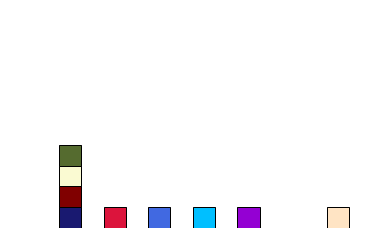

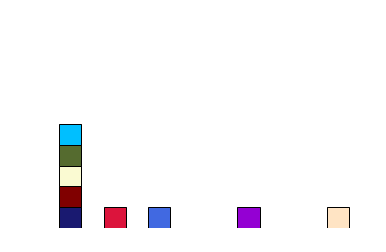

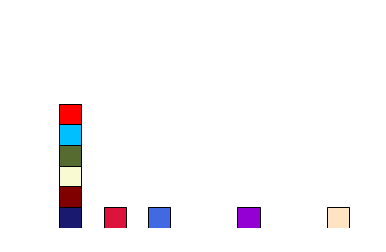

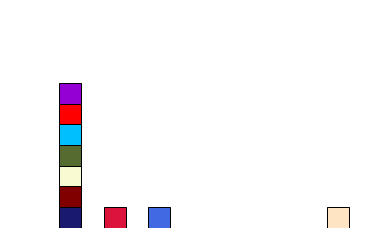

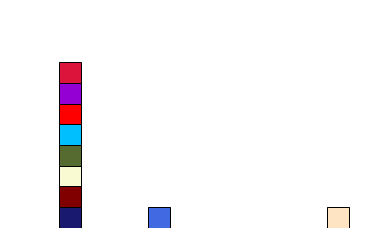

(forall (?x) (or (not (red ?x)) (exists (?y) (and (blue ?y) (on ?x ?y)))))
T: no, put red blocks on blue blocks


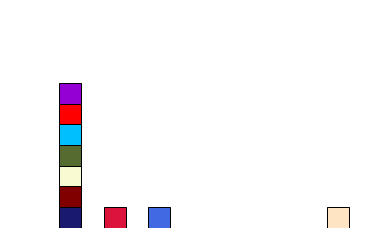

2.356897251003426 [('b0', 'red'), ('b3', 'blue'), ('b5', 'yellow')]
2.508673920924286 [('b0', 'red'), ('b3', 'blue'), ('b5', 'yellow'), ('b5', 'green')]
6.1796287439405235 [('b0', 'red'), ('b3', 'blue')]
6.331405413861384 [('b0', 'red'), ('b3', 'blue'), ('b5', 'green')]
6.741603681035036 [('b0', 'red'), ('b3', 'blue'), ('b3', 'red')]
6.742197359878975 [('b0', 'red'), ('b3', 'blue'), ('b1', 'blue')]
7.304172296973487 [('b0', 'red'), ('b3', 'blue'), ('b3', 'red'), ('b1', 'blue')]
7.304172296973487 [('b0', 'red'), ('b3', 'blue'), ('b1', 'blue'), ('b3', 'red')]
7.648223083695185 [('b0', 'red')]
8.210791699633635 [('b0', 'red'), ('b1', 'blue')]


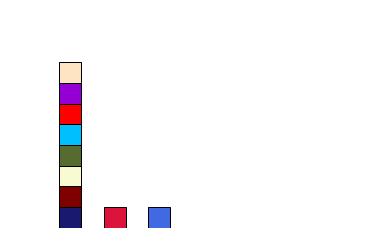

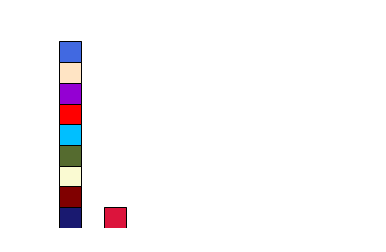

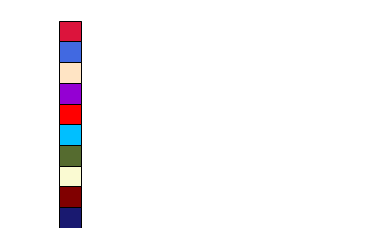

Parsing domain blocks-domain.pddl
Parsing problem tworules/problem26.pddl
5.96152247183338 [('b1', 'yellow'), ('b3', 'green'), ('b4', 'yellow'), ('b6', 'green'), ('b6', 'yellow'), ('b7', 'yellow'), ('b8', 'red'), ('b8', 'blue'), ('b9', 'blue')]
6.11329914175424 [('b1', 'yellow'), ('b3', 'green'), ('b4', 'yellow'), ('b6', 'green'), ('b6', 'yellow'), ('b7', 'yellow'), ('b8', 'red'), ('b8', 'blue'), ('b9', 'blue'), ('b4', 'green')]
6.2650758116751 [('b1', 'yellow'), ('b3', 'green'), ('b4', 'yellow'), ('b6', 'green'), ('b6', 'yellow'), ('b7', 'yellow'), ('b8', 'red'), ('b8', 'blue'), ('b9', 'blue'), ('b4', 'green'), ('b7', 'green')]
6.376404681495231 [('b1', 'yellow'), ('b3', 'green'), ('b4', 'yellow'), ('b6', 'green'), ('b7', 'yellow'), ('b8', 'red'), ('b8', 'blue'), ('b9', 'blue')]
6.528181351416091 [('b1', 'yellow'), ('b3', 'green'), ('b4', 'yellow'), ('b6', 'green'), ('b7', 'yellow'), ('b8', 'red'), ('b8', 'blue'), ('b9', 'blue'), ('b4', 'green')]
6.763557241411244 [('b1', 'yellow'), (

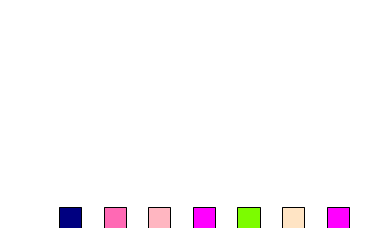

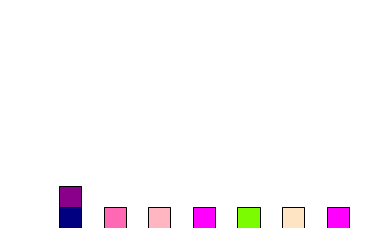

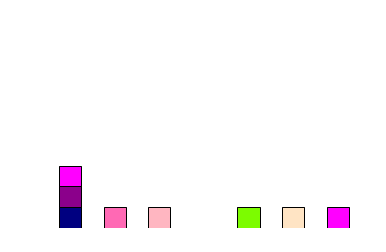

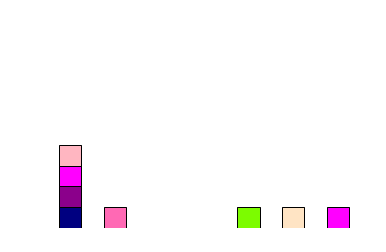

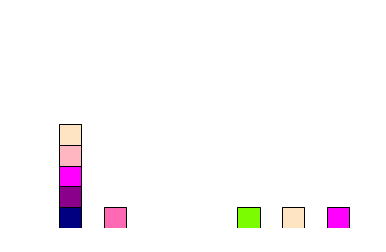

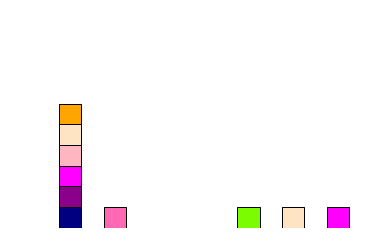

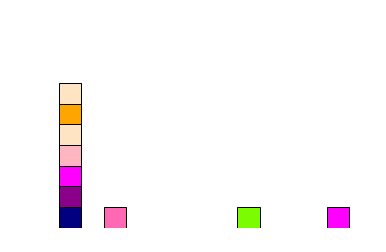

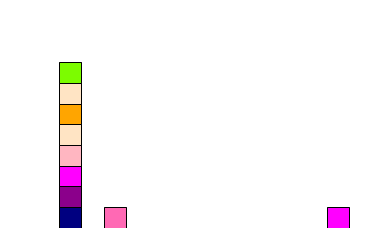

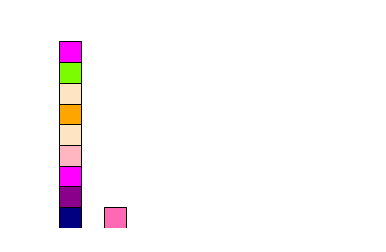

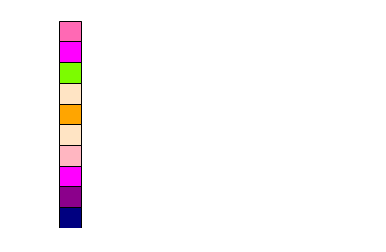

Parsing domain blocks-domain.pddl
Parsing problem tworules/problem27.pddl
7.582827053300788 [('b0', 'blue'), ('b1', 'red'), ('b1', 'blue'), ('b2', 'green'), ('b2', 'yellow'), ('b3', 'yellow'), ('b5', 'green'), ('b5', 'yellow'), ('b6', 'green'), ('b6', 'blue'), ('b8', 'red'), ('b8', 'blue'), ('b9', 'blue')]
7.598172609774035 [('b0', 'blue'), ('b1', 'red'), ('b1', 'blue'), ('b2', 'green'), ('b2', 'yellow'), ('b3', 'yellow'), ('b5', 'green'), ('b5', 'yellow'), ('b6', 'green'), ('b6', 'blue'), ('b8', 'red'), ('b8', 'blue')]
7.821469351649106 [('b0', 'blue'), ('b1', 'red'), ('b1', 'blue'), ('b2', 'green'), ('b2', 'yellow'), ('b3', 'yellow'), ('b5', 'green'), ('b5', 'yellow'), ('b6', 'green'), ('b8', 'red'), ('b8', 'blue')]
8.384861822878653 [('b0', 'blue'), ('b1', 'red'), ('b1', 'blue'), ('b2', 'green'), ('b2', 'yellow'), ('b3', 'yellow'), ('b5', 'green'), ('b5', 'yellow'), ('b6', 'green'), ('b6', 'blue'), ('b8', 'red'), ('b8', 'blue'), ('b9', 'blue'), ('b4', 'red')]
8.4002073793519 [('b0',

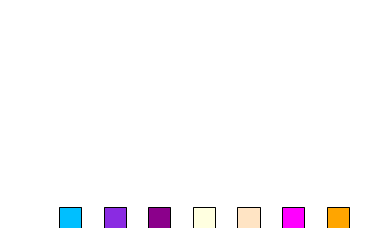

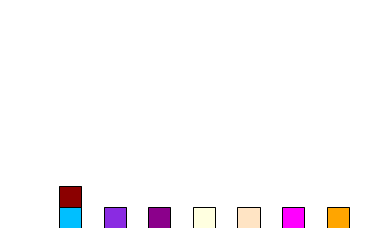

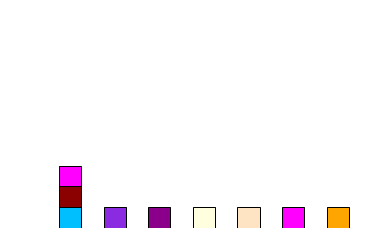

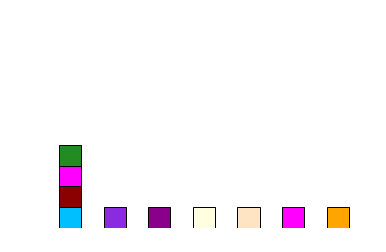

T: No, now you cannot put b2 in the tower because you must put green blocks on yellow blocks


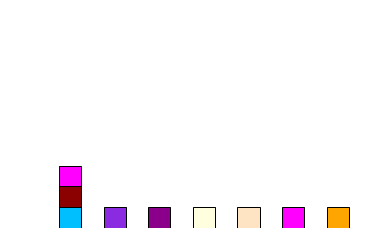

5.788103957058568 [('b0', 'blue'), ('b1', 'red'), ('b1', 'blue'), ('b2', 'yellow'), ('b3', 'yellow'), ('b5', 'green'), ('b5', 'yellow'), ('b6', 'green'), ('b6', 'blue')]
6.011400698933639 [('b0', 'blue'), ('b1', 'red'), ('b1', 'blue'), ('b2', 'yellow'), ('b3', 'yellow'), ('b5', 'green'), ('b5', 'yellow'), ('b6', 'green')]
6.044145846830591 [('b0', 'blue'), ('b1', 'red'), ('b1', 'blue'), ('b2', 'yellow'), ('b3', 'yellow'), ('b5', 'green'), ('b6', 'green'), ('b6', 'blue')]
6.098589785513661 [('b0', 'blue'), ('b1', 'red'), ('b1', 'blue'), ('b2', 'yellow'), ('b3', 'yellow'), ('b5', 'green'), ('b5', 'yellow'), ('b6', 'green'), ('b6', 'blue'), ('b2', 'green')]
6.267442588705662 [('b0', 'blue'), ('b1', 'red'), ('b1', 'blue'), ('b2', 'yellow'), ('b3', 'yellow'), ('b5', 'green'), ('b6', 'green')]
6.321886527388732 [('b0', 'blue'), ('b1', 'red'), ('b1', 'blue'), ('b2', 'yellow'), ('b3', 'yellow'), ('b5', 'green'), ('b5', 'yellow'), ('b6', 'green'), ('b2', 'green')]
6.590138726636432 [('b0', 'blu

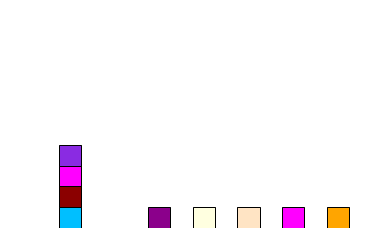

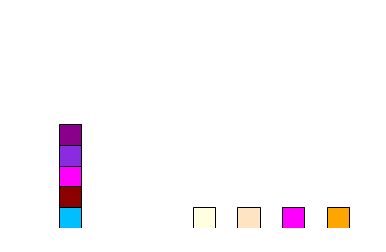

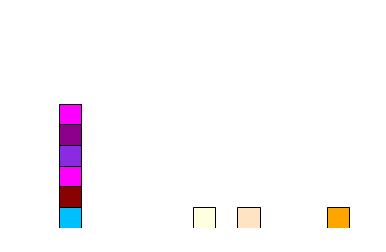

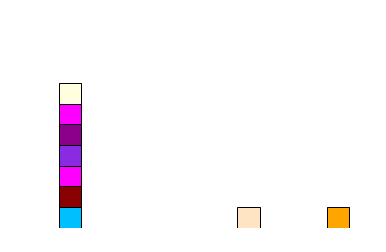

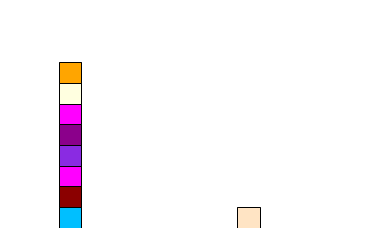

(forall (?y) (or (not (yellow ?y)) (exists (?x) (and (green ?x) (on ?x ?y)))))
T: no, put green blocks on yellow blocks


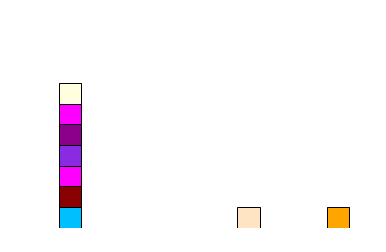

2.8196162895456283 [('b2', 'yellow'), ('b3', 'yellow'), ('b5', 'green'), ('b5', 'yellow'), ('b6', 'green'), ('b6', 'blue')]
3.0429130314206994 [('b2', 'yellow'), ('b3', 'yellow'), ('b5', 'green'), ('b5', 'yellow'), ('b6', 'green')]
3.075658179317651 [('b2', 'yellow'), ('b3', 'yellow'), ('b5', 'green'), ('b6', 'green'), ('b6', 'blue')]
3.1301021144176793 [('b2', 'yellow'), ('b3', 'yellow'), ('b5', 'green'), ('b5', 'yellow'), ('b6', 'green'), ('b6', 'blue'), ('b2', 'green')]
3.2989549211927223 [('b2', 'yellow'), ('b3', 'yellow'), ('b5', 'green'), ('b6', 'green')]


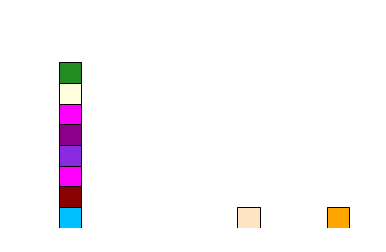

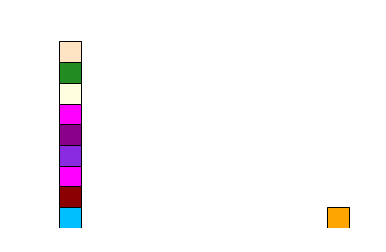

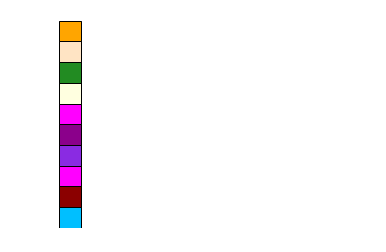

Parsing domain blocks-domain.pddl
Parsing problem tworules/problem28.pddl
5.520398210360915 [('b0', 'green'), ('b2', 'green'), ('b2', 'yellow'), ('b3', 'red'), ('b4', 'blue'), ('b5', 'yellow'), ('b6', 'blue'), ('b7', 'blue'), ('b8', 'green'), ('b9', 'green'), ('b9', 'yellow')]
6.004605236078708 [('b0', 'green'), ('b2', 'green'), ('b2', 'yellow'), ('b3', 'red'), ('b4', 'blue'), ('b5', 'yellow'), ('b7', 'blue'), ('b8', 'green'), ('b9', 'green'), ('b9', 'yellow')]
6.635687570580116 [('b0', 'green'), ('b2', 'green'), ('b2', 'yellow'), ('b3', 'red'), ('b4', 'blue'), ('b5', 'yellow'), ('b6', 'blue'), ('b7', 'blue'), ('b8', 'green'), ('b9', 'green'), ('b9', 'yellow'), ('b6', 'red')]
7.11989459629791 [('b0', 'green'), ('b2', 'green'), ('b2', 'yellow'), ('b3', 'red'), ('b4', 'blue'), ('b5', 'yellow'), ('b7', 'blue'), ('b8', 'green'), ('b9', 'green'), ('b9', 'yellow'), ('b6', 'red')]


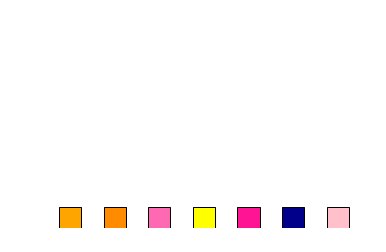

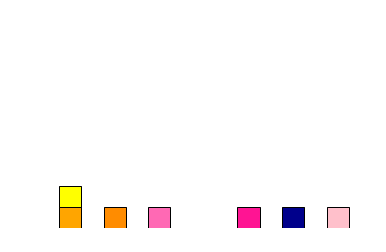

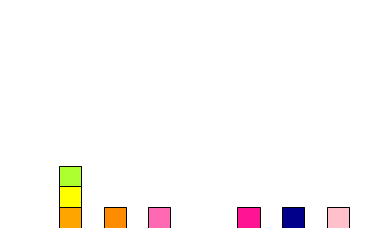

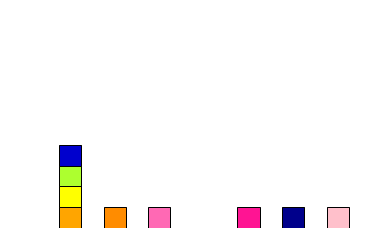

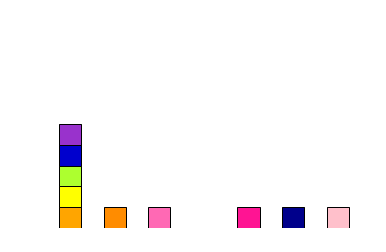

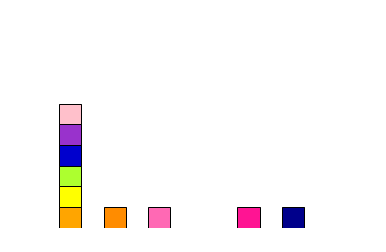

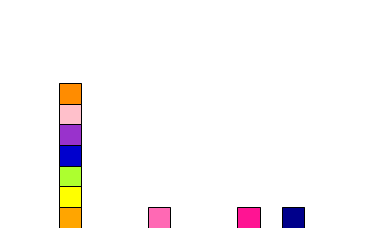

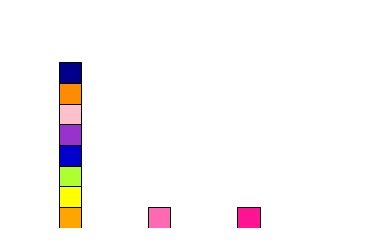

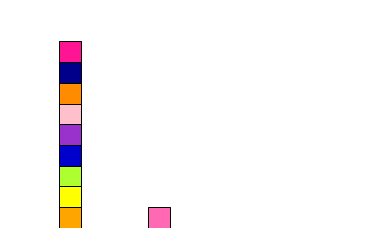

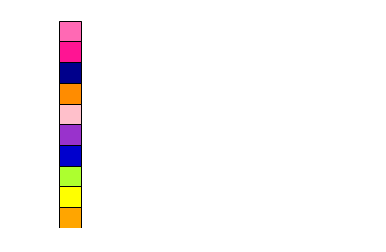

Parsing domain blocks-domain.pddl
Parsing problem tworules/problem29.pddl
5.031680336159799 [('b0', 'blue'), ('b1', 'yellow'), ('b2', 'yellow'), ('b3', 'green'), ('b4', 'yellow'), ('b5', 'blue'), ('b6', 'green'), ('b6', 'blue'), ('b7', 'red'), ('b7', 'blue'), ('b8', 'red'), ('b9', 'green')]
5.8144645228048475 [('b0', 'blue'), ('b1', 'yellow'), ('b2', 'yellow'), ('b3', 'green'), ('b4', 'yellow'), ('b5', 'blue'), ('b6', 'green'), ('b7', 'red'), ('b7', 'blue'), ('b8', 'red'), ('b9', 'green')]
6.35127545565866 [('b0', 'blue'), ('b1', 'yellow'), ('b2', 'yellow'), ('b3', 'green'), ('b4', 'yellow'), ('b5', 'blue'), ('b6', 'green'), ('b6', 'blue'), ('b7', 'red'), ('b7', 'blue'), ('b8', 'red'), ('b9', 'green'), ('b3', 'red')]
7.134059642303709 [('b0', 'blue'), ('b1', 'yellow'), ('b2', 'yellow'), ('b3', 'green'), ('b4', 'yellow'), ('b5', 'blue'), ('b6', 'green'), ('b7', 'red'), ('b7', 'blue'), ('b8', 'red'), ('b9', 'green'), ('b3', 'red')]
7.388099211193495 [('b0', 'blue'), ('b1', 'yellow'), ('b

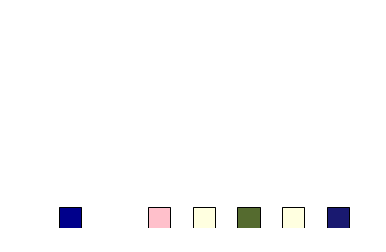

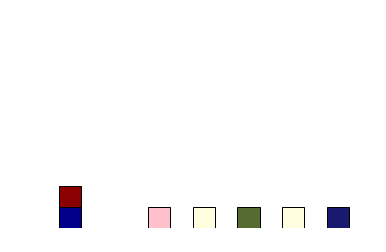

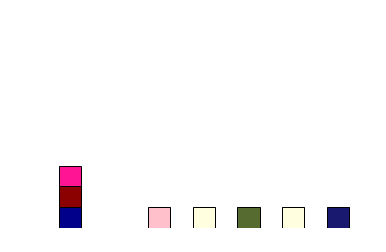

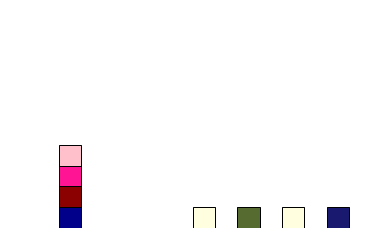

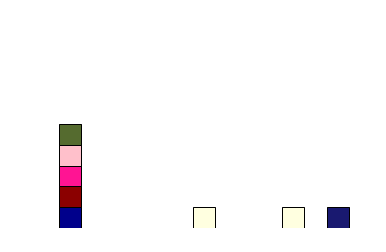

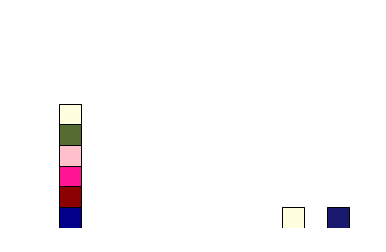

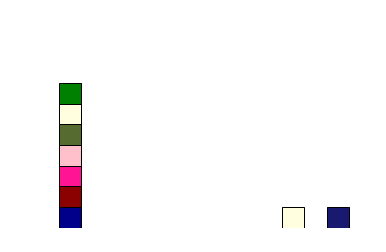

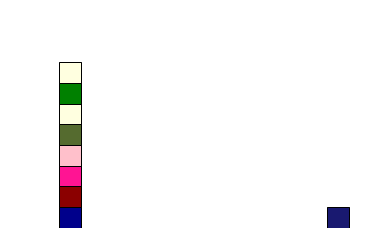

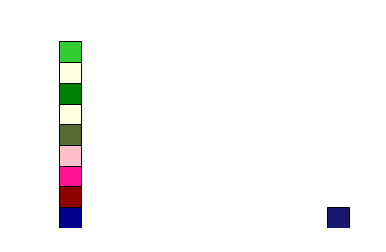

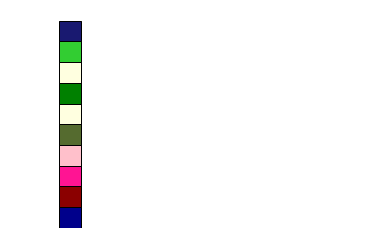

Parsing domain blocks-domain.pddl
Parsing problem tworules/problem3.pddl
4.98454389193126 [('b0', 'blue'), ('b1', 'red'), ('b1', 'blue'), ('b2', 'red'), ('b2', 'blue'), ('b3', 'green'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'green'), ('b5', 'blue'), ('b6', 'blue'), ('b7', 'red'), ('b8', 'green'), ('b9', 'blue')]
5.109094207212897 [('b1', 'red'), ('b1', 'blue'), ('b2', 'red'), ('b2', 'blue'), ('b3', 'green'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'green'), ('b5', 'blue'), ('b6', 'blue'), ('b7', 'red'), ('b8', 'green'), ('b9', 'blue')]
5.546518829025772 [('b0', 'blue'), ('b1', 'red'), ('b1', 'blue'), ('b2', 'red'), ('b2', 'blue'), ('b3', 'green'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'green'), ('b5', 'blue'), ('b6', 'blue'), ('b7', 'red'), ('b8', 'green'), ('b9', 'blue'), ('b6', 'red')]
5.67106914430741 [('b1', 'red'), ('b1', 'blue'), ('b2', 'red'), ('b2', 'blue'), ('b3', 'green'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'green'), ('b5', 'blue'), ('b6', 'blue'), ('b7', 'red'),

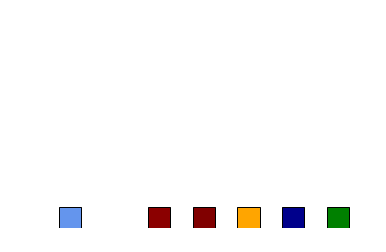

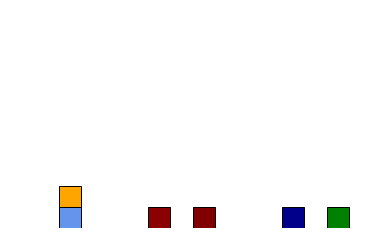

T: No, now you cannot put b1 in the tower because you must put red blocks on blue blocks


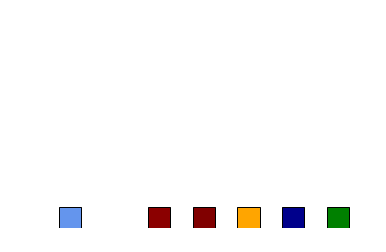

4.630409649299353 [('b0', 'blue'), ('b1', 'red'), ('b1', 'blue'), ('b2', 'red'), ('b2', 'blue'), ('b3', 'green'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'green'), ('b5', 'blue'), ('b6', 'blue'), ('b7', 'red'), ('b8', 'green'), ('b9', 'blue')]
5.204426883084696 [('b0', 'blue'), ('b1', 'red'), ('b1', 'blue'), ('b2', 'red'), ('b2', 'blue'), ('b3', 'green'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'green'), ('b5', 'blue'), ('b6', 'blue'), ('b7', 'red'), ('b8', 'green'), ('b9', 'blue'), ('b6', 'red')]
5.4393063285827195 [('b0', 'blue'), ('b1', 'red'), ('b1', 'blue'), ('b2', 'red'), ('b2', 'blue'), ('b3', 'green'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'green'), ('b6', 'blue'), ('b7', 'red'), ('b8', 'green'), ('b9', 'blue')]
6.013323562368062 [('b0', 'blue'), ('b1', 'red'), ('b1', 'blue'), ('b2', 'red'), ('b2', 'blue'), ('b3', 'green'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'green'), ('b6', 'blue'), ('b7', 'red'), ('b8', 'green'), ('b9', 'blue'), ('b6', 'red')]
6.580415600591682 [('

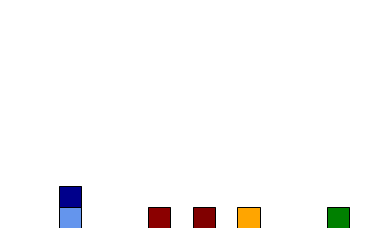

T: No, now you cannot put b1 in the tower because you must put red blocks on blue blocks


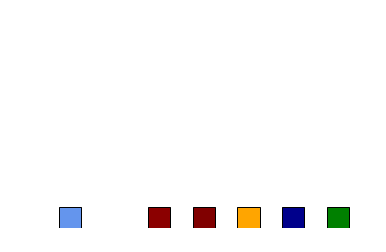

4.630409651199371 [('b0', 'blue'), ('b1', 'red'), ('b1', 'blue'), ('b2', 'red'), ('b2', 'blue'), ('b3', 'green'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'green'), ('b5', 'blue'), ('b6', 'blue'), ('b7', 'red'), ('b8', 'green'), ('b9', 'blue')]
5.204426884262101 [('b0', 'blue'), ('b1', 'red'), ('b1', 'blue'), ('b2', 'red'), ('b2', 'blue'), ('b3', 'green'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'green'), ('b5', 'blue'), ('b6', 'blue'), ('b7', 'red'), ('b8', 'green'), ('b9', 'blue'), ('b6', 'red')]
5.439306330482737 [('b0', 'blue'), ('b1', 'red'), ('b1', 'blue'), ('b2', 'red'), ('b2', 'blue'), ('b3', 'green'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'green'), ('b6', 'blue'), ('b7', 'red'), ('b8', 'green'), ('b9', 'blue')]
6.013323563545467 [('b0', 'blue'), ('b1', 'red'), ('b1', 'blue'), ('b2', 'red'), ('b2', 'blue'), ('b3', 'green'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'green'), ('b6', 'blue'), ('b7', 'red'), ('b8', 'green'), ('b9', 'blue'), ('b6', 'red')]
6.5804156024916995 [('

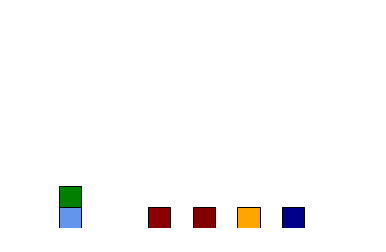

T: No, now you cannot put b1 in the tower because you must put red blocks on blue blocks


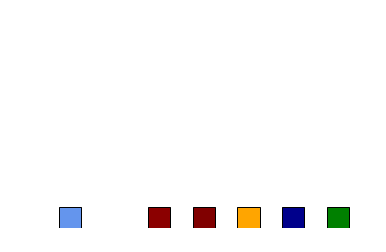

4.630409651199371 [('b0', 'blue'), ('b1', 'red'), ('b1', 'blue'), ('b2', 'red'), ('b2', 'blue'), ('b3', 'green'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'green'), ('b5', 'blue'), ('b6', 'blue'), ('b7', 'red'), ('b8', 'green'), ('b9', 'blue')]
5.204426884262101 [('b0', 'blue'), ('b1', 'red'), ('b1', 'blue'), ('b2', 'red'), ('b2', 'blue'), ('b3', 'green'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'green'), ('b5', 'blue'), ('b6', 'blue'), ('b7', 'red'), ('b8', 'green'), ('b9', 'blue'), ('b6', 'red')]
5.439306330482737 [('b0', 'blue'), ('b1', 'red'), ('b1', 'blue'), ('b2', 'red'), ('b2', 'blue'), ('b3', 'green'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'green'), ('b6', 'blue'), ('b7', 'red'), ('b8', 'green'), ('b9', 'blue')]
6.013323563545467 [('b0', 'blue'), ('b1', 'red'), ('b1', 'blue'), ('b2', 'red'), ('b2', 'blue'), ('b3', 'green'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'green'), ('b6', 'blue'), ('b7', 'red'), ('b8', 'green'), ('b9', 'blue'), ('b6', 'red')]
6.5804156024916995 [('

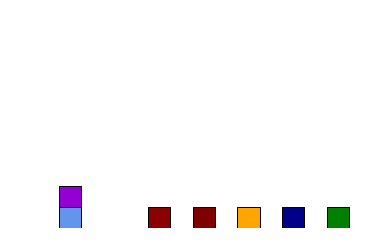

T: No, now you cannot put b1 in the tower because you must put red blocks on blue blocks


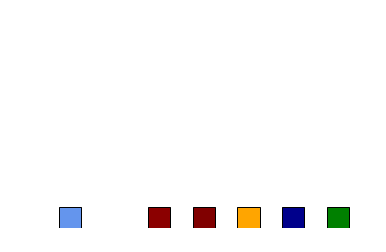

4.630409651199371 [('b0', 'blue'), ('b1', 'red'), ('b1', 'blue'), ('b2', 'red'), ('b2', 'blue'), ('b3', 'green'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'green'), ('b5', 'blue'), ('b6', 'blue'), ('b7', 'red'), ('b8', 'green'), ('b9', 'blue')]
5.204426884262101 [('b0', 'blue'), ('b1', 'red'), ('b1', 'blue'), ('b2', 'red'), ('b2', 'blue'), ('b3', 'green'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'green'), ('b5', 'blue'), ('b6', 'blue'), ('b7', 'red'), ('b8', 'green'), ('b9', 'blue'), ('b6', 'red')]
5.439306330482737 [('b0', 'blue'), ('b1', 'red'), ('b1', 'blue'), ('b2', 'red'), ('b2', 'blue'), ('b3', 'green'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'green'), ('b6', 'blue'), ('b7', 'red'), ('b8', 'green'), ('b9', 'blue')]
6.013323563545467 [('b0', 'blue'), ('b1', 'red'), ('b1', 'blue'), ('b2', 'red'), ('b2', 'blue'), ('b3', 'green'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'green'), ('b6', 'blue'), ('b7', 'red'), ('b8', 'green'), ('b9', 'blue'), ('b6', 'red')]
6.5804156024916995 [('

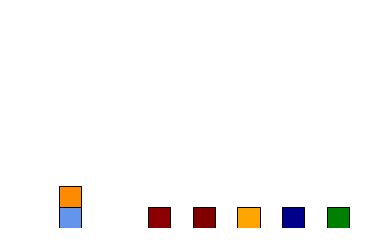

T: No, now you cannot put b1 in the tower because you must put red blocks on blue blocks


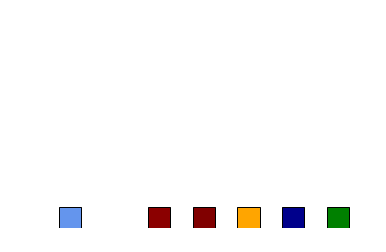

4.630409651199371 [('b0', 'blue'), ('b1', 'red'), ('b1', 'blue'), ('b2', 'red'), ('b2', 'blue'), ('b3', 'green'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'green'), ('b5', 'blue'), ('b6', 'blue'), ('b7', 'red'), ('b8', 'green'), ('b9', 'blue')]
5.204426884262101 [('b0', 'blue'), ('b1', 'red'), ('b1', 'blue'), ('b2', 'red'), ('b2', 'blue'), ('b3', 'green'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'green'), ('b5', 'blue'), ('b6', 'blue'), ('b7', 'red'), ('b8', 'green'), ('b9', 'blue'), ('b6', 'red')]
5.439306330482737 [('b0', 'blue'), ('b1', 'red'), ('b1', 'blue'), ('b2', 'red'), ('b2', 'blue'), ('b3', 'green'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'green'), ('b6', 'blue'), ('b7', 'red'), ('b8', 'green'), ('b9', 'blue')]
6.013323563545467 [('b0', 'blue'), ('b1', 'red'), ('b1', 'blue'), ('b2', 'red'), ('b2', 'blue'), ('b3', 'green'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'green'), ('b6', 'blue'), ('b7', 'red'), ('b8', 'green'), ('b9', 'blue'), ('b6', 'red')]
6.5804156024916995 [('

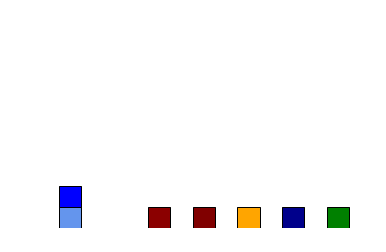

T: No, now you cannot put b1 in the tower because you must put red blocks on blue blocks


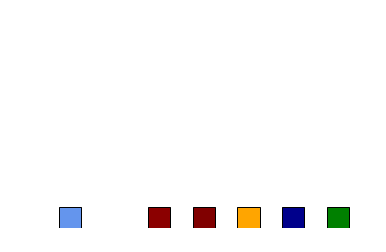

4.630409651199371 [('b0', 'blue'), ('b1', 'red'), ('b1', 'blue'), ('b2', 'red'), ('b2', 'blue'), ('b3', 'green'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'green'), ('b5', 'blue'), ('b6', 'blue'), ('b7', 'red'), ('b8', 'green'), ('b9', 'blue')]
5.204426884262101 [('b0', 'blue'), ('b1', 'red'), ('b1', 'blue'), ('b2', 'red'), ('b2', 'blue'), ('b3', 'green'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'green'), ('b5', 'blue'), ('b6', 'blue'), ('b7', 'red'), ('b8', 'green'), ('b9', 'blue'), ('b6', 'red')]
5.439306330482737 [('b0', 'blue'), ('b1', 'red'), ('b1', 'blue'), ('b2', 'red'), ('b2', 'blue'), ('b3', 'green'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'green'), ('b6', 'blue'), ('b7', 'red'), ('b8', 'green'), ('b9', 'blue')]
6.013323563545467 [('b0', 'blue'), ('b1', 'red'), ('b1', 'blue'), ('b2', 'red'), ('b2', 'blue'), ('b3', 'green'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'green'), ('b6', 'blue'), ('b7', 'red'), ('b8', 'green'), ('b9', 'blue'), ('b6', 'red')]
6.5804156024916995 [('

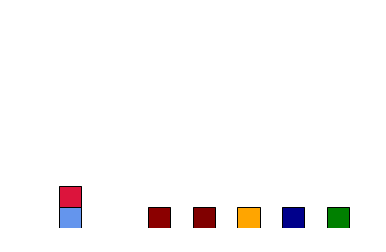

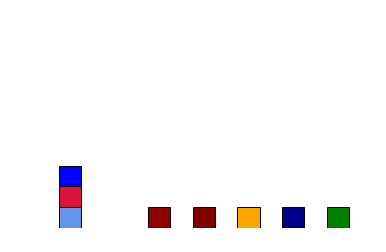

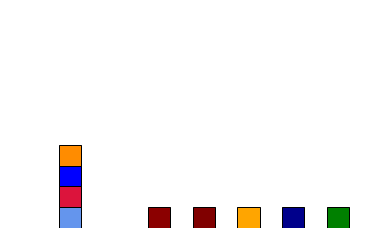

T: No, now you cannot put b1 in the tower because you must put red blocks on blue blocks


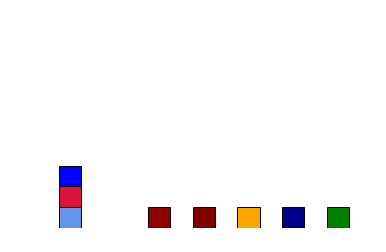

3.6770741232678885 [('b1', 'red'), ('b1', 'blue'), ('b2', 'red'), ('b2', 'blue'), ('b3', 'green'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'green'), ('b5', 'blue'), ('b6', 'blue'), ('b8', 'green'), ('b9', 'blue')]
4.251091356330618 [('b1', 'red'), ('b1', 'blue'), ('b2', 'red'), ('b2', 'blue'), ('b3', 'green'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'green'), ('b5', 'blue'), ('b6', 'blue'), ('b8', 'green'), ('b9', 'blue'), ('b6', 'red')]
4.485970802551255 [('b1', 'red'), ('b1', 'blue'), ('b2', 'red'), ('b2', 'blue'), ('b3', 'green'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'green'), ('b6', 'blue'), ('b8', 'green'), ('b9', 'blue')]
5.059988035613984 [('b1', 'red'), ('b1', 'blue'), ('b2', 'red'), ('b2', 'blue'), ('b3', 'green'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'green'), ('b6', 'blue'), ('b8', 'green'), ('b9', 'blue'), ('b6', 'red')]
6.063777913330982 [('b1', 'red'), ('b1', 'blue'), ('b2', 'red'), ('b2', 'blue'), ('b3', 'green'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'green

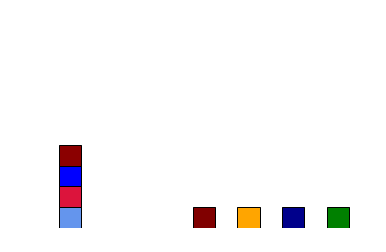

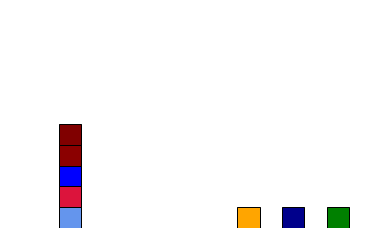

(forall (?x) (or (not (red ?x)) (exists (?y) (and (blue ?y) (on ?x ?y)))))
T: no, put red blocks on blue blocks


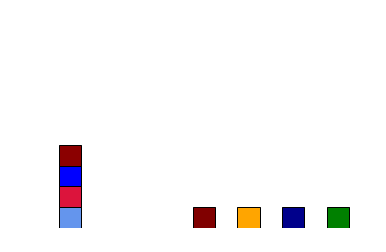

3.5580729396485276 [('b1', 'red'), ('b1', 'blue'), ('b2', 'red'), ('b2', 'blue'), ('b3', 'green'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'green'), ('b5', 'blue'), ('b6', 'blue'), ('b8', 'green')]
4.158952880714847 [('b1', 'red'), ('b1', 'blue'), ('b2', 'red'), ('b2', 'blue'), ('b3', 'green'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'green'), ('b5', 'blue'), ('b6', 'blue'), ('b8', 'green'), ('b6', 'red')]
4.366969618931894 [('b1', 'red'), ('b1', 'blue'), ('b2', 'red'), ('b2', 'blue'), ('b3', 'green'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'green'), ('b6', 'blue'), ('b8', 'green')]
4.967849559998213 [('b1', 'red'), ('b1', 'blue'), ('b2', 'red'), ('b2', 'blue'), ('b3', 'green'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'green'), ('b6', 'blue'), ('b8', 'green'), ('b6', 'red')]
5.944776729711622 [('b1', 'red'), ('b1', 'blue'), ('b2', 'red'), ('b2', 'blue'), ('b3', 'green'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'green'), ('b8', 'green')]
6.122898304731386 [('b1', 'red'), ('b1', 'b

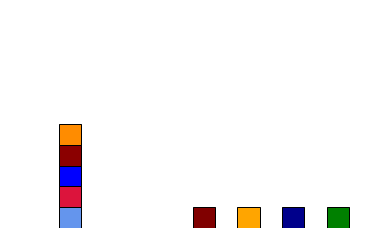

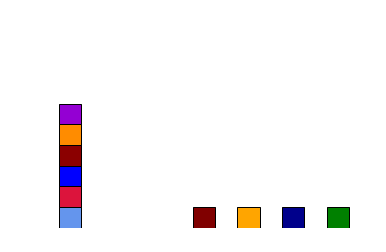

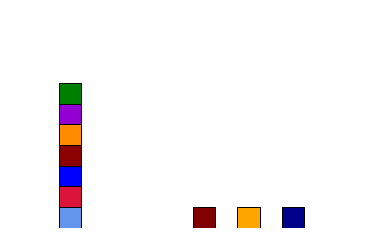

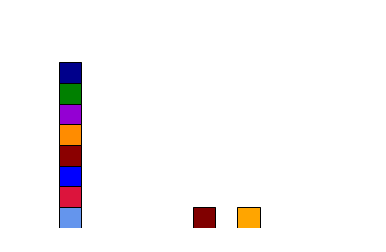

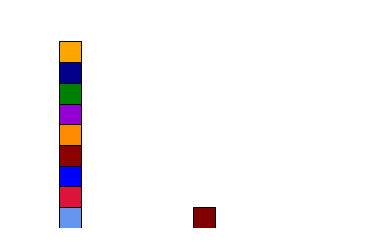

T: No, now you cannot put b2 in the tower because you must put red blocks on blue blocks


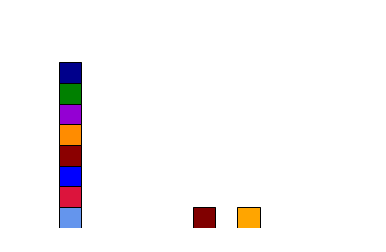

1.4005139231466528 [('b2', 'red'), ('b2', 'blue'), ('b3', 'green'), ('b3', 'yellow'), ('b4', 'blue')]
3.005824524875524 [('b2', 'red'), ('b2', 'blue'), ('b3', 'green'), ('b3', 'yellow')]
5.322660879474735 [('b2', 'red'), ('b2', 'blue'), ('b3', 'green'), ('b3', 'yellow'), ('b4', 'blue'), ('b3', 'red')]
5.578702769246758 [('b2', 'red'), ('b2', 'blue'), ('b3', 'green'), ('b4', 'blue'), ('b3', 'red')]


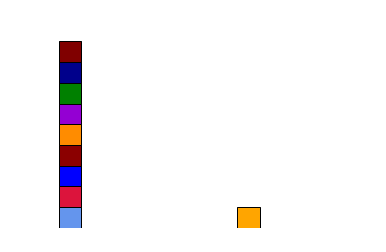

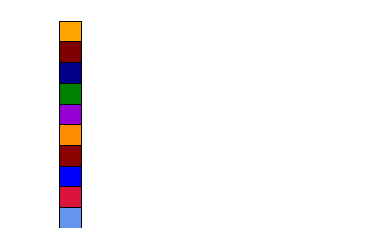

Parsing domain blocks-domain.pddl
Parsing problem tworules/problem30.pddl
6.812192472768228 [('b0', 'red'), ('b0', 'blue'), ('b1', 'green'), ('b1', 'blue'), ('b2', 'green'), ('b4', 'yellow'), ('b5', 'blue'), ('b7', 'green'), ('b8', 'blue'), ('b9', 'blue')]
7.055836162022481 [('b0', 'red'), ('b0', 'blue'), ('b1', 'green'), ('b1', 'blue'), ('b2', 'green'), ('b4', 'yellow'), ('b7', 'green'), ('b8', 'blue'), ('b9', 'blue')]
7.595488529168664 [('b0', 'red'), ('b0', 'blue'), ('b1', 'green'), ('b1', 'blue'), ('b2', 'green'), ('b4', 'yellow'), ('b7', 'green'), ('b8', 'blue')]
7.865781657320722 [('b0', 'red'), ('b0', 'blue'), ('b1', 'green'), ('b1', 'blue'), ('b2', 'green'), ('b4', 'yellow'), ('b5', 'blue'), ('b7', 'green'), ('b8', 'blue'), ('b9', 'blue'), ('b6', 'red')]
8.109425346574977 [('b0', 'red'), ('b0', 'blue'), ('b1', 'green'), ('b1', 'blue'), ('b2', 'green'), ('b4', 'yellow'), ('b7', 'green'), ('b8', 'blue'), ('b9', 'blue'), ('b6', 'red')]
8.40438520845203 [('b0', 'red'), ('b0', 'blue

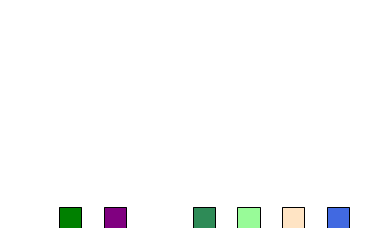

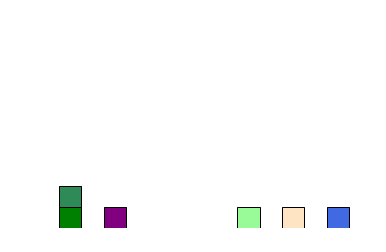

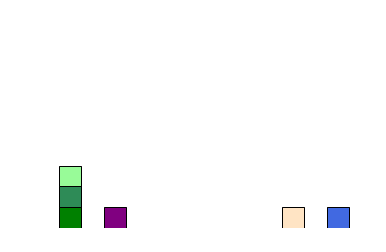

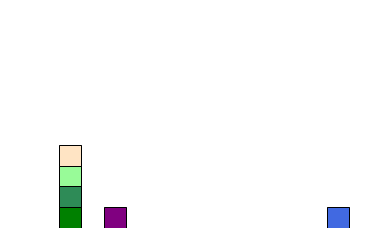

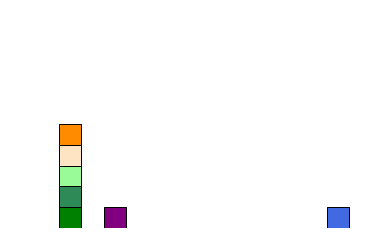

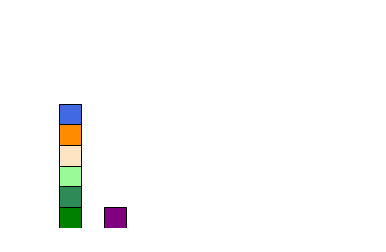

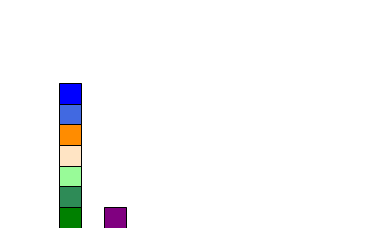

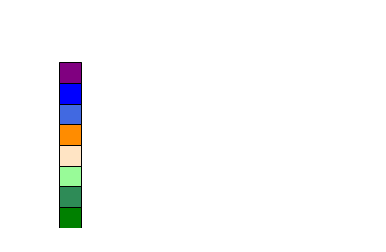

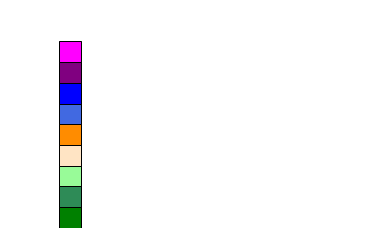

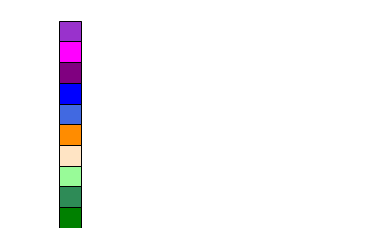

Parsing domain blocks-domain.pddl
Parsing problem tworules/problem31.pddl
4.187453201214399 [('b0', 'blue'), ('b1', 'green'), ('b2', 'green'), ('b3', 'blue'), ('b4', 'red'), ('b4', 'blue'), ('b5', 'red'), ('b5', 'blue'), ('b6', 'yellow'), ('b7', 'red'), ('b7', 'blue'), ('b8', 'blue'), ('b9', 'yellow')]
5.523893464034876 [('b0', 'blue'), ('b1', 'green'), ('b2', 'green'), ('b3', 'blue'), ('b4', 'red'), ('b4', 'blue'), ('b5', 'red'), ('b5', 'blue'), ('b6', 'yellow'), ('b7', 'red'), ('b7', 'blue'), ('b9', 'yellow')]
5.563574379368001 [('b0', 'blue'), ('b1', 'green'), ('b2', 'green'), ('b3', 'blue'), ('b4', 'red'), ('b4', 'blue'), ('b5', 'red'), ('b5', 'blue'), ('b6', 'yellow'), ('b7', 'red'), ('b7', 'blue'), ('b8', 'blue'), ('b9', 'yellow'), ('b8', 'red')]
6.900014642188478 [('b0', 'blue'), ('b1', 'green'), ('b2', 'green'), ('b3', 'blue'), ('b4', 'red'), ('b4', 'blue'), ('b5', 'red'), ('b5', 'blue'), ('b6', 'yellow'), ('b7', 'red'), ('b7', 'blue'), ('b9', 'yellow'), ('b8', 'red')]
6.907968

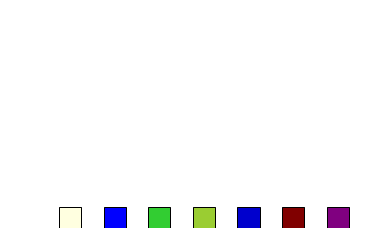

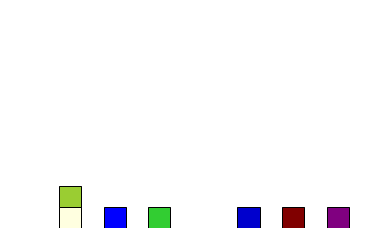

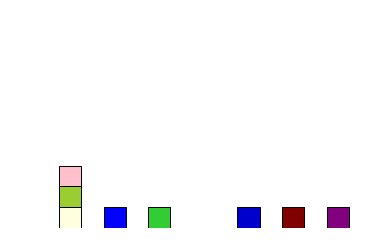

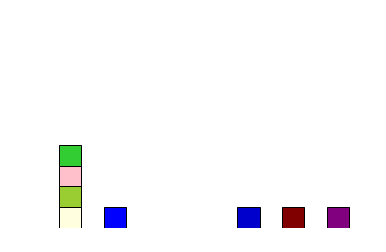

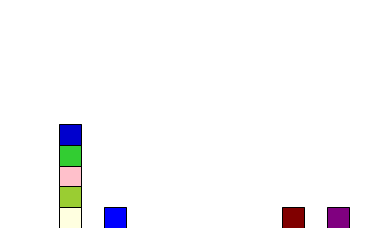

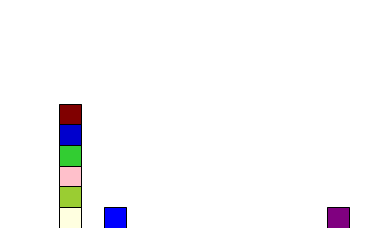

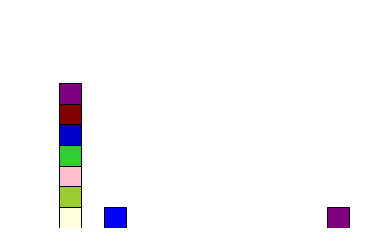

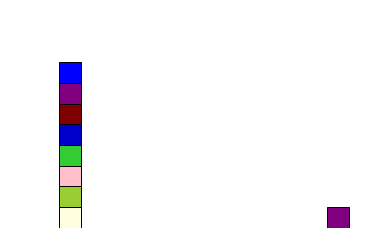

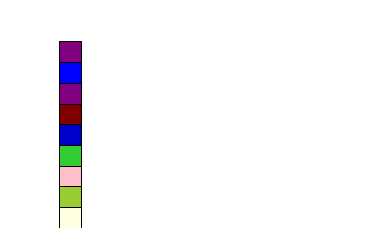

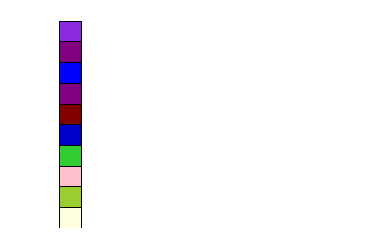

Parsing domain blocks-domain.pddl
Parsing problem tworules/problem32.pddl
6.092817613333027 [('b0', 'blue'), ('b1', 'blue'), ('b2', 'blue'), ('b3', 'blue'), ('b4', 'green'), ('b5', 'red'), ('b5', 'blue'), ('b6', 'red'), ('b7', 'blue'), ('b8', 'green'), ('b9', 'yellow')]
6.63246998047921 [('b0', 'blue'), ('b2', 'blue'), ('b3', 'blue'), ('b4', 'green'), ('b5', 'red'), ('b5', 'blue'), ('b6', 'red'), ('b7', 'blue'), ('b8', 'green'), ('b9', 'yellow')]
7.172122347625393 [('b0', 'blue'), ('b2', 'blue'), ('b3', 'blue'), ('b4', 'green'), ('b5', 'red'), ('b5', 'blue'), ('b6', 'red'), ('b8', 'green'), ('b9', 'yellow')]
7.282748841195357 [('b0', 'blue'), ('b1', 'blue'), ('b2', 'blue'), ('b3', 'blue'), ('b4', 'green'), ('b5', 'red'), ('b5', 'blue'), ('b6', 'red'), ('b7', 'blue'), ('b8', 'green'), ('b9', 'yellow'), ('b1', 'red')]
7.82240120834154 [('b0', 'blue'), ('b2', 'blue'), ('b3', 'blue'), ('b4', 'green'), ('b5', 'red'), ('b5', 'blue'), ('b6', 'red'), ('b7', 'blue'), ('b8', 'green'), ('b9', 'ye

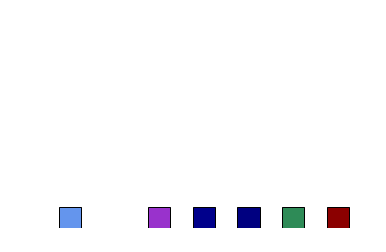

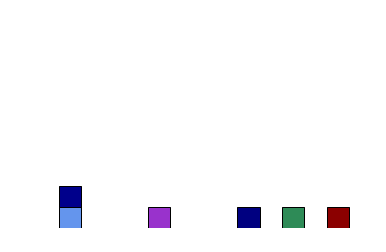

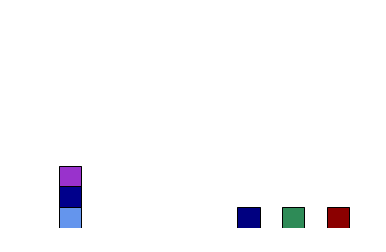

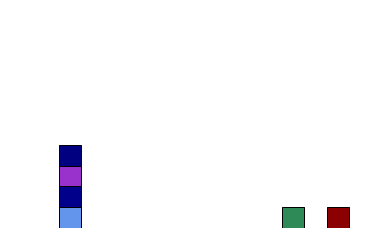

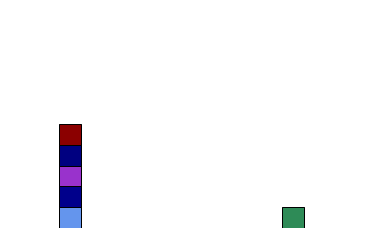

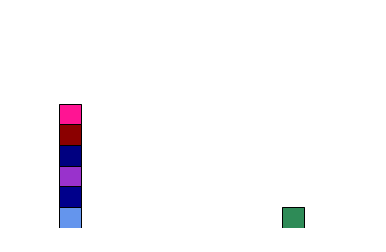

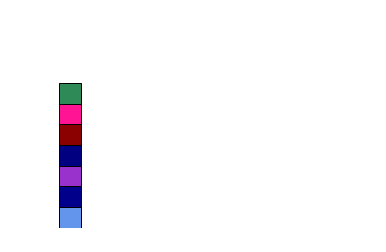

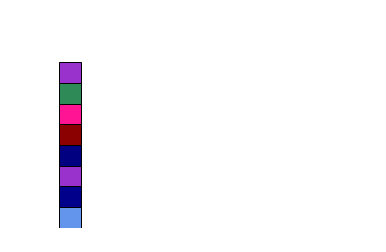

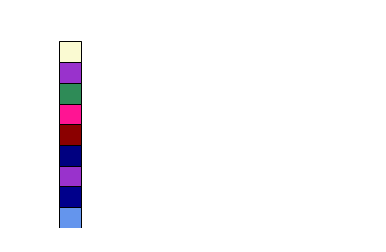

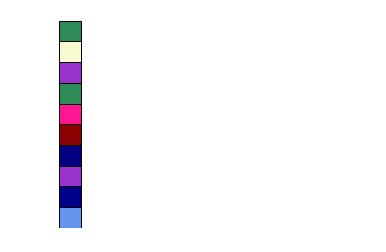

Parsing domain blocks-domain.pddl
Parsing problem tworules/problem33.pddl
6.642557013598521 [('b0', 'blue'), ('b1', 'yellow'), ('b2', 'green'), ('b2', 'yellow'), ('b3', 'blue'), ('b4', 'green'), ('b5', 'yellow'), ('b6', 'red'), ('b6', 'blue'), ('b7', 'yellow'), ('b8', 'blue'), ('b9', 'red'), ('b9', 'blue')]
6.654696103609266 [('b0', 'blue'), ('b1', 'yellow'), ('b2', 'green'), ('b2', 'yellow'), ('b3', 'blue'), ('b4', 'green'), ('b5', 'yellow'), ('b6', 'red'), ('b7', 'yellow'), ('b8', 'blue'), ('b9', 'red'), ('b9', 'blue')]
6.6668351936200105 [('b0', 'blue'), ('b1', 'yellow'), ('b2', 'green'), ('b2', 'yellow'), ('b3', 'blue'), ('b4', 'green'), ('b5', 'yellow'), ('b6', 'red'), ('b7', 'yellow'), ('b8', 'blue'), ('b9', 'red')]
6.753444541403501 [('b0', 'blue'), ('b1', 'yellow'), ('b2', 'green'), ('b2', 'yellow'), ('b3', 'blue'), ('b4', 'green'), ('b5', 'yellow'), ('b6', 'red'), ('b6', 'blue'), ('b7', 'yellow'), ('b8', 'blue'), ('b9', 'red'), ('b9', 'blue'), ('b0', 'green')]
6.76558363141424

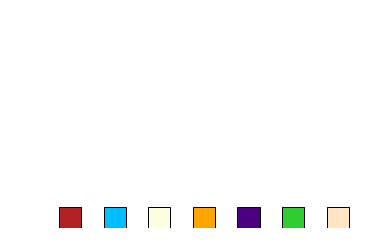

(forall (?x) (or (not (red ?x)) (exists (?y) (and (blue ?y) (on ?x ?y)))))
T: no, put red blocks on blue blocks


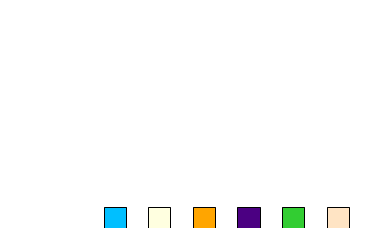

6.59822745985693 [('b0', 'blue'), ('b1', 'yellow'), ('b2', 'green'), ('b2', 'yellow'), ('b3', 'blue'), ('b4', 'green'), ('b5', 'yellow'), ('b6', 'red'), ('b6', 'blue'), ('b7', 'yellow'), ('b8', 'blue'), ('b9', 'red'), ('b9', 'blue')]
6.610366549867675 [('b0', 'blue'), ('b1', 'yellow'), ('b2', 'green'), ('b2', 'yellow'), ('b3', 'blue'), ('b4', 'green'), ('b5', 'yellow'), ('b6', 'red'), ('b7', 'yellow'), ('b8', 'blue'), ('b9', 'red'), ('b9', 'blue')]
6.62250563987842 [('b0', 'blue'), ('b1', 'yellow'), ('b2', 'green'), ('b2', 'yellow'), ('b3', 'blue'), ('b4', 'green'), ('b5', 'yellow'), ('b6', 'red'), ('b7', 'yellow'), ('b8', 'blue'), ('b9', 'red')]
6.70911498766191 [('b0', 'blue'), ('b1', 'yellow'), ('b2', 'green'), ('b2', 'yellow'), ('b3', 'blue'), ('b4', 'green'), ('b5', 'yellow'), ('b6', 'red'), ('b6', 'blue'), ('b7', 'yellow'), ('b8', 'blue'), ('b9', 'red'), ('b9', 'blue'), ('b0', 'green')]
6.721254077672655 [('b0', 'blue'), ('b1', 'yellow'), ('b2', 'green'), ('b2', 'yellow'), ('b3',

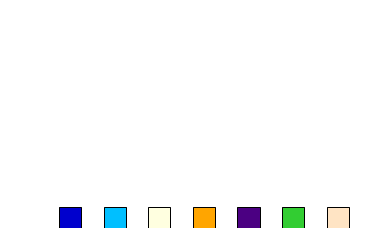

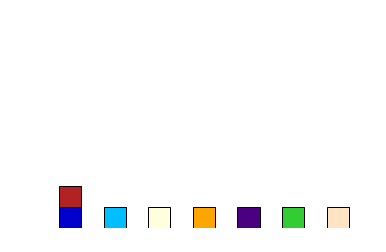

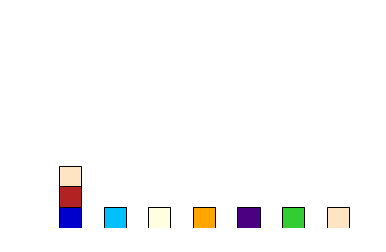

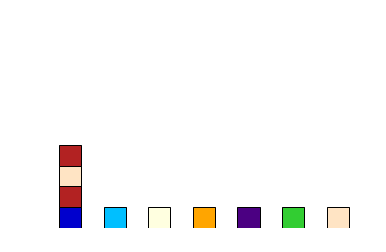

(forall (?x) (or (not (red ?x)) (exists (?y) (and (blue ?y) (on ?x ?y)))))
T: no, put red blocks on blue blocks


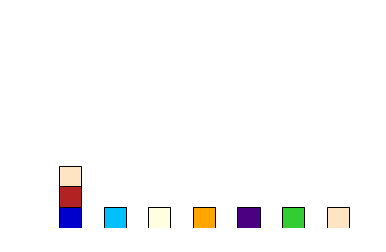

5.573132908385201 [('b0', 'blue'), ('b1', 'yellow'), ('b2', 'green'), ('b2', 'yellow'), ('b3', 'blue'), ('b4', 'green'), ('b5', 'yellow'), ('b6', 'red'), ('b6', 'blue'), ('b7', 'yellow')]
5.585001592540551 [('b0', 'blue'), ('b1', 'yellow'), ('b2', 'green'), ('b2', 'yellow'), ('b3', 'blue'), ('b4', 'green'), ('b5', 'yellow'), ('b6', 'red'), ('b7', 'yellow')]
5.684020436190181 [('b0', 'blue'), ('b1', 'yellow'), ('b2', 'green'), ('b2', 'yellow'), ('b3', 'blue'), ('b4', 'green'), ('b5', 'yellow'), ('b6', 'red'), ('b6', 'blue'), ('b7', 'yellow'), ('b0', 'green')]
5.695889120345531 [('b0', 'blue'), ('b1', 'yellow'), ('b2', 'green'), ('b2', 'yellow'), ('b3', 'blue'), ('b4', 'green'), ('b5', 'yellow'), ('b6', 'red'), ('b7', 'yellow'), ('b0', 'green')]
5.829174798157224 [('b0', 'blue'), ('b1', 'yellow'), ('b2', 'green'), ('b3', 'blue'), ('b4', 'green'), ('b5', 'yellow'), ('b6', 'red'), ('b6', 'blue'), ('b7', 'yellow')]
5.841043482312574 [('b0', 'blue'), ('b1', 'yellow'), ('b2', 'green'), ('b3',

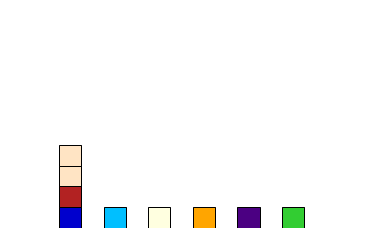

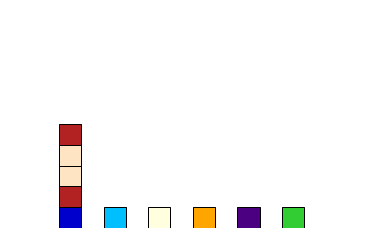

(forall (?x) (or (not (red ?x)) (exists (?y) (and (blue ?y) (on ?x ?y)))))
T: no, put red blocks on blue blocks


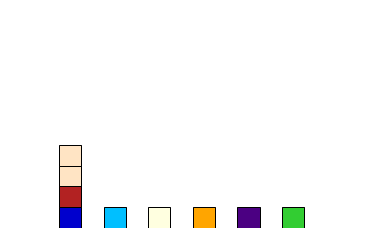

5.12689370914345 [('b0', 'blue'), ('b1', 'yellow'), ('b2', 'green'), ('b2', 'yellow'), ('b3', 'blue'), ('b4', 'green'), ('b5', 'yellow'), ('b6', 'red'), ('b6', 'blue')]
5.1387621565221835 [('b0', 'blue'), ('b1', 'yellow'), ('b2', 'green'), ('b2', 'yellow'), ('b3', 'blue'), ('b4', 'green'), ('b5', 'yellow'), ('b6', 'red')]
5.23778123694843 [('b0', 'blue'), ('b1', 'yellow'), ('b2', 'green'), ('b2', 'yellow'), ('b3', 'blue'), ('b4', 'green'), ('b5', 'yellow'), ('b6', 'red'), ('b6', 'blue'), ('b0', 'green')]
5.249649684327164 [('b0', 'blue'), ('b1', 'yellow'), ('b2', 'green'), ('b2', 'yellow'), ('b3', 'blue'), ('b4', 'green'), ('b5', 'yellow'), ('b6', 'red'), ('b0', 'green')]
5.382935598915473 [('b0', 'blue'), ('b1', 'yellow'), ('b2', 'green'), ('b3', 'blue'), ('b4', 'green'), ('b5', 'yellow'), ('b6', 'red'), ('b6', 'blue')]
5.394804046294206 [('b0', 'blue'), ('b1', 'yellow'), ('b2', 'green'), ('b3', 'blue'), ('b4', 'green'), ('b5', 'yellow'), ('b6', 'red')]
5.777229560293491 [('b0', 'blue

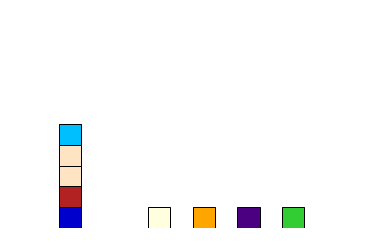

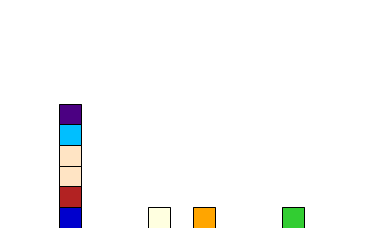

T: No, now you cannot put b6 in the tower because you must put red blocks on blue blocks


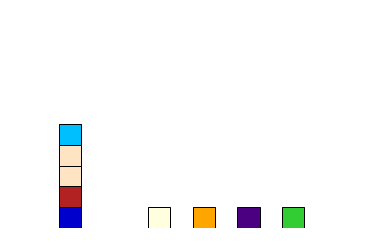

4.534215857980724 [('b0', 'blue'), ('b1', 'yellow'), ('b2', 'green'), ('b2', 'yellow'), ('b3', 'blue'), ('b4', 'green'), ('b6', 'red')]
5.168534382455287 [('b0', 'blue'), ('b1', 'yellow'), ('b2', 'green'), ('b2', 'yellow'), ('b3', 'blue'), ('b4', 'green'), ('b6', 'red'), ('b3', 'red')]
5.406546043441938 [('b0', 'blue'), ('b1', 'yellow'), ('b2', 'green'), ('b2', 'yellow'), ('b4', 'green'), ('b6', 'red')]


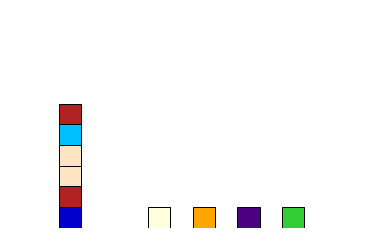

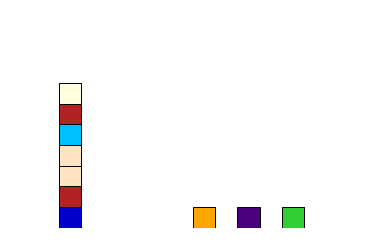

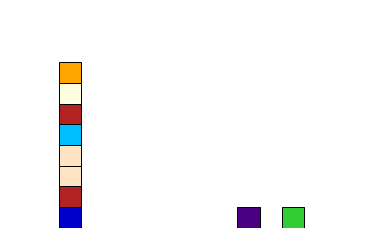

(forall (?y) (or (not (yellow ?y)) (exists (?x) (and (green ?x) (on ?x ?y)))))
T: no, put green blocks on yellow blocks


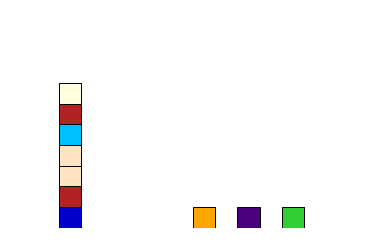

3.149736124535096 [('b1', 'yellow'), ('b2', 'green'), ('b2', 'yellow'), ('b3', 'blue'), ('b4', 'green')]
3.7840546490096587 [('b1', 'yellow'), ('b2', 'green'), ('b2', 'yellow'), ('b3', 'blue'), ('b4', 'green'), ('b3', 'red')]
4.022066309996309 [('b1', 'yellow'), ('b2', 'green'), ('b2', 'yellow'), ('b4', 'green')]
4.141816730179341 [('b1', 'yellow'), ('b2', 'green'), ('b4', 'green')]


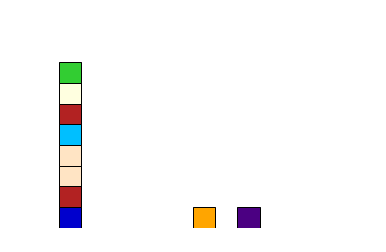

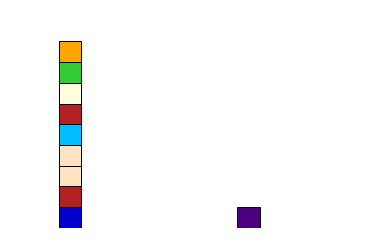

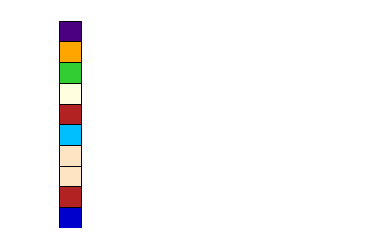

Parsing domain blocks-domain.pddl
Parsing problem tworules/problem34.pddl
5.884912378827268 [('b0', 'blue'), ('b1', 'blue'), ('b2', 'green'), ('b3', 'green'), ('b3', 'yellow'), ('b4', 'yellow'), ('b5', 'green'), ('b6', 'blue'), ('b8', 'green'), ('b8', 'blue'), ('b9', 'red')]
6.04432031788488 [('b0', 'blue'), ('b1', 'blue'), ('b2', 'green'), ('b3', 'green'), ('b3', 'yellow'), ('b4', 'yellow'), ('b5', 'green'), ('b6', 'blue'), ('b8', 'green'), ('b9', 'red')]
6.936059034335291 [('b0', 'blue'), ('b1', 'blue'), ('b2', 'green'), ('b3', 'green'), ('b3', 'yellow'), ('b4', 'yellow'), ('b5', 'green'), ('b8', 'green'), ('b9', 'red')]
7.154672818162577 [('b0', 'blue'), ('b1', 'blue'), ('b2', 'green'), ('b3', 'green'), ('b3', 'yellow'), ('b4', 'yellow'), ('b5', 'green'), ('b6', 'blue'), ('b8', 'green'), ('b8', 'blue'), ('b9', 'red'), ('b7', 'red')]
7.314080757220189 [('b0', 'blue'), ('b1', 'blue'), ('b2', 'green'), ('b3', 'green'), ('b3', 'yellow'), ('b4', 'yellow'), ('b5', 'green'), ('b6', 'blue')

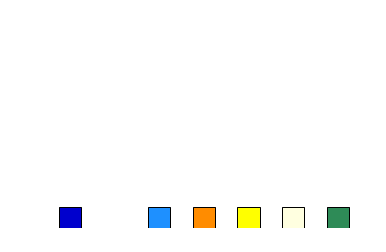

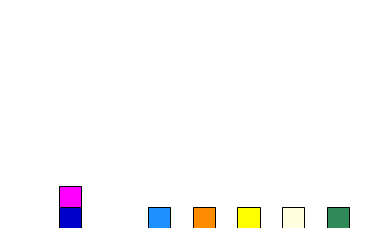

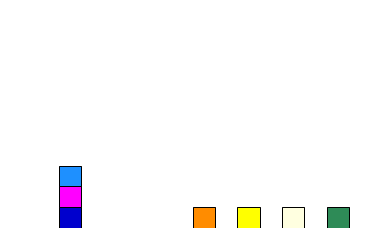

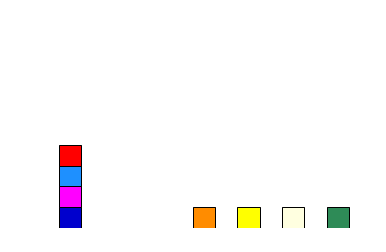

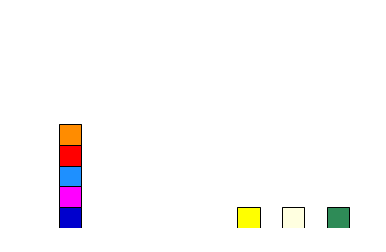

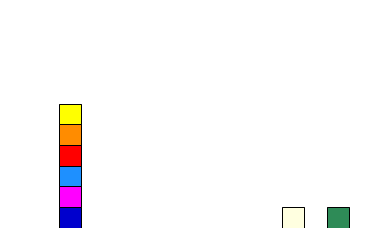

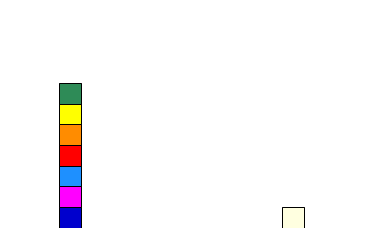

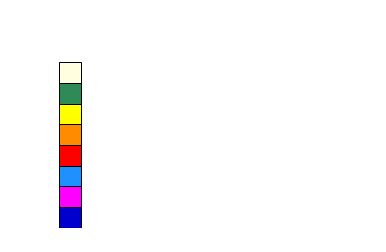

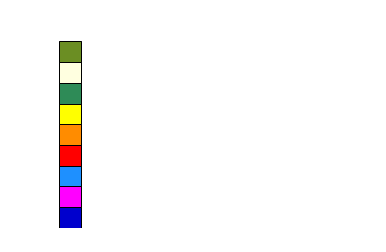

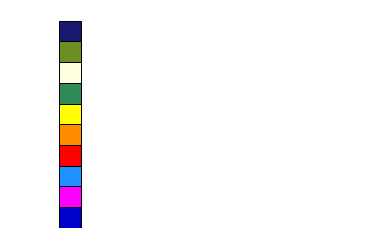

Parsing domain blocks-domain.pddl
Parsing problem tworules/problem35.pddl
5.207587817581911 [('b0', 'green'), ('b0', 'yellow'), ('b1', 'blue'), ('b3', 'red'), ('b4', 'green'), ('b4', 'yellow'), ('b5', 'blue'), ('b6', 'blue'), ('b9', 'green'), ('b9', 'blue')]
5.927927685541591 [('b0', 'green'), ('b0', 'yellow'), ('b1', 'blue'), ('b3', 'red'), ('b4', 'green'), ('b4', 'yellow'), ('b5', 'blue'), ('b6', 'blue'), ('b9', 'green'), ('b9', 'blue'), ('b1', 'red')]
6.080724163494598 [('b0', 'green'), ('b0', 'yellow'), ('b1', 'blue'), ('b3', 'red'), ('b4', 'green'), ('b4', 'yellow'), ('b5', 'blue'), ('b6', 'blue'), ('b9', 'green')]
6.8010640314542785 [('b0', 'green'), ('b0', 'yellow'), ('b1', 'blue'), ('b3', 'red'), ('b4', 'green'), ('b4', 'yellow'), ('b5', 'blue'), ('b6', 'blue'), ('b9', 'green'), ('b1', 'red')]
7.197688124876901 [('b0', 'green'), ('b0', 'yellow'), ('b1', 'blue'), ('b3', 'red'), ('b4', 'green'), ('b4', 'yellow'), ('b5', 'blue'), ('b6', 'blue'), ('b9', 'green'), ('b9', 'blue'), ('

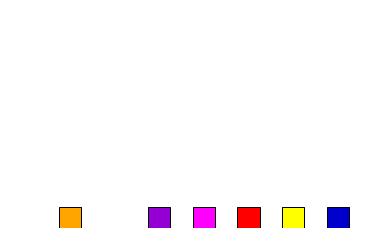

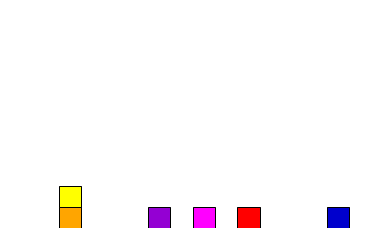

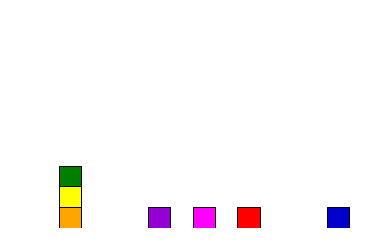

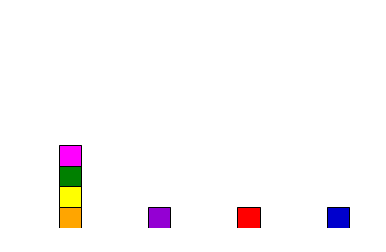

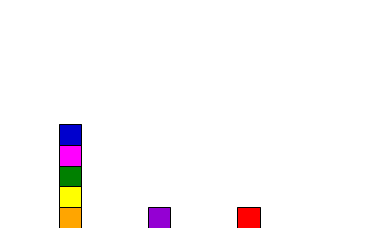

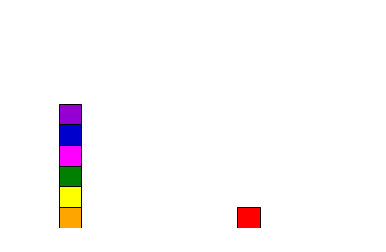

T: No, now you cannot put b3 in the tower because you must put red blocks on blue blocks


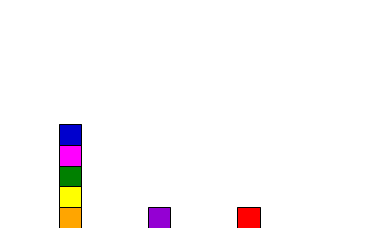

2.538891995281467 [('b1', 'blue'), ('b3', 'red'), ('b5', 'blue'), ('b6', 'blue')]
3.338185231891815 [('b1', 'blue'), ('b3', 'red'), ('b5', 'blue'), ('b6', 'blue'), ('b1', 'red')]
3.7462367452354743 [('b1', 'blue'), ('b3', 'red'), ('b5', 'blue')]
4.50566370843333 [('b1', 'blue'), ('b3', 'red'), ('b5', 'blue'), ('b6', 'blue'), ('b1', 'red'), ('b7', 'red')]


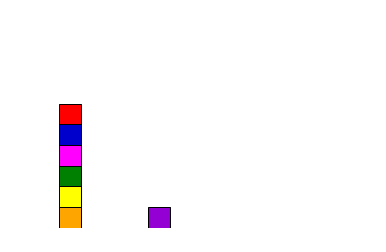

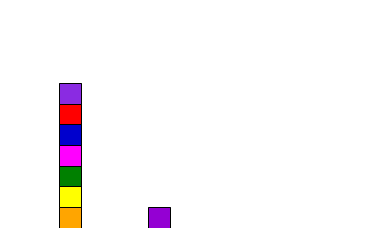

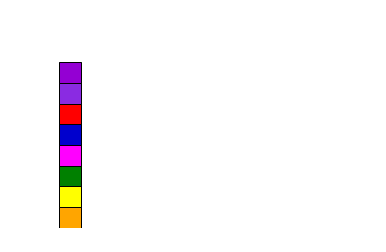

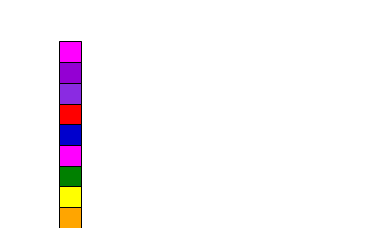

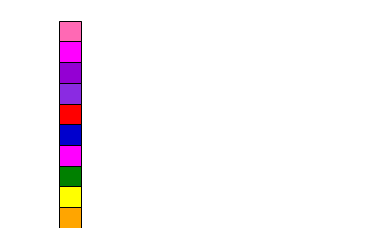

Parsing domain blocks-domain.pddl
Parsing problem tworules/problem36.pddl
6.725878472639393 [('b0', 'blue'), ('b1', 'red'), ('b1', 'blue'), ('b2', 'blue'), ('b4', 'yellow'), ('b6', 'blue'), ('b7', 'green'), ('b8', 'green'), ('b9', 'green'), ('b9', 'yellow')]
7.525171709249741 [('b0', 'blue'), ('b1', 'red'), ('b1', 'blue'), ('b2', 'blue'), ('b4', 'yellow'), ('b6', 'blue'), ('b7', 'green'), ('b8', 'green'), ('b9', 'green'), ('b9', 'yellow'), ('b0', 'red')]
7.804117582450161 [('b0', 'blue'), ('b1', 'red'), ('b2', 'blue'), ('b4', 'yellow'), ('b6', 'blue'), ('b7', 'green'), ('b8', 'green'), ('b9', 'green'), ('b9', 'yellow')]
8.603410819060509 [('b0', 'blue'), ('b1', 'red'), ('b2', 'blue'), ('b4', 'yellow'), ('b6', 'blue'), ('b7', 'green'), ('b8', 'green'), ('b9', 'green'), ('b9', 'yellow'), ('b0', 'red')]
8.692650185791257 [('b0', 'blue'), ('b1', 'red'), ('b1', 'blue'), ('b2', 'blue'), ('b4', 'yellow'), ('b6', 'blue'), ('b7', 'green'), ('b8', 'green'), ('b9', 'green'), ('b9', 'yellow'), ('b

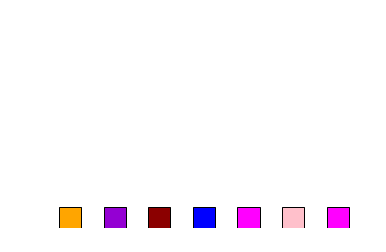

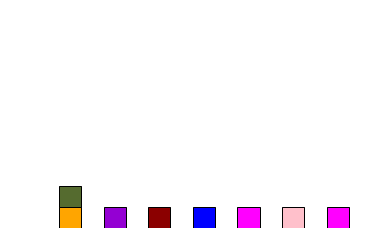

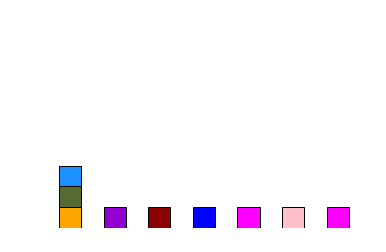

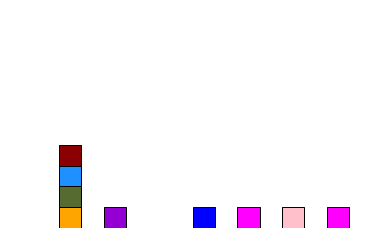

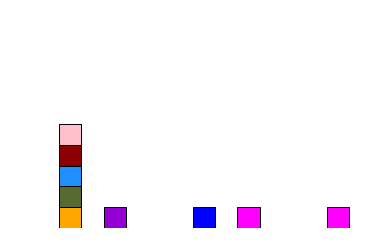

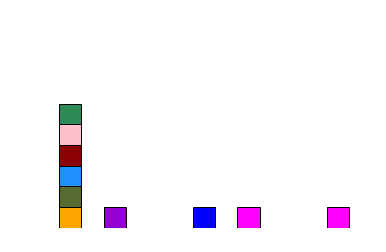

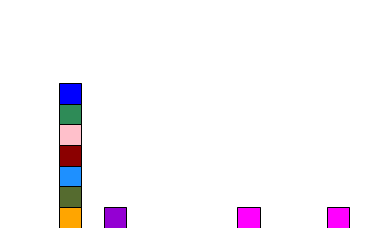

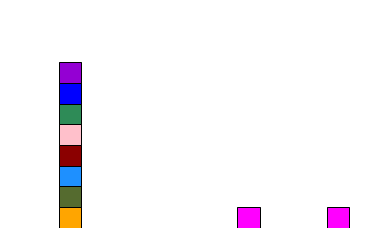

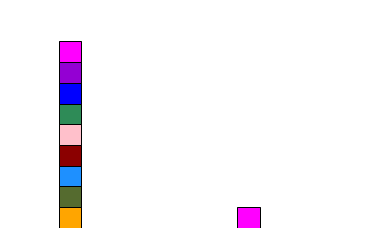

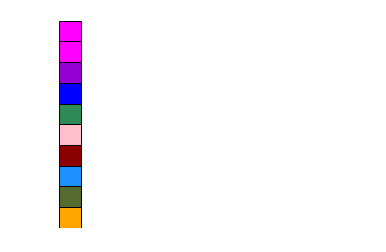

Parsing domain blocks-domain.pddl
Parsing problem tworules/problem37.pddl
6.44918169997683 [('b0', 'green'), ('b0', 'yellow'), ('b2', 'yellow'), ('b3', 'green'), ('b3', 'blue'), ('b5', 'green'), ('b6', 'blue'), ('b7', 'blue'), ('b8', 'yellow'), ('b9', 'yellow')]
6.568932120159861 [('b0', 'green'), ('b2', 'yellow'), ('b3', 'green'), ('b3', 'blue'), ('b5', 'green'), ('b6', 'blue'), ('b7', 'blue'), ('b8', 'yellow'), ('b9', 'yellow')]
6.665640565345669 [('b0', 'green'), ('b0', 'yellow'), ('b2', 'yellow'), ('b3', 'green'), ('b5', 'green'), ('b6', 'blue'), ('b7', 'blue'), ('b8', 'yellow'), ('b9', 'yellow')]
6.7853909855287 [('b0', 'green'), ('b2', 'yellow'), ('b3', 'green'), ('b5', 'green'), ('b6', 'blue'), ('b7', 'blue'), ('b8', 'yellow'), ('b9', 'yellow')]
6.85909389929146 [('b0', 'green'), ('b0', 'yellow'), ('b2', 'yellow'), ('b3', 'green'), ('b3', 'blue'), ('b5', 'green'), ('b6', 'blue'), ('b7', 'blue'), ('b8', 'yellow'), ('b9', 'yellow'), ('b8', 'green')]
7.075552764660299 [('b0', 'gree

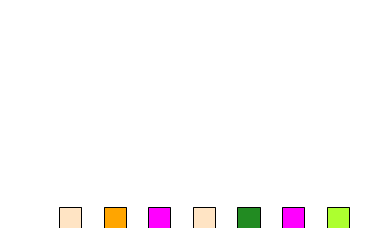

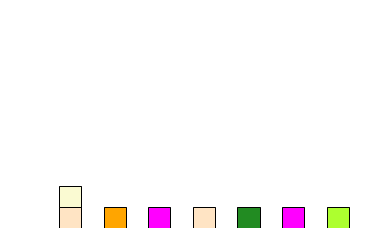

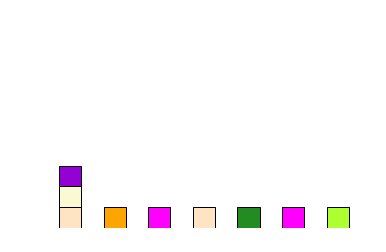

(forall (?y) (or (not (yellow ?y)) (exists (?x) (and (green ?x) (on ?x ?y)))))
T: no, put green blocks on yellow blocks


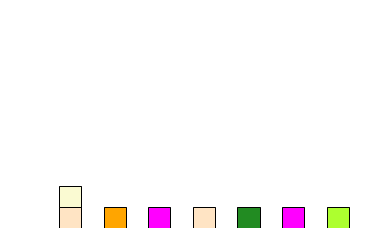

5.985215918334769 [('b0', 'green'), ('b0', 'yellow'), ('b2', 'yellow'), ('b3', 'green'), ('b3', 'blue'), ('b5', 'green'), ('b6', 'blue'), ('b7', 'blue'), ('b8', 'yellow')]
6.201674783703608 [('b0', 'green'), ('b0', 'yellow'), ('b2', 'yellow'), ('b3', 'green'), ('b5', 'green'), ('b6', 'blue'), ('b7', 'blue'), ('b8', 'yellow')]
6.784509154945117 [('b0', 'green'), ('b0', 'yellow'), ('b2', 'yellow'), ('b3', 'green'), ('b3', 'blue'), ('b5', 'green'), ('b6', 'blue'), ('b7', 'blue'), ('b8', 'yellow'), ('b7', 'red')]
7.000968020313956 [('b0', 'green'), ('b0', 'yellow'), ('b2', 'yellow'), ('b3', 'green'), ('b5', 'green'), ('b6', 'blue'), ('b7', 'blue'), ('b8', 'yellow'), ('b7', 'red')]
7.6619782474424865 [('b0', 'green'), ('b0', 'yellow'), ('b2', 'yellow'), ('b3', 'green'), ('b5', 'green'), ('b6', 'blue'), ('b8', 'yellow')]
7.951987631486633 [('b0', 'green'), ('b0', 'yellow'), ('b2', 'yellow'), ('b3', 'green'), ('b3', 'blue'), ('b5', 'green'), ('b6', 'blue'), ('b7', 'blue'), ('b8', 'yellow'), (

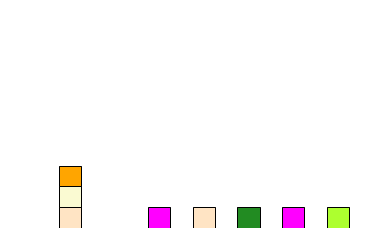

(forall (?y) (or (not (yellow ?y)) (exists (?x) (and (green ?x) (on ?x ?y)))))
T: no, put green blocks on yellow blocks


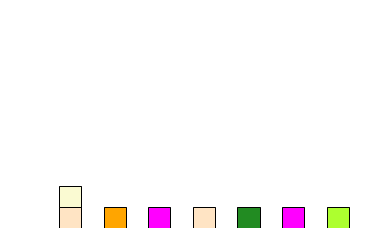

5.985215928062625 [('b0', 'green'), ('b0', 'yellow'), ('b2', 'yellow'), ('b3', 'green'), ('b3', 'blue'), ('b5', 'green'), ('b6', 'blue'), ('b7', 'blue'), ('b8', 'yellow')]
6.201674793431464 [('b0', 'green'), ('b0', 'yellow'), ('b2', 'yellow'), ('b3', 'green'), ('b5', 'green'), ('b6', 'blue'), ('b7', 'blue'), ('b8', 'yellow')]
6.784509164672973 [('b0', 'green'), ('b0', 'yellow'), ('b2', 'yellow'), ('b3', 'green'), ('b3', 'blue'), ('b5', 'green'), ('b6', 'blue'), ('b7', 'blue'), ('b8', 'yellow'), ('b7', 'red')]
7.000968030041812 [('b0', 'green'), ('b0', 'yellow'), ('b2', 'yellow'), ('b3', 'green'), ('b5', 'green'), ('b6', 'blue'), ('b7', 'blue'), ('b8', 'yellow'), ('b7', 'red')]
7.661978257170342 [('b0', 'green'), ('b0', 'yellow'), ('b2', 'yellow'), ('b3', 'green'), ('b5', 'green'), ('b6', 'blue'), ('b8', 'yellow')]
7.9519876412144885 [('b0', 'green'), ('b0', 'yellow'), ('b2', 'yellow'), ('b3', 'green'), ('b3', 'blue'), ('b5', 'green'), ('b6', 'blue'), ('b7', 'blue'), ('b8', 'yellow'), (

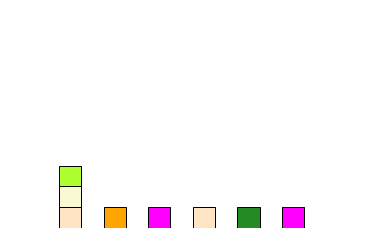

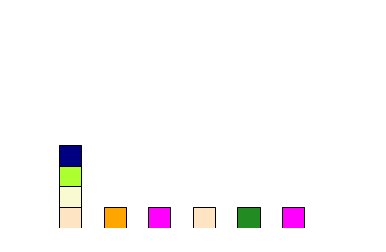

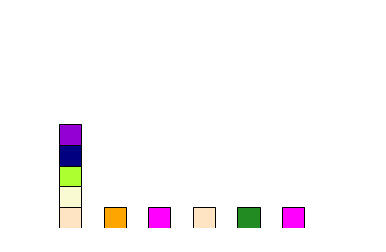

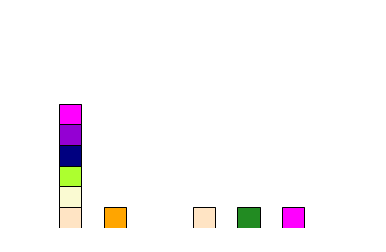

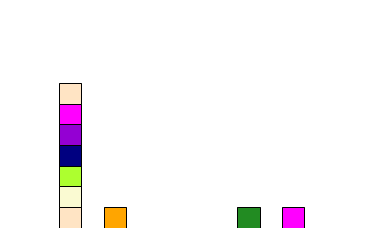

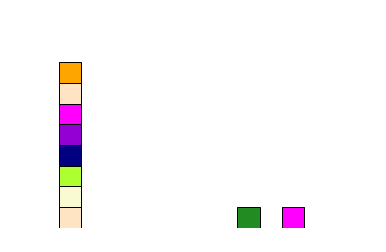

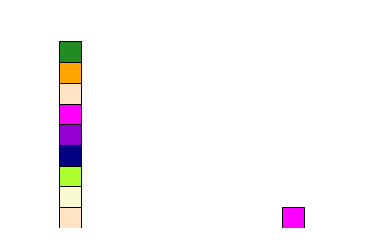

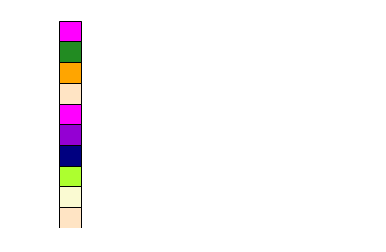

Parsing domain blocks-domain.pddl
Parsing problem tworules/problem38.pddl
5.384013496101717 [('b0', 'red'), ('b0', 'blue'), ('b1', 'blue'), ('b2', 'blue'), ('b3', 'red'), ('b4', 'green'), ('b5', 'red'), ('b6', 'yellow'), ('b7', 'blue'), ('b8', 'blue'), ('b9', 'green'), ('b9', 'yellow')]
5.796836054306398 [('b0', 'red'), ('b0', 'blue'), ('b1', 'blue'), ('b3', 'red'), ('b4', 'green'), ('b5', 'red'), ('b6', 'yellow'), ('b7', 'blue'), ('b8', 'blue'), ('b9', 'green'), ('b9', 'yellow')]
6.7270310328706335 [('b0', 'red'), ('b0', 'blue'), ('b1', 'blue'), ('b2', 'blue'), ('b3', 'red'), ('b4', 'green'), ('b5', 'red'), ('b6', 'yellow'), ('b7', 'blue'), ('b8', 'blue'), ('b9', 'green'), ('b9', 'yellow'), ('b2', 'red')]
7.014744333620666 [('b0', 'red'), ('b1', 'blue'), ('b3', 'red'), ('b4', 'green'), ('b5', 'red'), ('b6', 'yellow'), ('b7', 'blue'), ('b8', 'blue'), ('b9', 'green'), ('b9', 'yellow')]


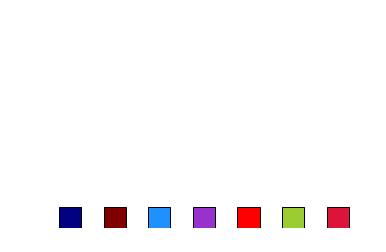

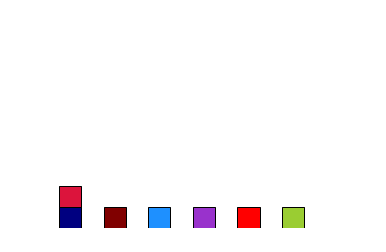

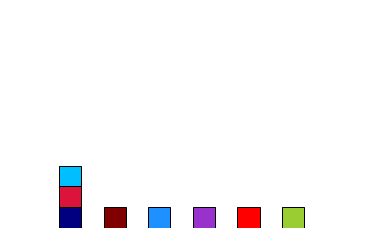

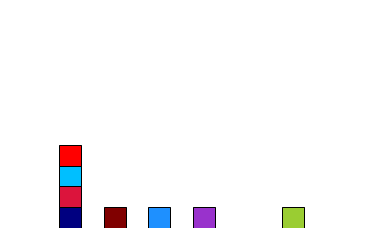

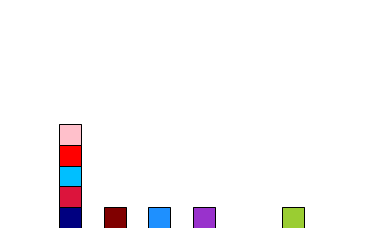

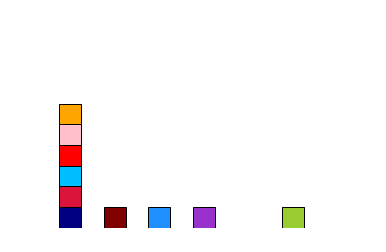

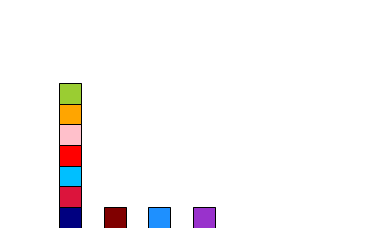

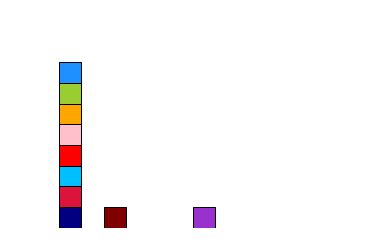

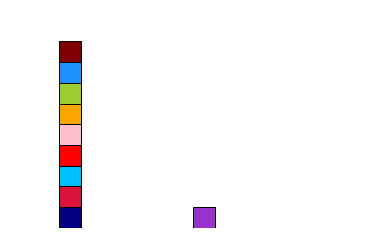

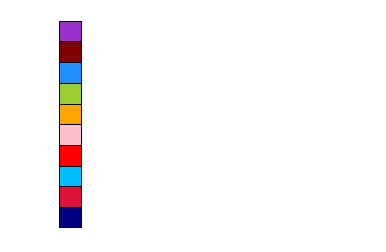

Parsing domain blocks-domain.pddl
Parsing problem tworules/problem39.pddl
6.165180297349318 [('b0', 'green'), ('b1', 'green'), ('b2', 'blue'), ('b3', 'blue'), ('b4', 'yellow'), ('b5', 'blue'), ('b6', 'blue'), ('b7', 'green'), ('b8', 'yellow'), ('b9', 'blue')]
6.897195168764445 [('b0', 'green'), ('b1', 'green'), ('b2', 'blue'), ('b3', 'blue'), ('b4', 'yellow'), ('b5', 'blue'), ('b6', 'blue'), ('b7', 'green'), ('b8', 'yellow'), ('b9', 'blue'), ('b5', 'red')]
7.044395559313499 [('b0', 'green'), ('b1', 'green'), ('b2', 'blue'), ('b3', 'blue'), ('b4', 'yellow'), ('b6', 'blue'), ('b7', 'green'), ('b8', 'yellow'), ('b9', 'blue')]
7.696488405374793 [('b0', 'green'), ('b1', 'green'), ('b2', 'blue'), ('b3', 'blue'), ('b4', 'yellow'), ('b5', 'blue'), ('b6', 'blue'), ('b7', 'green'), ('b8', 'yellow'), ('b9', 'blue'), ('b5', 'red'), ('b2', 'red')]
7.776410430728626 [('b0', 'green'), ('b1', 'green'), ('b2', 'blue'), ('b3', 'blue'), ('b4', 'yellow'), ('b6', 'blue'), ('b7', 'green'), ('b8', 'yellow'),

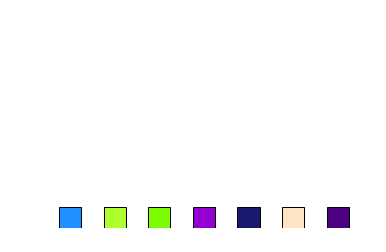

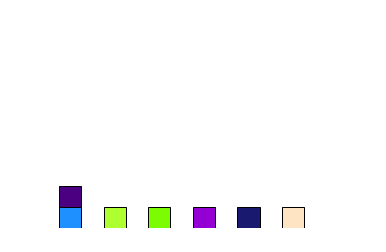

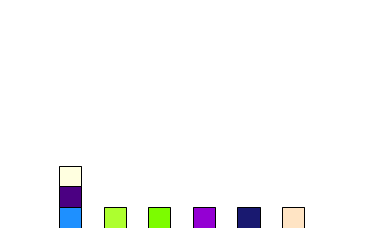

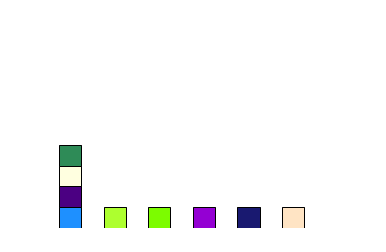

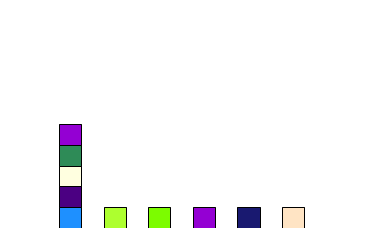

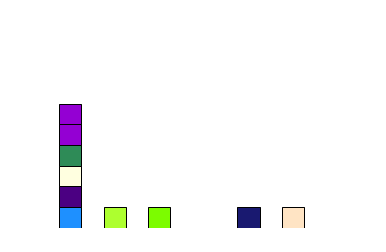

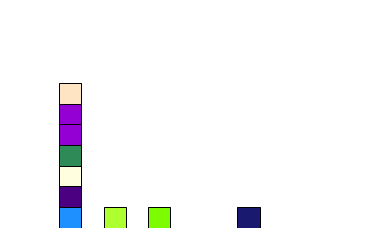

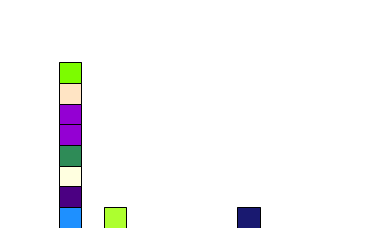

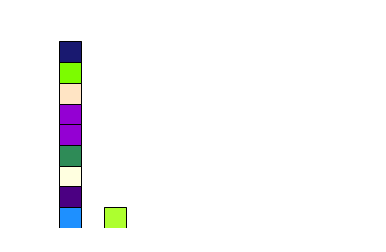

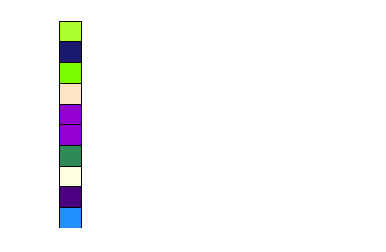

Parsing domain blocks-domain.pddl
Parsing problem tworules/problem4.pddl
5.697558105351979 [('b0', 'green'), ('b1', 'blue'), ('b2', 'yellow'), ('b3', 'green'), ('b3', 'blue'), ('b4', 'green'), ('b4', 'blue'), ('b5', 'yellow'), ('b6', 'green'), ('b6', 'yellow'), ('b7', 'red'), ('b8', 'blue'), ('b9', 'green'), ('b9', 'yellow')]
5.914016970720818 [('b0', 'green'), ('b1', 'blue'), ('b2', 'yellow'), ('b3', 'green'), ('b3', 'blue'), ('b4', 'green'), ('b5', 'yellow'), ('b6', 'green'), ('b6', 'yellow'), ('b7', 'red'), ('b8', 'blue'), ('b9', 'green'), ('b9', 'yellow')]
6.326839528925499 [('b0', 'green'), ('b1', 'blue'), ('b2', 'yellow'), ('b3', 'green'), ('b3', 'blue'), ('b4', 'green'), ('b5', 'yellow'), ('b6', 'green'), ('b6', 'yellow'), ('b7', 'red'), ('b9', 'green'), ('b9', 'yellow')]
7.040575642120895 [('b0', 'green'), ('b1', 'blue'), ('b2', 'yellow'), ('b3', 'green'), ('b3', 'blue'), ('b4', 'green'), ('b4', 'blue'), ('b5', 'yellow'), ('b6', 'green'), ('b6', 'yellow'), ('b7', 'red'), ('b8',

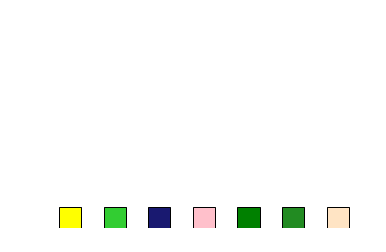

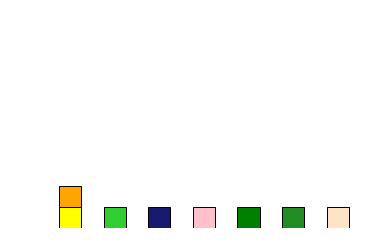

(forall (?y) (or (not (yellow ?y)) (exists (?x) (and (green ?x) (on ?x ?y)))))
T: no, put green blocks on yellow blocks


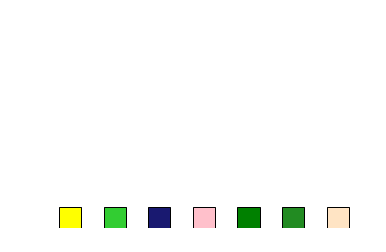

5.419343181307726 [('b0', 'green'), ('b1', 'blue'), ('b2', 'yellow'), ('b3', 'green'), ('b3', 'blue'), ('b4', 'green'), ('b4', 'blue'), ('b5', 'yellow'), ('b6', 'green'), ('b6', 'yellow'), ('b7', 'red'), ('b8', 'blue'), ('b9', 'green'), ('b9', 'yellow')]
5.635802046676565 [('b0', 'green'), ('b1', 'blue'), ('b2', 'yellow'), ('b3', 'green'), ('b3', 'blue'), ('b4', 'green'), ('b5', 'yellow'), ('b6', 'green'), ('b6', 'yellow'), ('b7', 'red'), ('b8', 'blue'), ('b9', 'green'), ('b9', 'yellow')]
6.048624604881246 [('b0', 'green'), ('b1', 'blue'), ('b2', 'yellow'), ('b3', 'green'), ('b3', 'blue'), ('b4', 'green'), ('b5', 'yellow'), ('b6', 'green'), ('b6', 'yellow'), ('b7', 'red'), ('b9', 'green'), ('b9', 'yellow')]
6.762360718076642 [('b0', 'green'), ('b1', 'blue'), ('b2', 'yellow'), ('b3', 'green'), ('b3', 'blue'), ('b4', 'green'), ('b4', 'blue'), ('b5', 'yellow'), ('b6', 'green'), ('b6', 'yellow'), ('b7', 'red'), ('b8', 'blue'), ('b9', 'green'), ('b9', 'yellow'), ('b8', 'red')]
6.79344022646

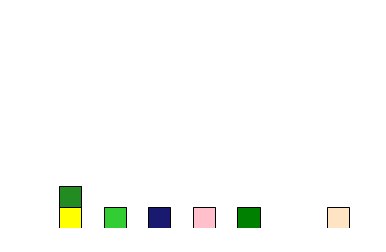

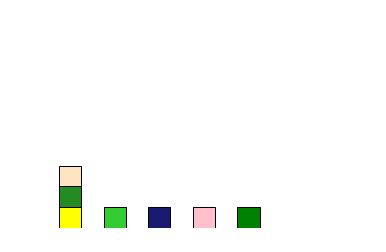

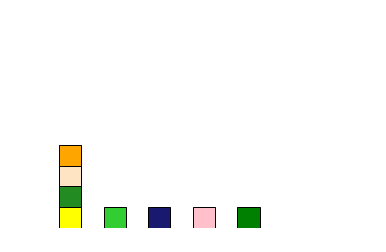

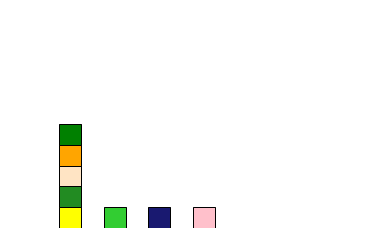

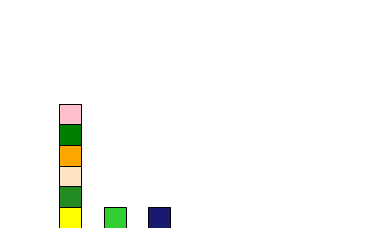

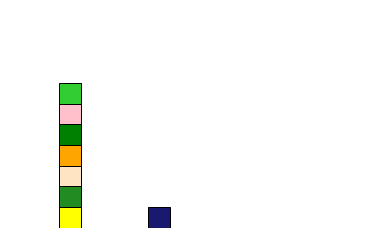

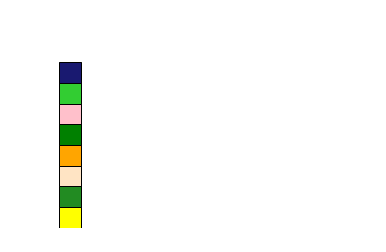

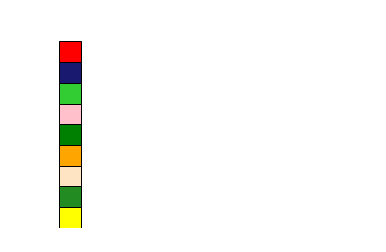

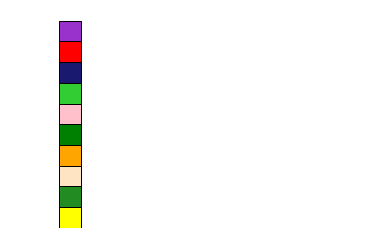

Parsing domain blocks-domain.pddl
Parsing problem tworules/problem40.pddl
5.940859151206887 [('b0', 'yellow'), ('b1', 'blue'), ('b2', 'blue'), ('b3', 'blue'), ('b4', 'green'), ('b5', 'blue'), ('b7', 'red'), ('b7', 'blue'), ('b8', 'red'), ('b9', 'red'), ('b9', 'blue')]
6.6985513088949356 [('b0', 'yellow'), ('b1', 'blue'), ('b2', 'blue'), ('b3', 'blue'), ('b4', 'green'), ('b5', 'blue'), ('b7', 'red'), ('b8', 'red'), ('b9', 'red'), ('b9', 'blue')]
6.7401523878172345 [('b0', 'yellow'), ('b1', 'blue'), ('b2', 'blue'), ('b3', 'blue'), ('b4', 'green'), ('b5', 'blue'), ('b7', 'red'), ('b7', 'blue'), ('b8', 'red'), ('b9', 'red'), ('b9', 'blue'), ('b1', 'red')]
7.456243466582984 [('b0', 'yellow'), ('b1', 'blue'), ('b2', 'blue'), ('b3', 'blue'), ('b4', 'green'), ('b5', 'blue'), ('b7', 'red'), ('b8', 'red'), ('b9', 'red')]
7.497844545505283 [('b0', 'yellow'), ('b1', 'blue'), ('b2', 'blue'), ('b3', 'blue'), ('b4', 'green'), ('b5', 'blue'), ('b7', 'red'), ('b8', 'red'), ('b9', 'red'), ('b9', 'blue')

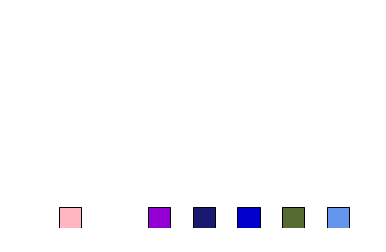

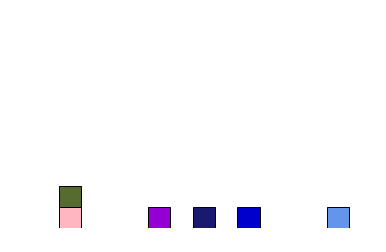

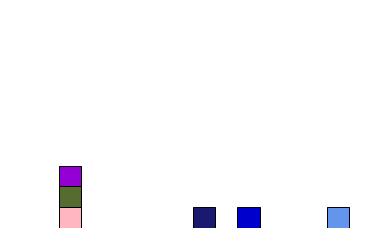

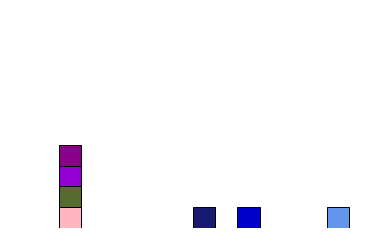

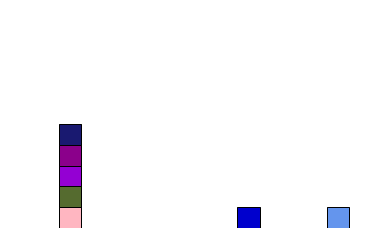

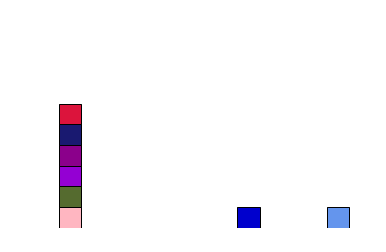

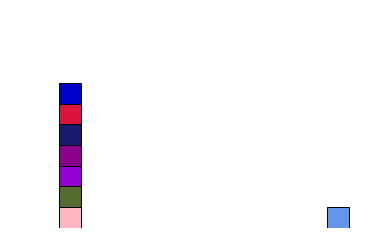

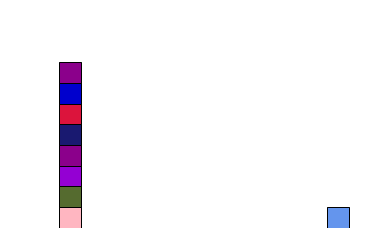

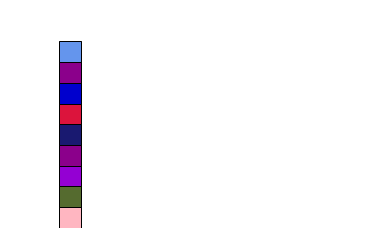

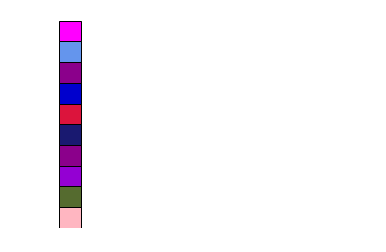

Parsing domain blocks-domain.pddl
Parsing problem tworules/problem41.pddl
5.279788367669201 [('b0', 'red'), ('b0', 'blue'), ('b1', 'yellow'), ('b2', 'blue'), ('b3', 'blue'), ('b4', 'yellow'), ('b5', 'green'), ('b6', 'red'), ('b7', 'red'), ('b8', 'yellow'), ('b9', 'yellow')]
5.402414022627193 [('b0', 'red'), ('b0', 'blue'), ('b1', 'yellow'), ('b2', 'blue'), ('b3', 'blue'), ('b4', 'yellow'), ('b5', 'green'), ('b6', 'red'), ('b7', 'red'), ('b8', 'yellow'), ('b9', 'yellow'), ('b3', 'green')]
5.682925903155914 [('b0', 'red'), ('b0', 'blue'), ('b1', 'yellow'), ('b2', 'blue'), ('b3', 'blue'), ('b4', 'yellow'), ('b5', 'green'), ('b6', 'red'), ('b7', 'red'), ('b8', 'yellow'), ('b9', 'yellow'), ('b3', 'green'), ('b4', 'green')]
6.333951490015391 [('b0', 'red'), ('b0', 'blue'), ('b1', 'yellow'), ('b2', 'blue'), ('b3', 'blue'), ('b4', 'yellow'), ('b5', 'green'), ('b6', 'red'), ('b7', 'red'), ('b8', 'yellow'), ('b9', 'yellow'), ('b3', 'green'), ('b4', 'green'), ('b1', 'green')]
9.041385941503377 [(

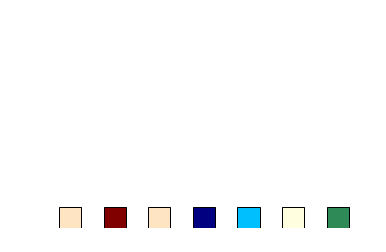

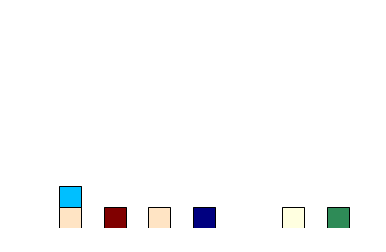

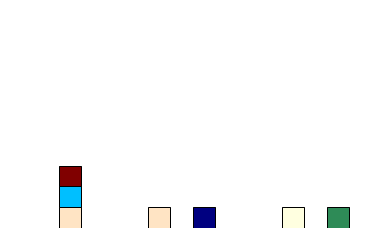

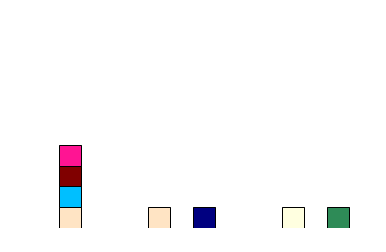

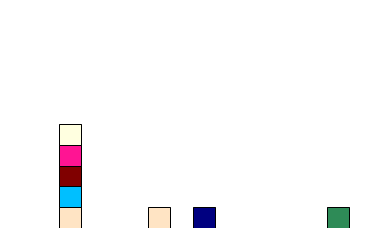

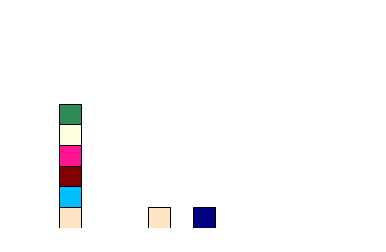

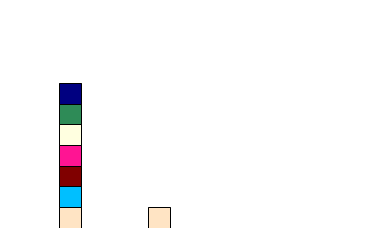

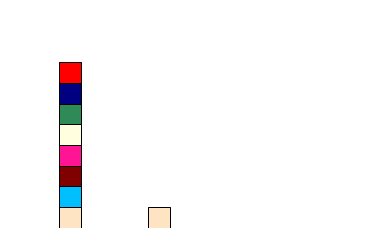

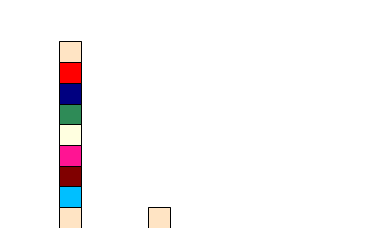

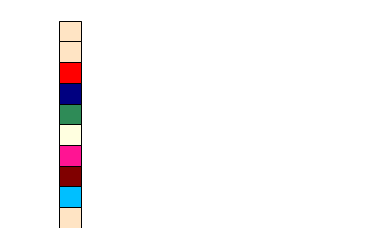

Parsing domain blocks-domain.pddl
Parsing problem tworules/problem42.pddl
7.150056555932776 [('b0', 'yellow'), ('b1', 'red'), ('b1', 'blue'), ('b2', 'blue'), ('b3', 'red'), ('b3', 'blue'), ('b4', 'red'), ('b4', 'blue'), ('b5', 'red'), ('b6', 'yellow'), ('b7', 'green'), ('b8', 'blue'), ('b9', 'red'), ('b9', 'blue')]
7.272682210890768 [('b0', 'yellow'), ('b1', 'red'), ('b1', 'blue'), ('b2', 'blue'), ('b3', 'red'), ('b3', 'blue'), ('b4', 'red'), ('b4', 'blue'), ('b5', 'red'), ('b6', 'yellow'), ('b7', 'green'), ('b8', 'blue'), ('b9', 'red'), ('b9', 'blue'), ('b2', 'green')]
7.907748713620824 [('b0', 'yellow'), ('b1', 'red'), ('b1', 'blue'), ('b2', 'blue'), ('b3', 'red'), ('b4', 'red'), ('b4', 'blue'), ('b5', 'red'), ('b6', 'yellow'), ('b7', 'green'), ('b8', 'blue'), ('b9', 'red'), ('b9', 'blue')]
8.030374368578816 [('b0', 'yellow'), ('b1', 'red'), ('b1', 'blue'), ('b2', 'blue'), ('b3', 'red'), ('b4', 'red'), ('b4', 'blue'), ('b5', 'red'), ('b6', 'yellow'), ('b7', 'green'), ('b8', 'blue'), 

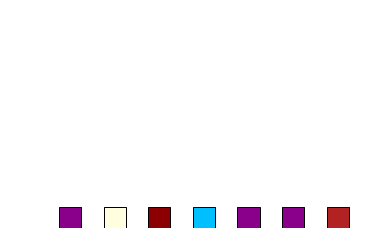

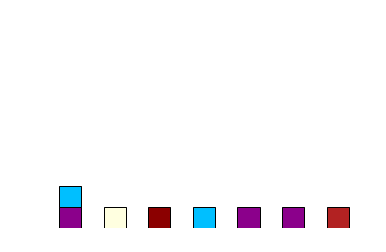

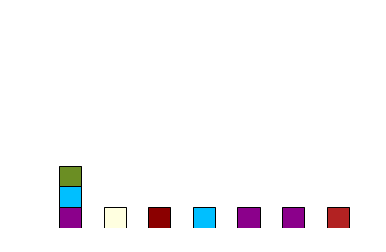

T: No, now you cannot put b1 in the tower because you must put red blocks on blue blocks


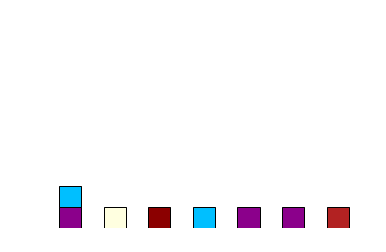

6.374441554606423 [('b0', 'yellow'), ('b1', 'red'), ('b1', 'blue'), ('b2', 'blue'), ('b3', 'red'), ('b3', 'blue'), ('b4', 'red'), ('b4', 'blue'), ('b5', 'red'), ('b6', 'yellow'), ('b7', 'green'), ('b8', 'blue')]
6.497067209564415 [('b0', 'yellow'), ('b1', 'red'), ('b1', 'blue'), ('b2', 'blue'), ('b3', 'red'), ('b3', 'blue'), ('b4', 'red'), ('b4', 'blue'), ('b5', 'red'), ('b6', 'yellow'), ('b7', 'green'), ('b8', 'blue'), ('b2', 'green')]
6.751835800976097 [('b0', 'yellow'), ('b1', 'red'), ('b1', 'blue'), ('b2', 'blue'), ('b3', 'red'), ('b4', 'red'), ('b4', 'blue'), ('b5', 'red'), ('b6', 'yellow'), ('b7', 'green'), ('b8', 'blue')]
6.874461455934089 [('b0', 'yellow'), ('b1', 'red'), ('b1', 'blue'), ('b2', 'blue'), ('b3', 'red'), ('b4', 'red'), ('b4', 'blue'), ('b5', 'red'), ('b6', 'yellow'), ('b7', 'green'), ('b8', 'blue'), ('b2', 'green')]
9.132369599747475 [('b0', 'yellow'), ('b1', 'red'), ('b1', 'blue'), ('b2', 'blue'), ('b3', 'red'), ('b3', 'blue'), ('b4', 'red'), ('b4', 'blue'), ('b5

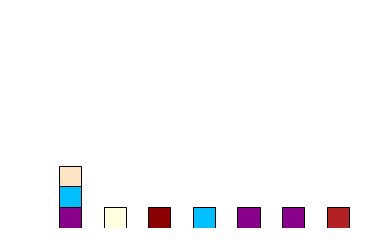

T: No, now you cannot put b1 in the tower because you must put red blocks on blue blocks


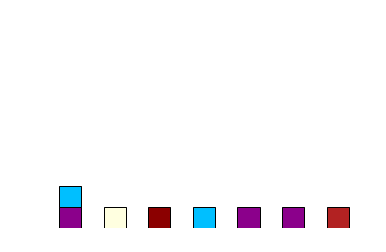

6.374441554606449 [('b0', 'yellow'), ('b1', 'red'), ('b1', 'blue'), ('b2', 'blue'), ('b3', 'red'), ('b3', 'blue'), ('b4', 'red'), ('b4', 'blue'), ('b5', 'red'), ('b6', 'yellow'), ('b7', 'green'), ('b8', 'blue')]
6.497067209564441 [('b0', 'yellow'), ('b1', 'red'), ('b1', 'blue'), ('b2', 'blue'), ('b3', 'red'), ('b3', 'blue'), ('b4', 'red'), ('b4', 'blue'), ('b5', 'red'), ('b6', 'yellow'), ('b7', 'green'), ('b8', 'blue'), ('b2', 'green')]
6.751835800976123 [('b0', 'yellow'), ('b1', 'red'), ('b1', 'blue'), ('b2', 'blue'), ('b3', 'red'), ('b4', 'red'), ('b4', 'blue'), ('b5', 'red'), ('b6', 'yellow'), ('b7', 'green'), ('b8', 'blue')]
6.874461455934115 [('b0', 'yellow'), ('b1', 'red'), ('b1', 'blue'), ('b2', 'blue'), ('b3', 'red'), ('b4', 'red'), ('b4', 'blue'), ('b5', 'red'), ('b6', 'yellow'), ('b7', 'green'), ('b8', 'blue'), ('b2', 'green')]
9.132369599747209 [('b0', 'yellow'), ('b1', 'red'), ('b1', 'blue'), ('b2', 'blue'), ('b3', 'red'), ('b3', 'blue'), ('b4', 'red'), ('b4', 'blue'), ('b5

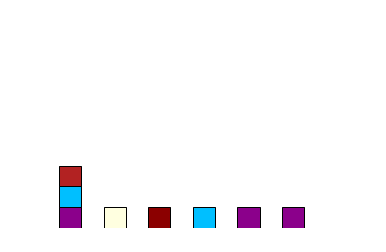

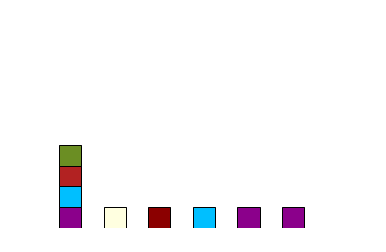

T: No, now you cannot put b0 in the tower because you must put green blocks on yellow blocks


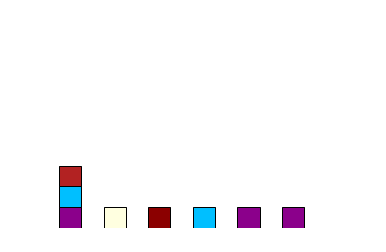

5.63125603885774 [('b0', 'yellow'), ('b1', 'red'), ('b1', 'blue'), ('b2', 'blue'), ('b3', 'red'), ('b3', 'blue'), ('b4', 'red'), ('b4', 'blue'), ('b5', 'red'), ('b6', 'yellow'), ('b7', 'green')]
5.753881297272169 [('b0', 'yellow'), ('b1', 'red'), ('b1', 'blue'), ('b2', 'blue'), ('b3', 'red'), ('b3', 'blue'), ('b4', 'red'), ('b4', 'blue'), ('b5', 'red'), ('b6', 'yellow'), ('b7', 'green'), ('b2', 'green')]
9.40409840191989 [('b0', 'yellow'), ('b1', 'red'), ('b1', 'blue'), ('b2', 'blue'), ('b3', 'red'), ('b3', 'blue'), ('b4', 'red'), ('b4', 'blue'), ('b5', 'red'), ('b7', 'green')]
9.52672366033432 [('b0', 'yellow'), ('b1', 'red'), ('b1', 'blue'), ('b2', 'blue'), ('b3', 'red'), ('b3', 'blue'), ('b4', 'red'), ('b4', 'blue'), ('b5', 'red'), ('b7', 'green'), ('b2', 'green')]
9.781492648289564 [('b0', 'yellow'), ('b1', 'red'), ('b1', 'blue'), ('b2', 'blue'), ('b3', 'red'), ('b4', 'red'), ('b4', 'blue'), ('b5', 'red'), ('b7', 'green')]
9.868082069890738 [('b0', 'yellow'), ('b1', 'red'), ('b1', 

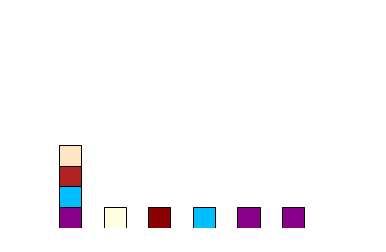

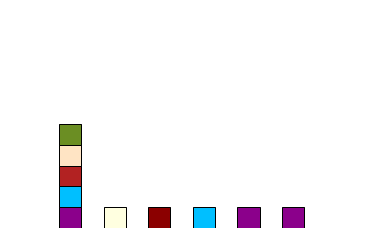

T: No, now you cannot put b0 in the tower because you must put green blocks on yellow blocks


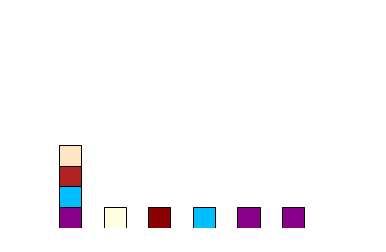

5.173043931063174 [('b0', 'yellow'), ('b1', 'red'), ('b1', 'blue'), ('b2', 'blue'), ('b3', 'red'), ('b3', 'blue'), ('b4', 'red'), ('b4', 'blue'), ('b6', 'yellow'), ('b7', 'green')]
5.295669189477604 [('b0', 'yellow'), ('b1', 'red'), ('b1', 'blue'), ('b2', 'blue'), ('b3', 'red'), ('b3', 'blue'), ('b4', 'red'), ('b4', 'blue'), ('b6', 'yellow'), ('b7', 'green'), ('b2', 'green')]
5.550438177432848 [('b0', 'yellow'), ('b1', 'red'), ('b1', 'blue'), ('b2', 'blue'), ('b3', 'red'), ('b4', 'red'), ('b4', 'blue'), ('b6', 'yellow'), ('b7', 'green')]
5.673063435847277 [('b0', 'yellow'), ('b1', 'red'), ('b1', 'blue'), ('b2', 'blue'), ('b3', 'red'), ('b4', 'red'), ('b4', 'blue'), ('b6', 'yellow'), ('b7', 'green'), ('b2', 'green')]


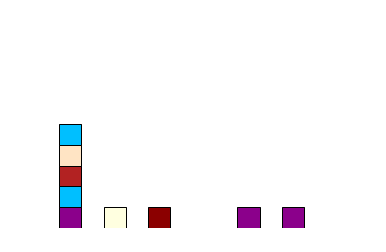

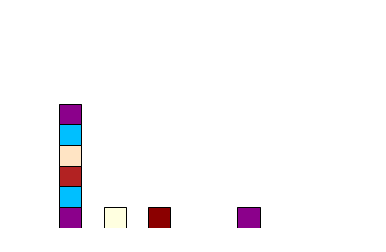

T: No, now you cannot put b1 in the tower because you must put red blocks on blue blocks


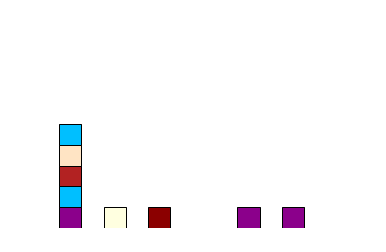

5.020584311871932 [('b0', 'yellow'), ('b1', 'red'), ('b1', 'blue'), ('b2', 'blue'), ('b3', 'red'), ('b3', 'blue'), ('b4', 'red'), ('b4', 'blue'), ('b7', 'green')]
5.061975926175961 [('b0', 'yellow'), ('b1', 'red'), ('b1', 'blue'), ('b2', 'blue'), ('b3', 'red'), ('b4', 'red'), ('b4', 'blue'), ('b7', 'green')]


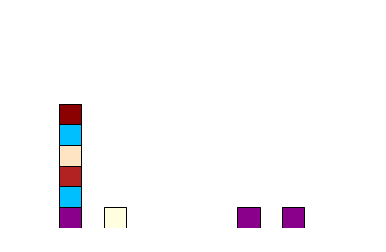

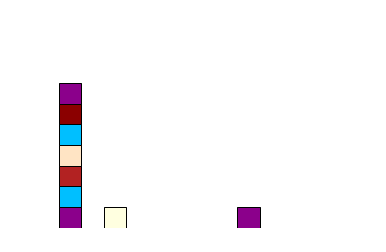

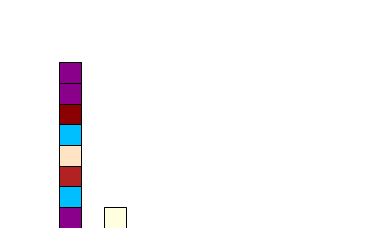

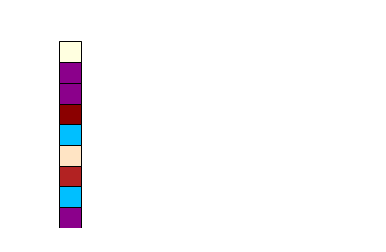

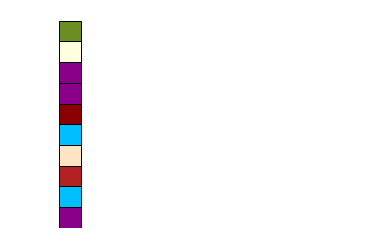

Parsing domain blocks-domain.pddl
Parsing problem tworules/problem43.pddl
6.973275232543957 [('b0', 'green'), ('b0', 'yellow'), ('b1', 'blue'), ('b2', 'red'), ('b2', 'blue'), ('b3', 'blue'), ('b4', 'green'), ('b4', 'yellow'), ('b5', 'red'), ('b5', 'blue'), ('b6', 'green'), ('b6', 'blue'), ('b7', 'blue'), ('b8', 'blue'), ('b9', 'green')]
7.0263481957518845 [('b0', 'green'), ('b0', 'yellow'), ('b1', 'blue'), ('b2', 'red'), ('b3', 'blue'), ('b4', 'green'), ('b4', 'yellow'), ('b5', 'red'), ('b5', 'blue'), ('b6', 'green'), ('b6', 'blue'), ('b7', 'blue'), ('b8', 'blue'), ('b9', 'green')]
7.19587949011851 [('b0', 'green'), ('b0', 'yellow'), ('b1', 'blue'), ('b2', 'red'), ('b3', 'blue'), ('b4', 'green'), ('b4', 'yellow'), ('b5', 'red'), ('b5', 'blue'), ('b6', 'green'), ('b7', 'blue'), ('b8', 'blue'), ('b9', 'green')]
7.6812895358978714 [('b0', 'green'), ('b0', 'yellow'), ('b1', 'blue'), ('b2', 'red'), ('b3', 'blue'), ('b4', 'green'), ('b4', 'yellow'), ('b5', 'red'), ('b6', 'green'), ('b7', 'bl

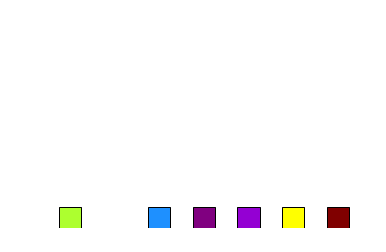

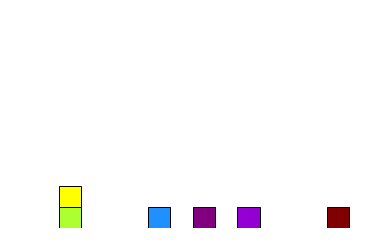

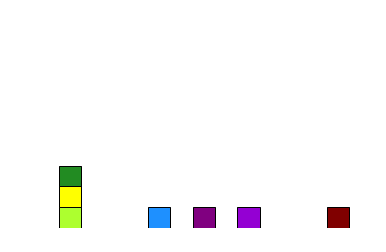

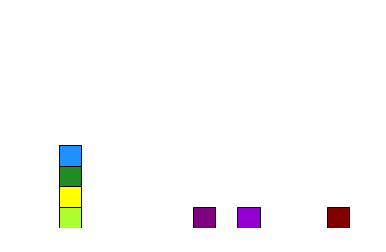

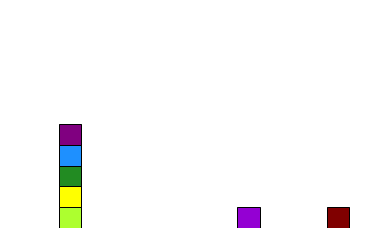

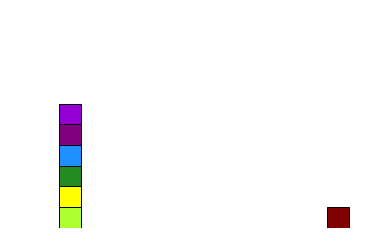

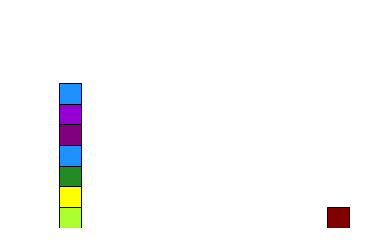

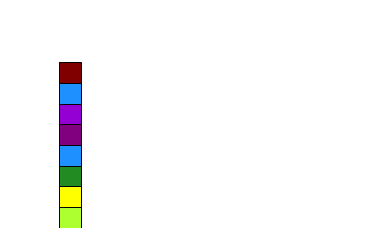

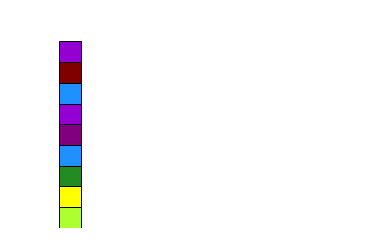

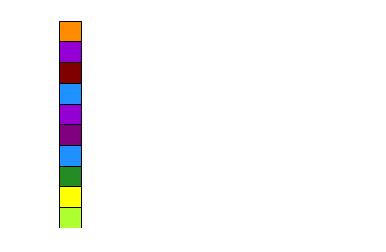

Parsing domain blocks-domain.pddl
Parsing problem tworules/problem44.pddl
5.772939023833742 [('b0', 'blue'), ('b2', 'yellow'), ('b3', 'yellow'), ('b4', 'green'), ('b4', 'blue'), ('b5', 'green'), ('b6', 'red'), ('b6', 'blue'), ('b7', 'green'), ('b7', 'yellow'), ('b8', 'yellow'), ('b9', 'red')]
5.82601198704167 [('b0', 'blue'), ('b2', 'yellow'), ('b3', 'yellow'), ('b4', 'green'), ('b4', 'blue'), ('b5', 'green'), ('b6', 'red'), ('b7', 'green'), ('b7', 'yellow'), ('b8', 'yellow'), ('b9', 'red')]
5.948727137179876 [('b0', 'blue'), ('b2', 'yellow'), ('b3', 'yellow'), ('b4', 'green'), ('b4', 'blue'), ('b5', 'green'), ('b6', 'red'), ('b6', 'blue'), ('b7', 'green'), ('b8', 'yellow'), ('b9', 'red')]
6.001800100387804 [('b0', 'blue'), ('b2', 'yellow'), ('b3', 'yellow'), ('b4', 'green'), ('b4', 'blue'), ('b5', 'green'), ('b6', 'red'), ('b7', 'green'), ('b8', 'yellow'), ('b9', 'red')]


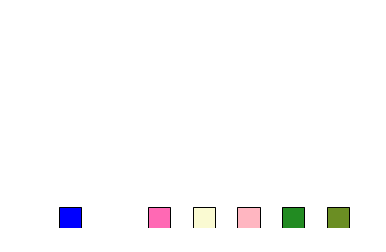

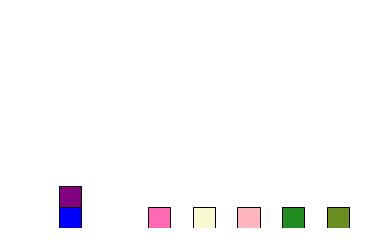

T: No, now you cannot put b9 in the tower because you must put red blocks on blue blocks


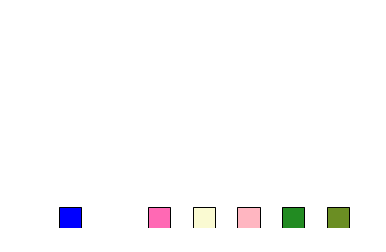

5.739139126622742 [('b0', 'blue'), ('b2', 'yellow'), ('b3', 'yellow'), ('b4', 'green'), ('b4', 'blue'), ('b5', 'green'), ('b6', 'red'), ('b7', 'green'), ('b7', 'yellow'), ('b8', 'yellow'), ('b9', 'red')]
5.914927239968876 [('b0', 'blue'), ('b2', 'yellow'), ('b3', 'yellow'), ('b4', 'green'), ('b4', 'blue'), ('b5', 'green'), ('b6', 'red'), ('b7', 'green'), ('b8', 'yellow'), ('b9', 'red')]


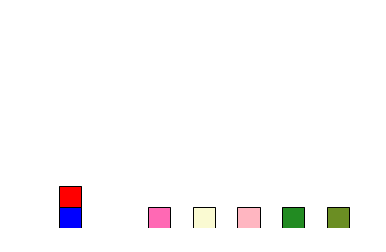

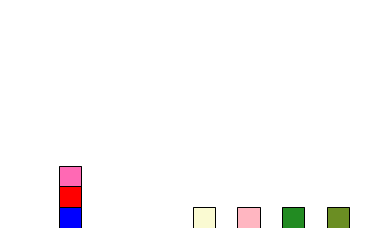

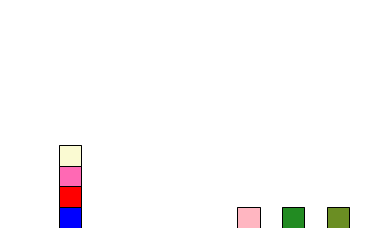

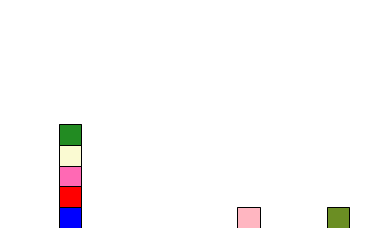

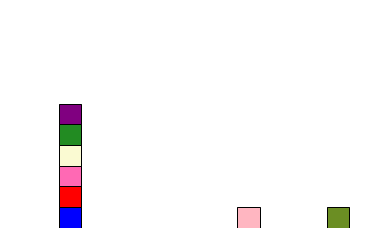

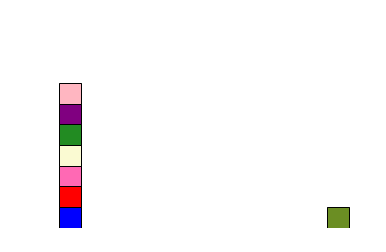

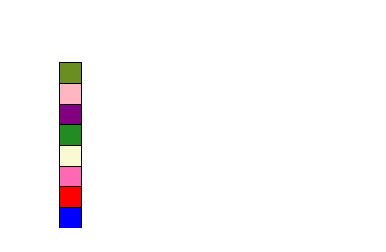

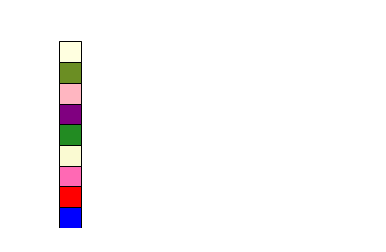

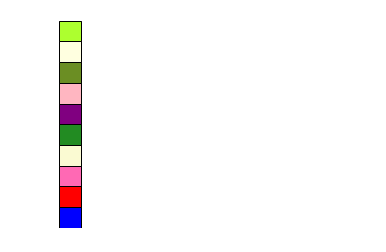

Parsing domain blocks-domain.pddl
Parsing problem tworules/problem45.pddl
6.75246967321825 [('b0', 'yellow'), ('b2', 'red'), ('b4', 'yellow'), ('b5', 'green'), ('b5', 'yellow'), ('b6', 'blue'), ('b7', 'yellow'), ('b8', 'blue')]
6.928257786564384 [('b0', 'yellow'), ('b2', 'red'), ('b4', 'yellow'), ('b5', 'green'), ('b6', 'blue'), ('b7', 'yellow'), ('b8', 'blue')]
7.004394038760515 [('b0', 'yellow'), ('b2', 'red'), ('b4', 'yellow'), ('b5', 'green'), ('b5', 'yellow'), ('b6', 'blue'), ('b7', 'yellow'), ('b8', 'blue'), ('b6', 'green')]
7.180182152106649 [('b0', 'yellow'), ('b2', 'red'), ('b4', 'yellow'), ('b5', 'green'), ('b6', 'blue'), ('b7', 'yellow'), ('b8', 'blue'), ('b6', 'green')]
7.256318404302781 [('b0', 'yellow'), ('b2', 'red'), ('b4', 'yellow'), ('b5', 'green'), ('b5', 'yellow'), ('b6', 'blue'), ('b7', 'yellow'), ('b8', 'blue'), ('b6', 'green'), ('b8', 'green')]
7.432106517648915 [('b0', 'yellow'), ('b2', 'red'), ('b4', 'yellow'), ('b5', 'green'), ('b6', 'blue'), ('b7', 'yellow'),

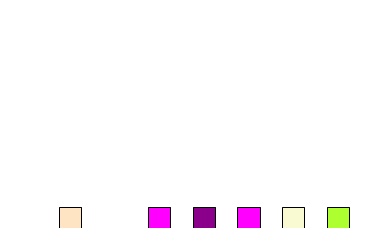

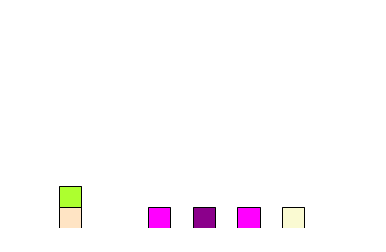

T: No, now you cannot put b4 in the tower because you must put green blocks on yellow blocks


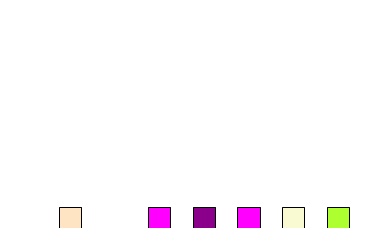

6.293899065273482 [('b0', 'yellow'), ('b2', 'red'), ('b4', 'yellow'), ('b5', 'green'), ('b5', 'yellow'), ('b6', 'blue'), ('b7', 'yellow'), ('b8', 'blue')]
6.386201080971343 [('b0', 'yellow'), ('b2', 'red'), ('b4', 'yellow'), ('b5', 'green'), ('b6', 'blue'), ('b7', 'yellow'), ('b8', 'blue')]
6.701948646942604 [('b0', 'yellow'), ('b2', 'red'), ('b4', 'yellow'), ('b5', 'green'), ('b5', 'yellow'), ('b6', 'blue'), ('b7', 'yellow'), ('b8', 'blue'), ('b4', 'green')]
6.794250662640465 [('b0', 'yellow'), ('b2', 'red'), ('b4', 'yellow'), ('b5', 'green'), ('b6', 'blue'), ('b7', 'yellow'), ('b8', 'blue'), ('b4', 'green')]
7.403153955455815 [('b0', 'yellow'), ('b2', 'red'), ('b4', 'yellow'), ('b5', 'green'), ('b5', 'yellow'), ('b6', 'blue'), ('b7', 'yellow'), ('b8', 'blue'), ('b4', 'green'), ('b6', 'green')]
7.4954559711536755 [('b0', 'yellow'), ('b2', 'red'), ('b4', 'yellow'), ('b5', 'green'), ('b6', 'blue'), ('b7', 'yellow'), ('b8', 'blue'), ('b4', 'green'), ('b6', 'green')]
7.500646175979098 [('

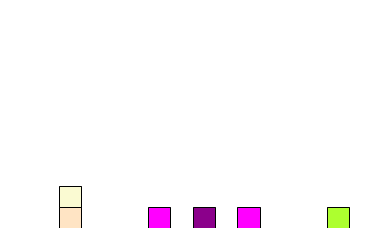

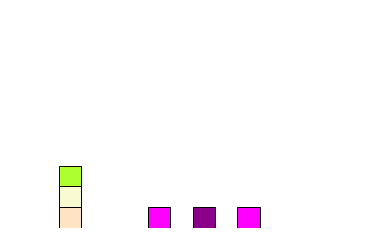

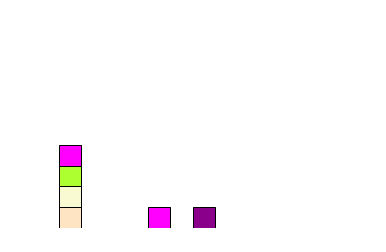

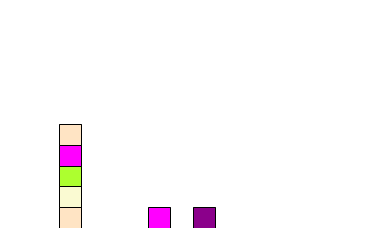

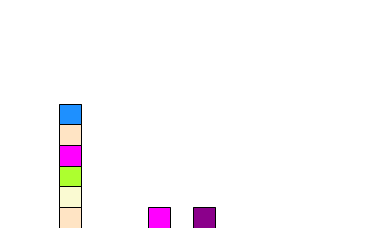

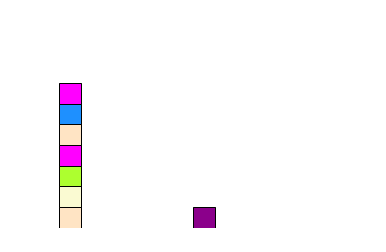

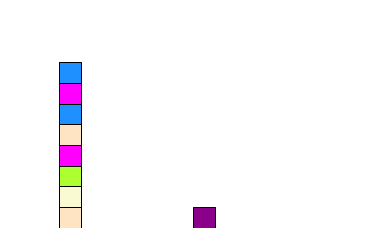

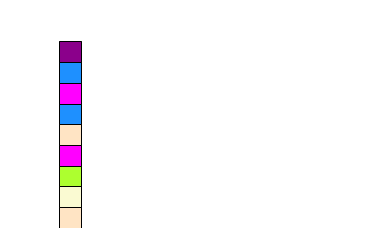

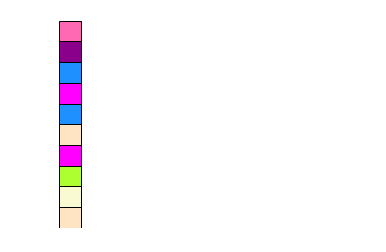

Parsing domain blocks-domain.pddl
Parsing problem tworules/problem46.pddl
6.339841006272417 [('b0', 'green'), ('b0', 'yellow'), ('b1', 'green'), ('b2', 'red'), ('b2', 'blue'), ('b3', 'green'), ('b3', 'blue'), ('b4', 'yellow'), ('b5', 'blue'), ('b6', 'blue'), ('b7', 'green'), ('b7', 'yellow'), ('b8', 'green'), ('b8', 'blue'), ('b9', 'yellow')]
6.741489285325539 [('b0', 'green'), ('b0', 'yellow'), ('b1', 'green'), ('b2', 'red'), ('b3', 'green'), ('b3', 'blue'), ('b4', 'yellow'), ('b5', 'blue'), ('b6', 'blue'), ('b7', 'green'), ('b7', 'yellow'), ('b8', 'green'), ('b8', 'blue'), ('b9', 'yellow')]
7.2376617479858005 [('b0', 'green'), ('b0', 'yellow'), ('b1', 'green'), ('b2', 'red'), ('b2', 'blue'), ('b3', 'green'), ('b3', 'blue'), ('b4', 'yellow'), ('b5', 'blue'), ('b6', 'blue'), ('b7', 'green'), ('b7', 'yellow'), ('b8', 'green'), ('b8', 'blue'), ('b9', 'yellow'), ('b5', 'red')]
7.265037806936708 [('b0', 'green'), ('b0', 'yellow'), ('b1', 'green'), ('b2', 'red'), ('b3', 'green'), ('b4', 'ye

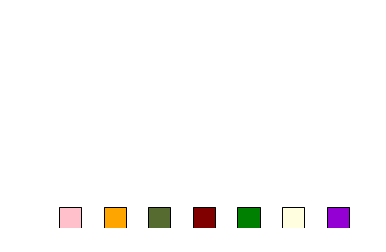

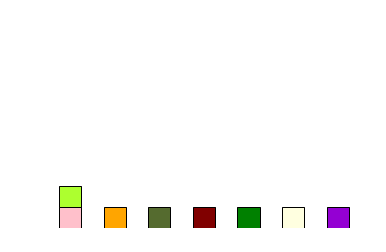

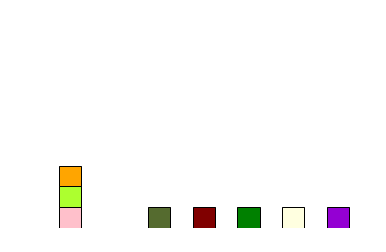

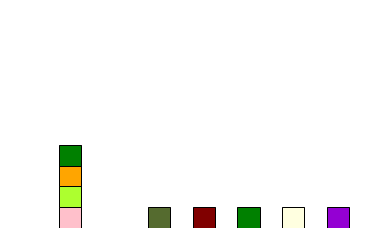

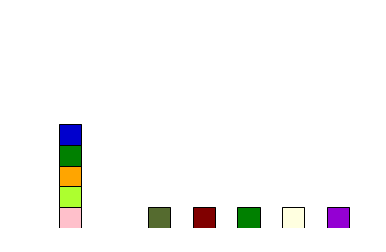

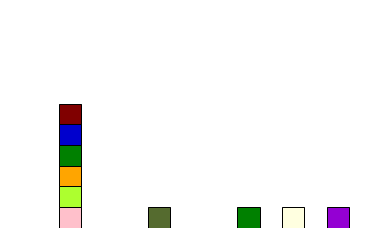

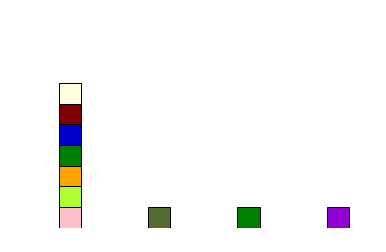

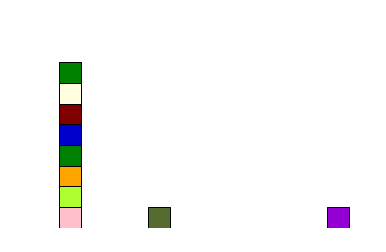

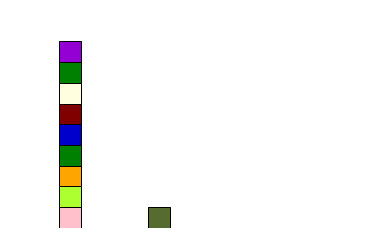

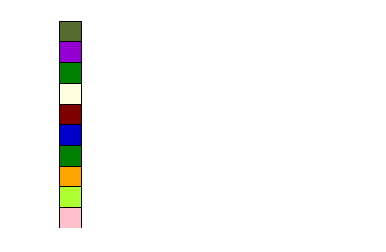

Parsing domain blocks-domain.pddl
Parsing problem tworules/problem47.pddl
5.252004043878922 [('b0', 'blue'), ('b1', 'red'), ('b2', 'green'), ('b3', 'blue'), ('b4', 'blue'), ('b5', 'green'), ('b6', 'green'), ('b7', 'yellow'), ('b8', 'blue'), ('b9', 'red'), ('b9', 'blue')]
5.653652322932044 [('b0', 'blue'), ('b1', 'red'), ('b2', 'green'), ('b3', 'blue'), ('b4', 'blue'), ('b5', 'green'), ('b6', 'green'), ('b7', 'yellow'), ('b8', 'blue'), ('b9', 'red')]
6.149824785592306 [('b0', 'blue'), ('b1', 'red'), ('b2', 'green'), ('b3', 'blue'), ('b4', 'blue'), ('b5', 'green'), ('b6', 'green'), ('b7', 'yellow'), ('b8', 'blue'), ('b9', 'red'), ('b9', 'blue'), ('b3', 'red')]
6.551473064645427 [('b0', 'blue'), ('b1', 'red'), ('b2', 'green'), ('b3', 'blue'), ('b4', 'blue'), ('b5', 'green'), ('b6', 'green'), ('b7', 'yellow'), ('b8', 'blue'), ('b9', 'red'), ('b3', 'red')]
6.631048829000992 [('b1', 'red'), ('b2', 'green'), ('b3', 'blue'), ('b4', 'blue'), ('b5', 'green'), ('b6', 'green'), ('b7', 'yellow'), (

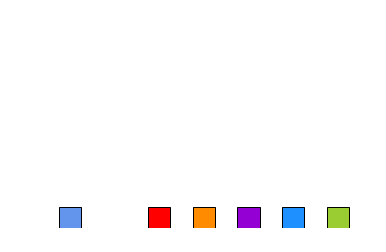

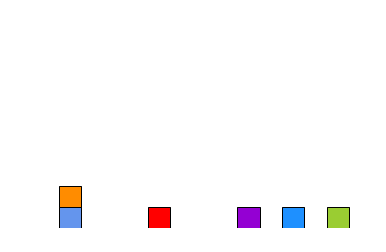

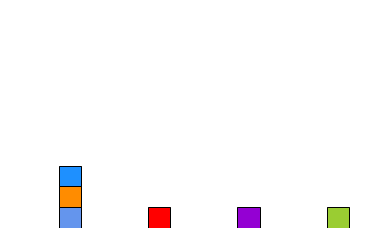

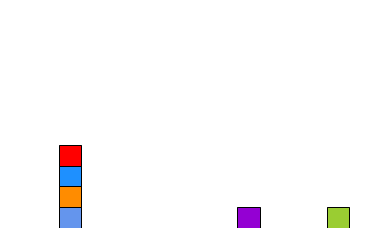

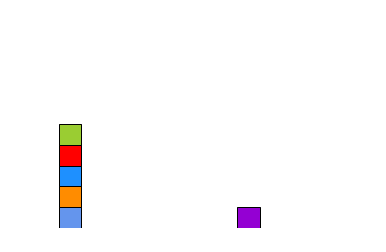

T: No, now you cannot put b7 in the tower because you must put green blocks on yellow blocks


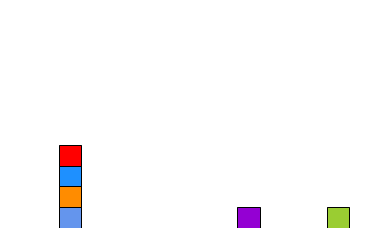

3.2386798503303904 [('b1', 'red'), ('b3', 'blue'), ('b5', 'green'), ('b6', 'green'), ('b7', 'yellow'), ('b8', 'blue'), ('b9', 'red'), ('b9', 'blue')]
3.640328129383512 [('b1', 'red'), ('b3', 'blue'), ('b5', 'green'), ('b6', 'green'), ('b7', 'yellow'), ('b8', 'blue'), ('b9', 'red')]
4.136500592043774 [('b1', 'red'), ('b3', 'blue'), ('b5', 'green'), ('b6', 'green'), ('b7', 'yellow'), ('b8', 'blue'), ('b9', 'red'), ('b9', 'blue'), ('b3', 'red')]
4.538148871096896 [('b1', 'red'), ('b3', 'blue'), ('b5', 'green'), ('b6', 'green'), ('b7', 'yellow'), ('b8', 'blue'), ('b9', 'red'), ('b3', 'red')]
4.797022712265537 [('b1', 'red'), ('b3', 'blue'), ('b5', 'green'), ('b6', 'green'), ('b7', 'yellow'), ('b8', 'blue'), ('b9', 'red'), ('b9', 'blue'), ('b3', 'red'), ('b7', 'green')]
4.952395383533373 [('b1', 'red'), ('b3', 'blue'), ('b5', 'green'), ('b7', 'yellow'), ('b8', 'blue'), ('b9', 'red'), ('b9', 'blue'), ('b3', 'red')]
5.435791685628368 [('b1', 'red'), ('b3', 'blue'), ('b5', 'green'), ('b6', 'gr

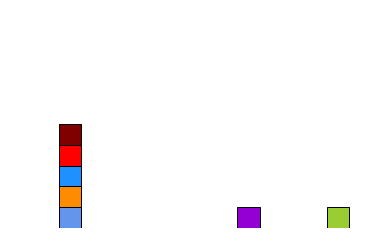

(forall (?x) (or (not (red ?x)) (exists (?y) (and (blue ?y) (on ?x ?y)))))
T: no, put red blocks on blue blocks


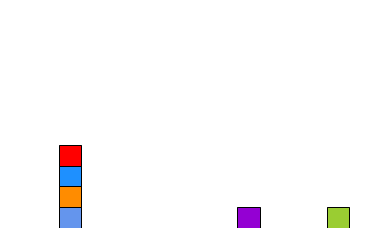

3.2228589006513326 [('b1', 'red'), ('b3', 'blue'), ('b5', 'green'), ('b6', 'green'), ('b7', 'yellow'), ('b8', 'blue'), ('b9', 'red'), ('b9', 'blue')]
3.6245071797044544 [('b1', 'red'), ('b3', 'blue'), ('b5', 'green'), ('b6', 'green'), ('b7', 'yellow'), ('b8', 'blue'), ('b9', 'red')]
4.138956947893853 [('b1', 'red'), ('b3', 'blue'), ('b5', 'green'), ('b6', 'green'), ('b7', 'yellow'), ('b8', 'blue'), ('b9', 'red'), ('b9', 'blue'), ('b3', 'red')]
4.540605226946974 [('b1', 'red'), ('b3', 'blue'), ('b5', 'green'), ('b6', 'green'), ('b7', 'yellow'), ('b8', 'blue'), ('b9', 'red'), ('b3', 'red')]
4.799479068115616 [('b1', 'red'), ('b3', 'blue'), ('b5', 'green'), ('b6', 'green'), ('b7', 'yellow'), ('b8', 'blue'), ('b9', 'red'), ('b9', 'blue'), ('b3', 'red'), ('b7', 'green')]
4.954851739383452 [('b1', 'red'), ('b3', 'blue'), ('b5', 'green'), ('b7', 'yellow'), ('b8', 'blue'), ('b9', 'red'), ('b9', 'blue'), ('b3', 'red')]
5.438248041478447 [('b1', 'red'), ('b3', 'blue'), ('b5', 'green'), ('b6', 'g

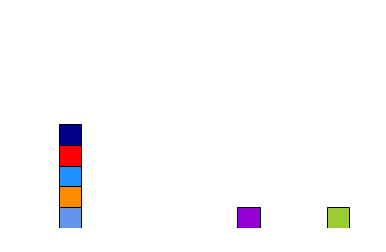

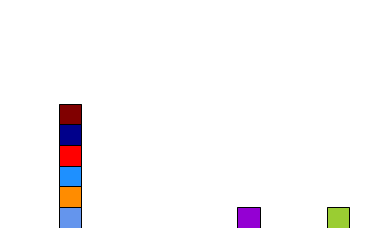

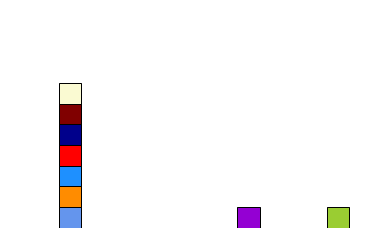

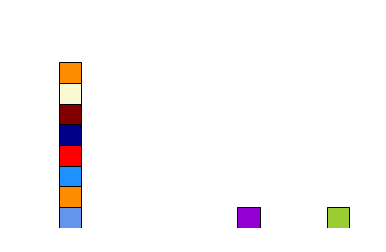

(forall (?y) (or (not (yellow ?y)) (exists (?x) (and (green ?x) (on ?x ?y)))))
T: no, put green blocks on yellow blocks


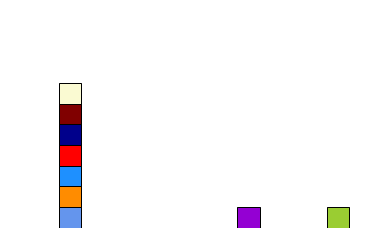

2.3115099259380347 [('b3', 'blue'), ('b5', 'green'), ('b6', 'green'), ('b7', 'yellow')]
3.2276079731805547 [('b3', 'blue'), ('b5', 'green'), ('b6', 'green'), ('b7', 'yellow'), ('b3', 'red')]
3.4489855037568216 [('b5', 'green'), ('b6', 'green'), ('b7', 'yellow')]


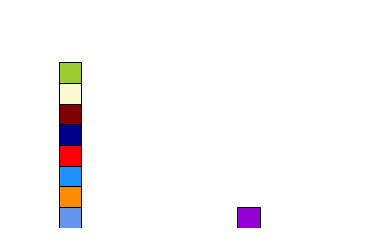

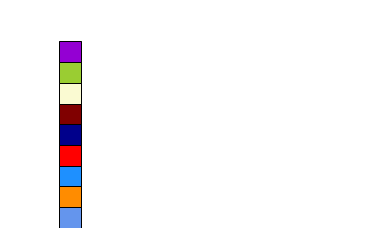

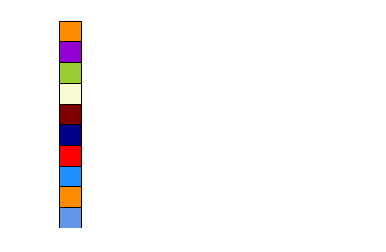

Parsing domain blocks-domain.pddl
Parsing problem tworules/problem48.pddl
6.391806778263445 [('b0', 'blue'), ('b1', 'green'), ('b1', 'blue'), ('b2', 'green'), ('b3', 'yellow'), ('b5', 'blue'), ('b6', 'yellow'), ('b7', 'yellow'), ('b9', 'green'), ('b9', 'blue')]
6.696546227145589 [('b0', 'blue'), ('b1', 'green'), ('b1', 'blue'), ('b2', 'green'), ('b3', 'yellow'), ('b6', 'yellow'), ('b7', 'yellow'), ('b9', 'green'), ('b9', 'blue')]
7.170679291199847 [('b0', 'blue'), ('b1', 'green'), ('b1', 'blue'), ('b2', 'green'), ('b3', 'yellow'), ('b5', 'blue'), ('b6', 'yellow'), ('b7', 'yellow'), ('b9', 'green'), ('b9', 'blue'), ('b5', 'red')]
7.220094748756758 [('b0', 'blue'), ('b1', 'green'), ('b2', 'green'), ('b3', 'yellow'), ('b6', 'yellow'), ('b7', 'yellow'), ('b9', 'green'), ('b9', 'blue')]
7.475418740081992 [('b0', 'blue'), ('b1', 'green'), ('b1', 'blue'), ('b2', 'green'), ('b3', 'yellow'), ('b6', 'yellow'), ('b7', 'yellow'), ('b9', 'green'), ('b9', 'blue'), ('b5', 'red')]
7.743643270367928 [(

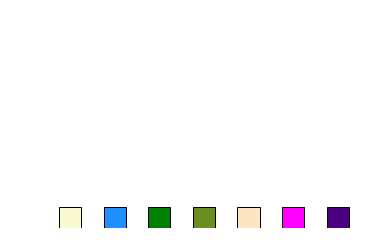

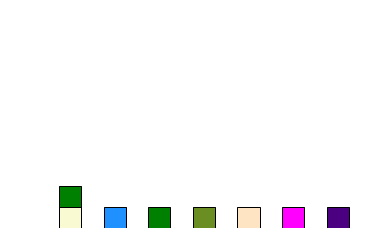

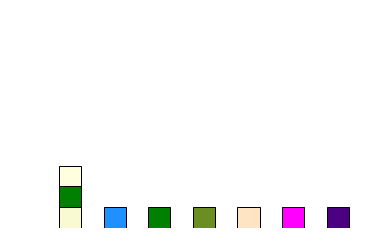

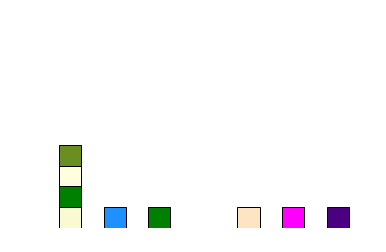

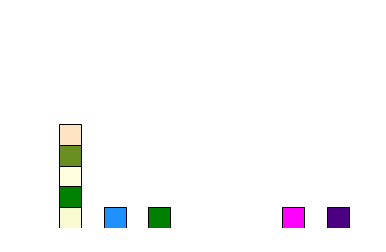

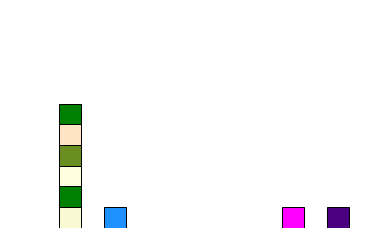

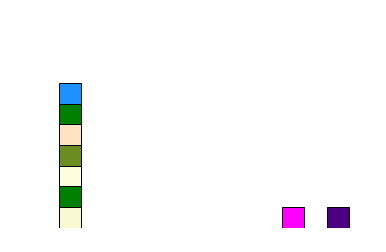

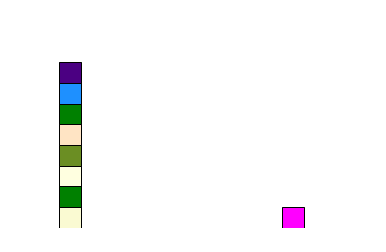

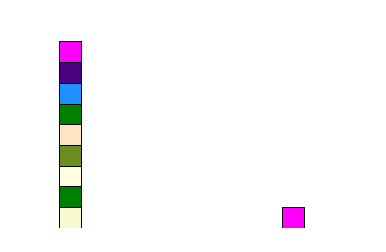

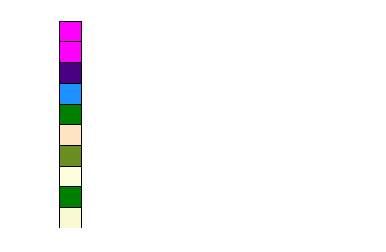

Parsing domain blocks-domain.pddl
Parsing problem tworules/problem49.pddl
5.466619527715752 [('b0', 'yellow'), ('b1', 'green'), ('b1', 'yellow'), ('b3', 'green'), ('b3', 'yellow'), ('b4', 'blue'), ('b6', 'yellow'), ('b7', 'green'), ('b7', 'blue'), ('b8', 'blue'), ('b9', 'green')]
5.48576515359283 [('b0', 'yellow'), ('b1', 'green'), ('b1', 'yellow'), ('b3', 'green'), ('b3', 'yellow'), ('b4', 'blue'), ('b6', 'yellow'), ('b7', 'green'), ('b8', 'blue'), ('b9', 'green')]
6.291569138322507 [('b0', 'yellow'), ('b1', 'green'), ('b1', 'yellow'), ('b3', 'green'), ('b3', 'yellow'), ('b4', 'blue'), ('b6', 'yellow'), ('b7', 'green'), ('b9', 'green')]
6.725281245557337 [('b0', 'yellow'), ('b1', 'green'), ('b1', 'yellow'), ('b3', 'green'), ('b3', 'yellow'), ('b4', 'blue'), ('b6', 'yellow'), ('b7', 'green'), ('b7', 'blue'), ('b8', 'blue'), ('b9', 'green'), ('b9', 'red')]
6.744426871434415 [('b0', 'yellow'), ('b1', 'green'), ('b1', 'yellow'), ('b3', 'green'), ('b3', 'yellow'), ('b4', 'blue'), ('b6', 'y

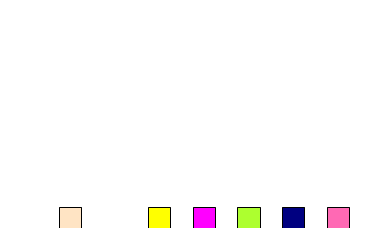

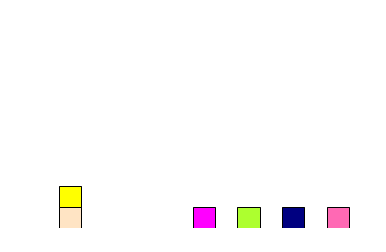

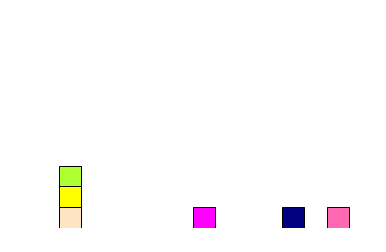

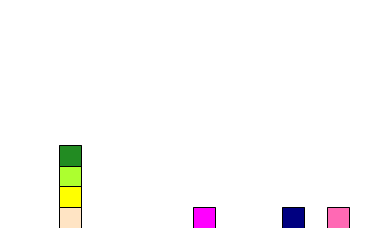

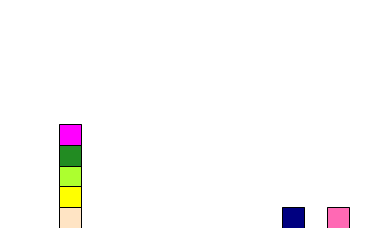

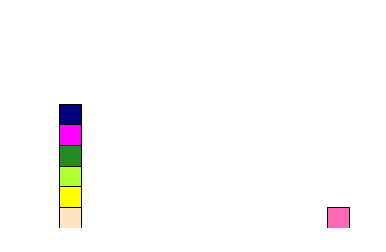

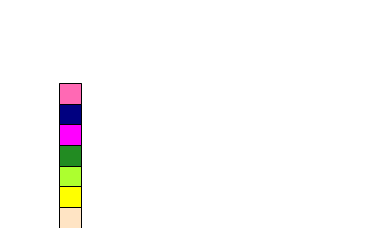

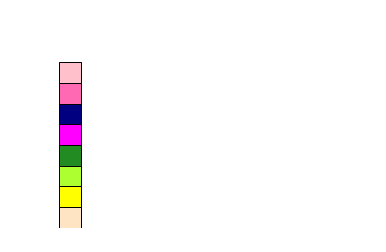

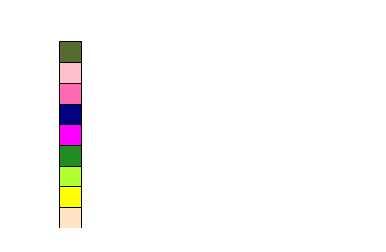

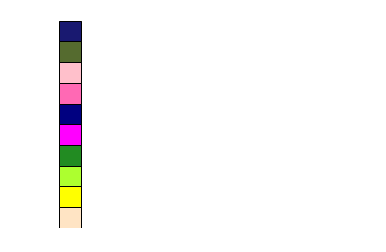

Parsing domain blocks-domain.pddl
Parsing problem tworules/problem5.pddl
6.795127591249024 [('b0', 'blue'), ('b1', 'blue'), ('b3', 'red'), ('b4', 'green'), ('b4', 'yellow'), ('b5', 'green'), ('b5', 'blue'), ('b6', 'green'), ('b6', 'yellow'), ('b7', 'green'), ('b7', 'blue'), ('b8', 'green'), ('b8', 'yellow'), ('b9', 'blue')]
6.834644927055477 [('b0', 'blue'), ('b3', 'red'), ('b4', 'green'), ('b4', 'yellow'), ('b5', 'green'), ('b5', 'blue'), ('b6', 'green'), ('b6', 'yellow'), ('b7', 'green'), ('b7', 'blue'), ('b8', 'green'), ('b8', 'yellow'), ('b9', 'blue')]
7.13938437593762 [('b3', 'red'), ('b4', 'green'), ('b4', 'yellow'), ('b5', 'green'), ('b5', 'blue'), ('b6', 'green'), ('b6', 'yellow'), ('b7', 'green'), ('b7', 'blue'), ('b8', 'green'), ('b8', 'yellow'), ('b9', 'blue')]
7.574000104185426 [('b0', 'blue'), ('b1', 'blue'), ('b3', 'red'), ('b4', 'green'), ('b4', 'yellow'), ('b5', 'green'), ('b5', 'blue'), ('b6', 'green'), ('b6', 'yellow'), ('b7', 'green'), ('b7', 'blue'), ('b8', 'green')

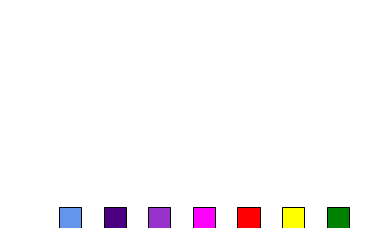

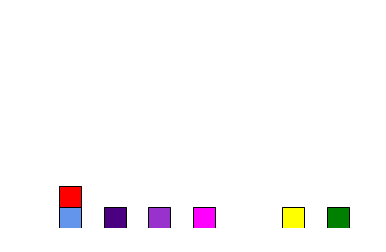

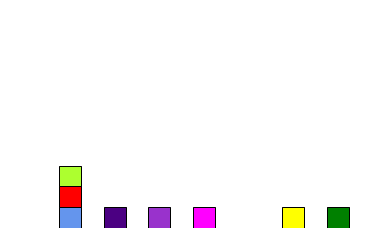

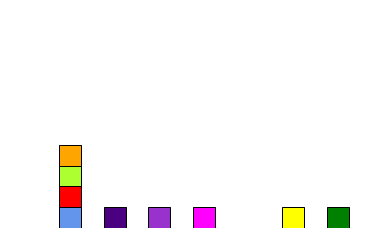

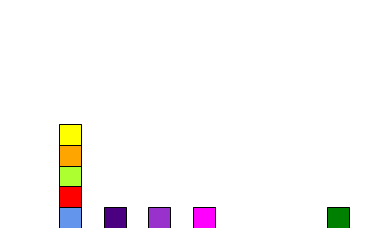

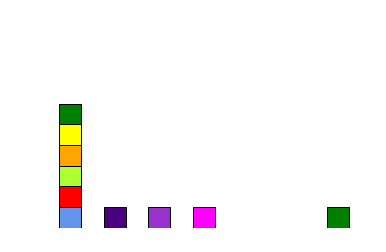

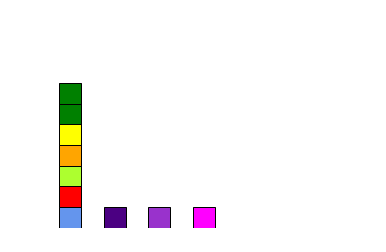

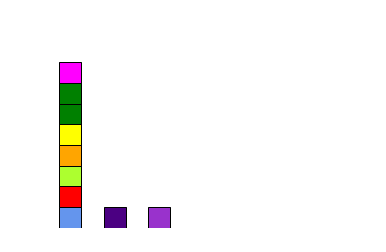

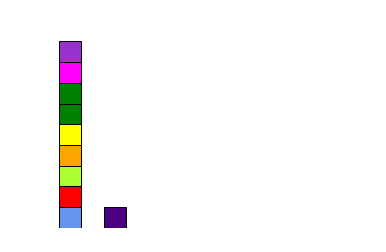

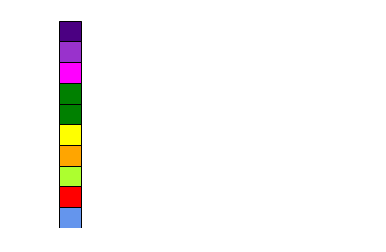

Parsing domain blocks-domain.pddl
Parsing problem tworules/problem50.pddl
5.074231377937676 [('b0', 'blue'), ('b1', 'green'), ('b1', 'yellow'), ('b2', 'blue'), ('b3', 'green'), ('b3', 'blue'), ('b4', 'green'), ('b4', 'yellow'), ('b5', 'blue'), ('b7', 'red'), ('b8', 'blue'), ('b9', 'blue')]
5.113748713744129 [('b0', 'blue'), ('b1', 'green'), ('b1', 'yellow'), ('b2', 'blue'), ('b3', 'green'), ('b3', 'blue'), ('b4', 'green'), ('b4', 'yellow'), ('b5', 'blue'), ('b7', 'red'), ('b8', 'blue')]
5.637297235355298 [('b0', 'blue'), ('b1', 'green'), ('b1', 'yellow'), ('b2', 'blue'), ('b3', 'green'), ('b4', 'green'), ('b4', 'yellow'), ('b5', 'blue'), ('b7', 'red'), ('b8', 'blue')]
6.56788732379729 [('b0', 'blue'), ('b1', 'green'), ('b1', 'yellow'), ('b2', 'blue'), ('b3', 'green'), ('b3', 'blue'), ('b4', 'green'), ('b4', 'yellow'), ('b5', 'blue'), ('b7', 'red'), ('b8', 'blue'), ('b9', 'blue'), ('b9', 'red')]
6.5982444353941645 [('b0', 'blue'), ('b1', 'green'), ('b1', 'yellow'), ('b3', 'green'), ('b4

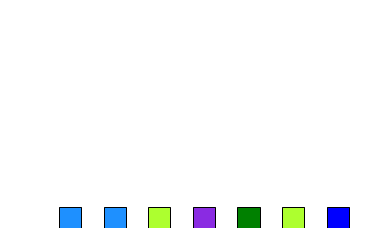

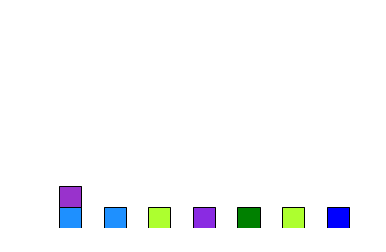

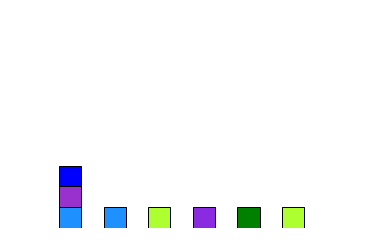

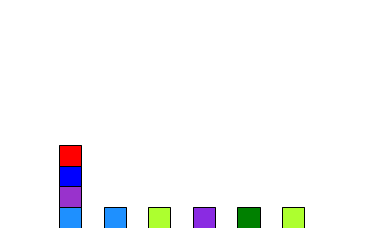

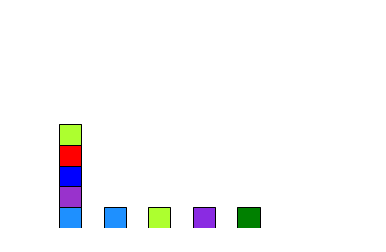

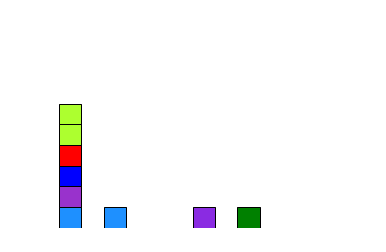

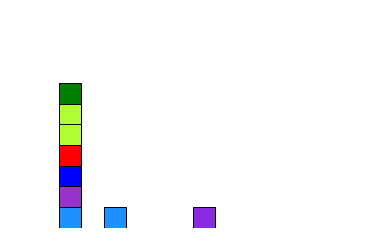

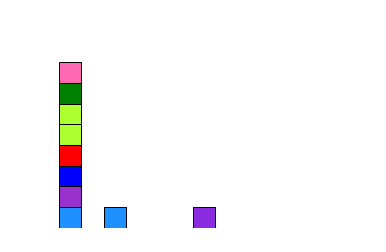

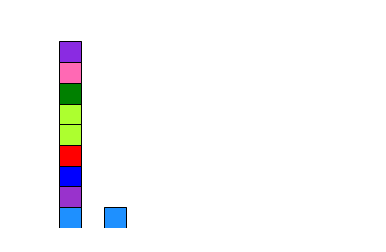

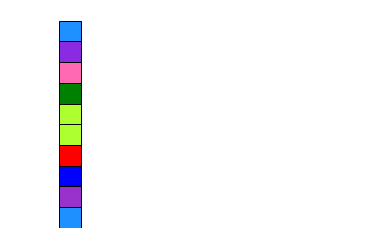

Parsing domain blocks-domain.pddl
Parsing problem tworules/problem6.pddl
4.7607628664428745 [('b0', 'yellow'), ('b2', 'green'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'yellow'), ('b6', 'blue'), ('b7', 'yellow'), ('b8', 'blue'), ('b9', 'green')]
5.083028976910654 [('b0', 'yellow'), ('b2', 'green'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'yellow'), ('b6', 'blue'), ('b7', 'yellow'), ('b8', 'blue'), ('b9', 'green'), ('b1', 'green')]
5.644369735820327 [('b0', 'yellow'), ('b2', 'green'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'yellow'), ('b6', 'blue'), ('b7', 'yellow'), ('b8', 'blue'), ('b9', 'green'), ('b1', 'green'), ('b0', 'green')]
5.738159372511823 [('b0', 'yellow'), ('b2', 'green'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'yellow'), ('b6', 'blue'), ('b7', 'yellow'), ('b9', 'green')]
6.0604254829796025 [('b0', 'yellow'), ('b2', 'green'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'yellow'), ('b6', 'blue'), ('b7', 'yellow'), ('b9', 'green'), ('b1', 'green')]
6.582860027251453 [('b0'

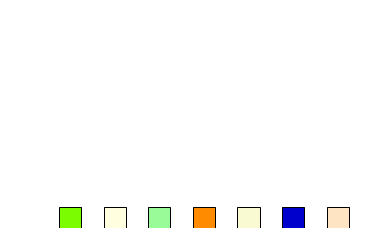

T: No, now you cannot put b0 in the tower because you must put green blocks on yellow blocks


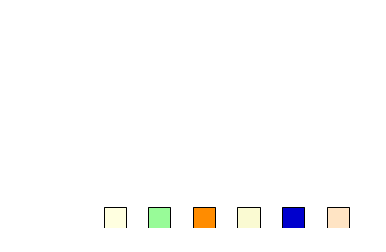

4.582293677477248 [('b0', 'yellow'), ('b2', 'green'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'yellow'), ('b6', 'blue'), ('b7', 'yellow'), ('b8', 'blue'), ('b9', 'green')]
4.874809595844703 [('b0', 'yellow'), ('b2', 'green'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'yellow'), ('b6', 'blue'), ('b7', 'yellow'), ('b8', 'blue'), ('b9', 'green'), ('b1', 'green')]
5.559690183546196 [('b0', 'yellow'), ('b2', 'green'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'yellow'), ('b6', 'blue'), ('b7', 'yellow'), ('b9', 'green')]
5.560072053277604 [('b0', 'yellow'), ('b2', 'green'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'yellow'), ('b6', 'blue'), ('b7', 'yellow'), ('b8', 'blue'), ('b9', 'green'), ('b1', 'green'), ('b0', 'green')]
5.8522061019136515 [('b0', 'yellow'), ('b2', 'green'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'yellow'), ('b6', 'blue'), ('b7', 'yellow'), ('b9', 'green'), ('b1', 'green')]
6.404390838285826 [('b0', 'yellow'), ('b2', 'green'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'ye

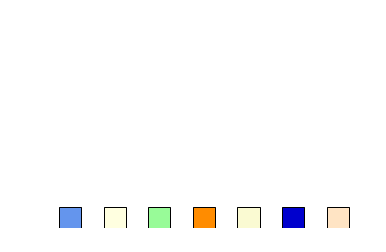

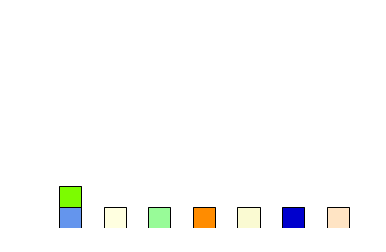

T: No, now you cannot put b0 in the tower because you must put green blocks on yellow blocks


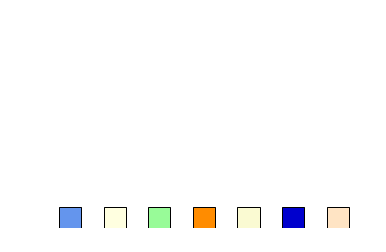

4.582293677477248 [('b0', 'yellow'), ('b2', 'green'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'yellow'), ('b6', 'blue'), ('b7', 'yellow'), ('b8', 'blue'), ('b9', 'green')]
4.874809595844703 [('b0', 'yellow'), ('b2', 'green'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'yellow'), ('b6', 'blue'), ('b7', 'yellow'), ('b8', 'blue'), ('b9', 'green'), ('b1', 'green')]
5.559690183546196 [('b0', 'yellow'), ('b2', 'green'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'yellow'), ('b6', 'blue'), ('b7', 'yellow'), ('b9', 'green')]
5.560072053277604 [('b0', 'yellow'), ('b2', 'green'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'yellow'), ('b6', 'blue'), ('b7', 'yellow'), ('b8', 'blue'), ('b9', 'green'), ('b1', 'green'), ('b0', 'green')]
5.8522061019136515 [('b0', 'yellow'), ('b2', 'green'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'yellow'), ('b6', 'blue'), ('b7', 'yellow'), ('b9', 'green'), ('b1', 'green')]
6.404390838285826 [('b0', 'yellow'), ('b2', 'green'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'ye

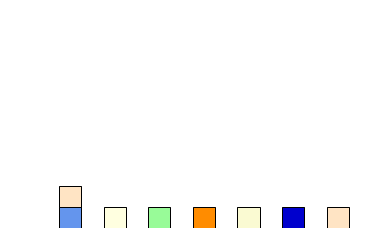

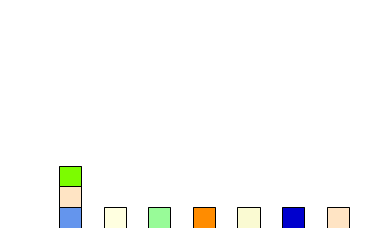

T: No, now you cannot put b0 in the tower because you must put green blocks on yellow blocks


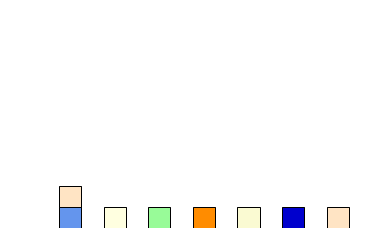

4.007648934986212 [('b0', 'yellow'), ('b2', 'green'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'yellow'), ('b6', 'blue'), ('b7', 'yellow'), ('b9', 'green')]
4.300164853353667 [('b0', 'yellow'), ('b2', 'green'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'yellow'), ('b6', 'blue'), ('b7', 'yellow'), ('b9', 'green'), ('b1', 'green')]
4.985427310786568 [('b0', 'yellow'), ('b2', 'green'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'yellow'), ('b6', 'blue'), ('b7', 'yellow'), ('b9', 'green'), ('b1', 'green'), ('b0', 'green')]
5.829746095794791 [('b0', 'yellow'), ('b2', 'green'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'yellow'), ('b6', 'blue'), ('b7', 'yellow'), ('b9', 'green'), ('b2', 'red')]
6.122262014162246 [('b0', 'yellow'), ('b2', 'green'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'yellow'), ('b6', 'blue'), ('b7', 'yellow'), ('b9', 'green'), ('b1', 'green'), ('b2', 'red')]
6.122262014162247 [('b0', 'yellow'), ('b2', 'green'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'yellow'), ('b6', 'blu

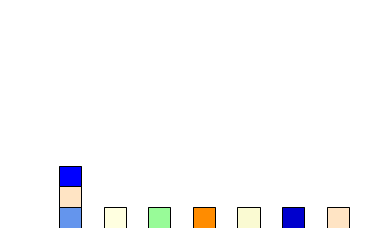

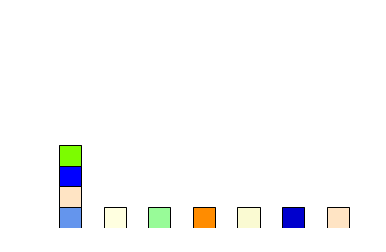

T: No, now you cannot put b0 in the tower because you must put green blocks on yellow blocks


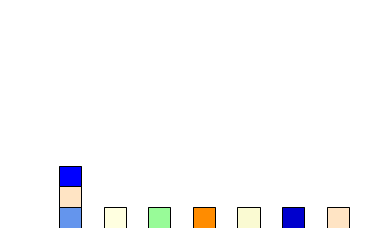

3.6335671961606493 [('b0', 'yellow'), ('b2', 'green'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'yellow'), ('b6', 'blue'), ('b9', 'green')]
3.926083114528105 [('b0', 'yellow'), ('b2', 'green'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'yellow'), ('b6', 'blue'), ('b9', 'green'), ('b1', 'green')]
5.455664356969228 [('b0', 'yellow'), ('b2', 'green'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'yellow'), ('b6', 'blue'), ('b9', 'green'), ('b2', 'red')]
5.748180275336684 [('b0', 'yellow'), ('b2', 'green'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'yellow'), ('b6', 'blue'), ('b9', 'green'), ('b1', 'green'), ('b2', 'red')]
5.748180275336684 [('b0', 'yellow'), ('b2', 'green'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'yellow'), ('b6', 'blue'), ('b9', 'green'), ('b2', 'red'), ('b1', 'green')]
6.44860736729325 [('b0', 'yellow'), ('b2', 'green'), ('b3', 'yellow'), ('b5', 'yellow'), ('b6', 'blue'), ('b9', 'green')]
6.741123285660706 [('b0', 'yellow'), ('b2', 'green'), ('b3', 'yellow'), ('b5', 'yellow

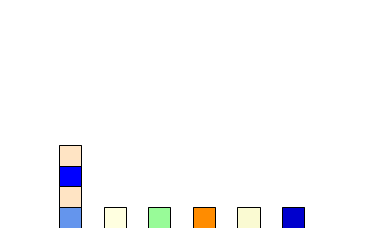

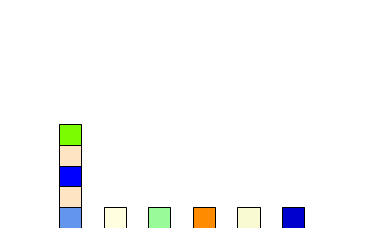

T: No, now you cannot put b0 in the tower because you must put green blocks on yellow blocks


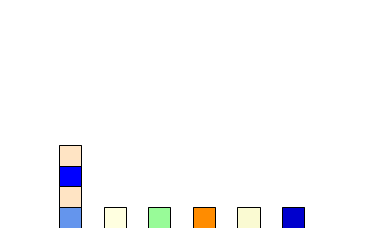

3.5995941045167124 [('b0', 'yellow'), ('b2', 'green'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'yellow'), ('b9', 'green')]
3.892110022884168 [('b0', 'yellow'), ('b2', 'green'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'yellow'), ('b9', 'green'), ('b1', 'green')]
5.4216912653252916 [('b0', 'yellow'), ('b2', 'green'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'yellow'), ('b9', 'green'), ('b2', 'red')]
5.714207183692746 [('b0', 'yellow'), ('b2', 'green'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'yellow'), ('b9', 'green'), ('b1', 'green'), ('b2', 'red')]
5.714207183692747 [('b0', 'yellow'), ('b2', 'green'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'yellow'), ('b9', 'green'), ('b2', 'red'), ('b1', 'green')]
6.414634275649313 [('b0', 'yellow'), ('b2', 'green'), ('b3', 'yellow'), ('b5', 'yellow'), ('b9', 'green')]
6.707150194016769 [('b0', 'yellow'), ('b2', 'green'), ('b3', 'yellow'), ('b5', 'yellow'), ('b9', 'green'), ('b1', 'green')]


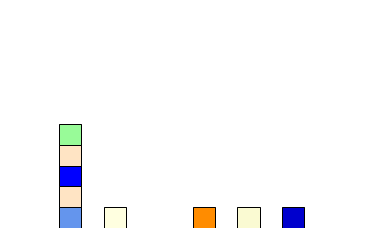

T: No, now you cannot put b0 in the tower because you must put green blocks on yellow blocks


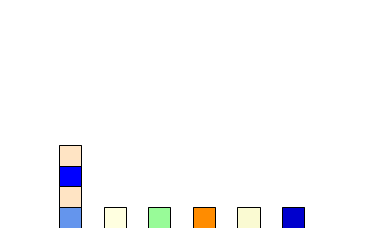

3.739941147035646 [('b0', 'yellow'), ('b1', 'green'), ('b2', 'green'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'yellow'), ('b9', 'green')]
5.562038307844224 [('b0', 'yellow'), ('b1', 'green'), ('b2', 'green'), ('b3', 'yellow'), ('b4', 'blue'), ('b5', 'yellow'), ('b9', 'green'), ('b2', 'red')]
6.554981318168247 [('b0', 'yellow'), ('b1', 'green'), ('b2', 'green'), ('b3', 'yellow'), ('b5', 'yellow'), ('b9', 'green')]


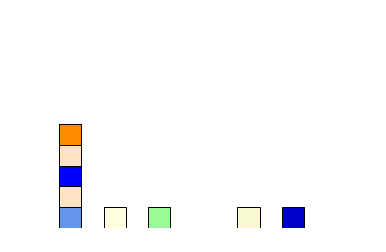

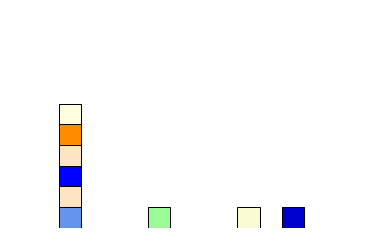

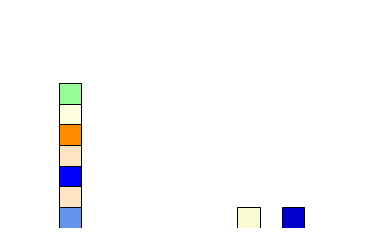

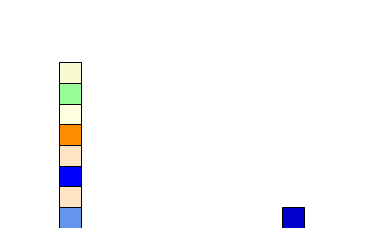

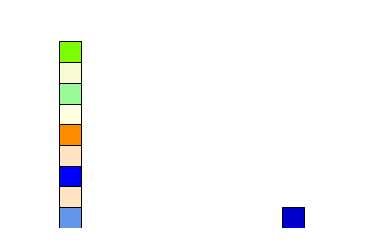

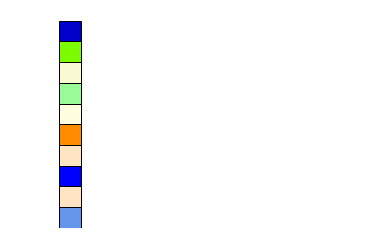

Parsing domain blocks-domain.pddl
Parsing problem tworules/problem7.pddl
7.319965839458362 [('b0', 'blue'), ('b1', 'green'), ('b2', 'blue'), ('b4', 'green'), ('b5', 'green'), ('b6', 'red'), ('b6', 'blue'), ('b7', 'green'), ('b7', 'yellow'), ('b8', 'green'), ('b8', 'yellow'), ('b9', 'blue')]
7.359483175264815 [('b0', 'blue'), ('b1', 'green'), ('b4', 'green'), ('b5', 'green'), ('b6', 'red'), ('b6', 'blue'), ('b7', 'green'), ('b7', 'yellow'), ('b8', 'green'), ('b8', 'yellow'), ('b9', 'blue')]
7.399000511071268 [('b0', 'blue'), ('b1', 'green'), ('b4', 'green'), ('b5', 'green'), ('b6', 'red'), ('b6', 'blue'), ('b7', 'green'), ('b7', 'yellow'), ('b8', 'green'), ('b8', 'yellow')]
7.80064879012439 [('b0', 'blue'), ('b1', 'green'), ('b4', 'green'), ('b5', 'green'), ('b6', 'red'), ('b7', 'green'), ('b7', 'yellow'), ('b8', 'green'), ('b8', 'yellow')]


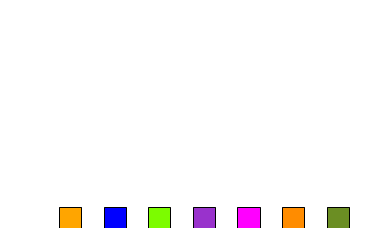

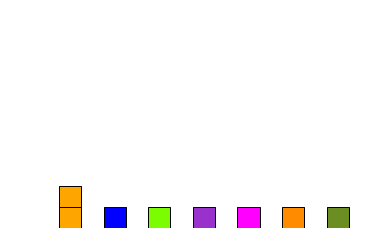

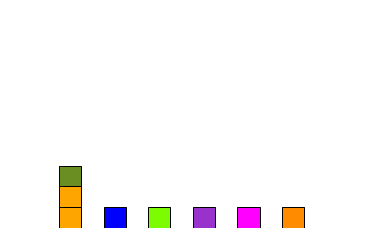

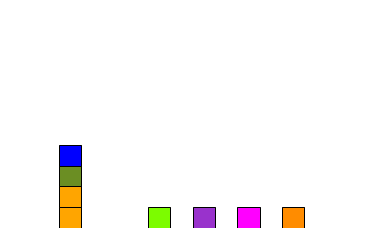

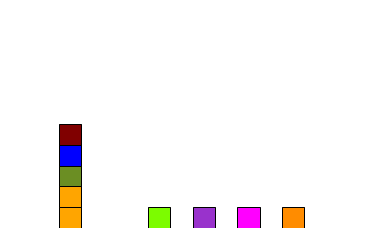

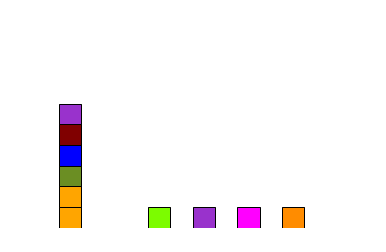

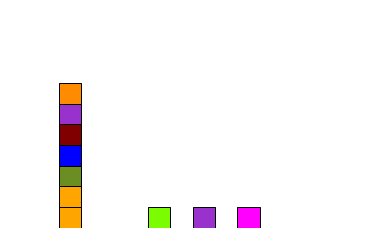

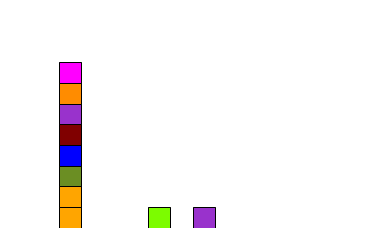

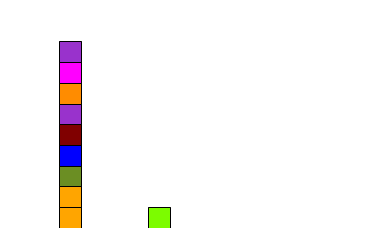

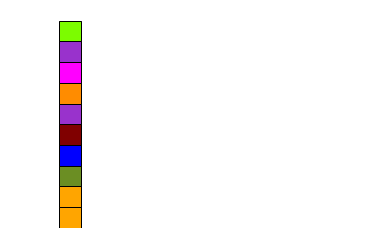

Parsing domain blocks-domain.pddl
Parsing problem tworules/problem8.pddl
5.004259352906198 [('b0', 'yellow'), ('b1', 'green'), ('b2', 'yellow'), ('b3', 'yellow'), ('b4', 'yellow'), ('b5', 'yellow'), ('b6', 'green'), ('b7', 'blue'), ('b8', 'green'), ('b9', 'red')]
5.574719559063193 [('b0', 'yellow'), ('b1', 'green'), ('b2', 'yellow'), ('b3', 'yellow'), ('b4', 'yellow'), ('b5', 'yellow'), ('b6', 'green'), ('b7', 'blue'), ('b8', 'green'), ('b9', 'red'), ('b5', 'green')]
6.2337423146618 [('b0', 'yellow'), ('b1', 'green'), ('b2', 'yellow'), ('b3', 'yellow'), ('b4', 'yellow'), ('b5', 'yellow'), ('b6', 'green'), ('b7', 'blue'), ('b8', 'green'), ('b9', 'red'), ('b5', 'green'), ('b2', 'green')]


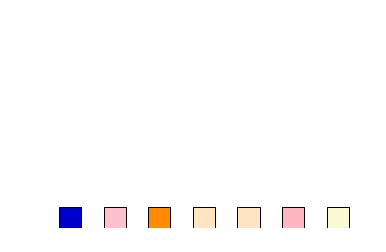

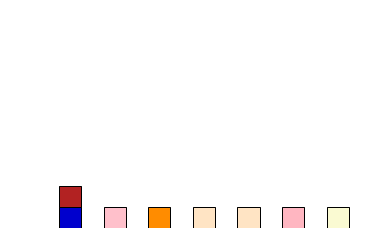

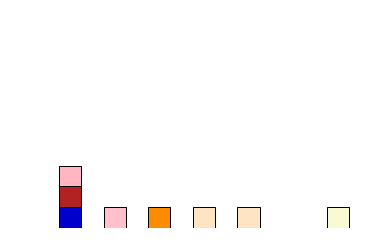

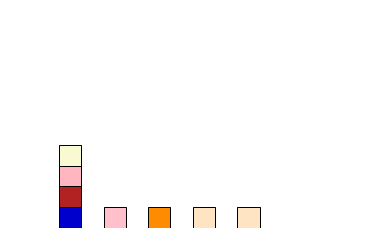

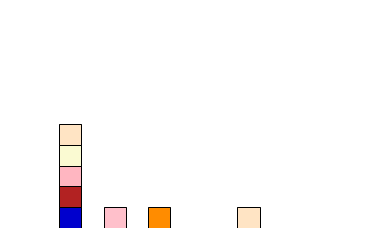

(forall (?y) (or (not (yellow ?y)) (exists (?x) (and (green ?x) (on ?x ?y)))))
T: no, put green blocks on yellow blocks


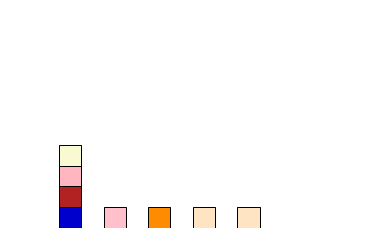

4.140845685919994 [('b0', 'yellow'), ('b1', 'green'), ('b2', 'yellow'), ('b3', 'yellow'), ('b5', 'yellow'), ('b6', 'green'), ('b8', 'green')]
4.708845906694936 [('b0', 'yellow'), ('b1', 'green'), ('b2', 'yellow'), ('b3', 'yellow'), ('b5', 'yellow'), ('b6', 'green'), ('b8', 'green'), ('b5', 'green')]
6.977444276030755 [('b1', 'green'), ('b2', 'yellow'), ('b3', 'yellow'), ('b5', 'yellow'), ('b6', 'green'), ('b8', 'green')]


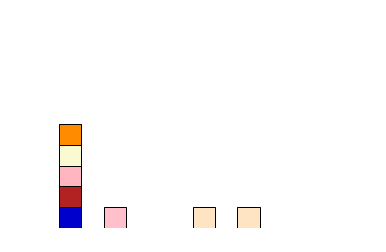

(forall (?y) (or (not (yellow ?y)) (exists (?x) (and (green ?x) (on ?x ?y)))))
T: no, put green blocks on yellow blocks


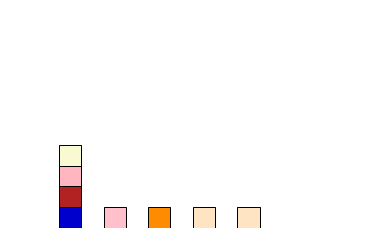

4.140845187223059 [('b0', 'yellow'), ('b1', 'green'), ('b2', 'yellow'), ('b3', 'yellow'), ('b5', 'yellow'), ('b6', 'green'), ('b8', 'green')]
4.708841152297399 [('b0', 'yellow'), ('b1', 'green'), ('b2', 'yellow'), ('b3', 'yellow'), ('b5', 'yellow'), ('b6', 'green'), ('b8', 'green'), ('b5', 'green')]
6.97744377733382 [('b1', 'green'), ('b2', 'yellow'), ('b3', 'yellow'), ('b5', 'yellow'), ('b6', 'green'), ('b8', 'green')]


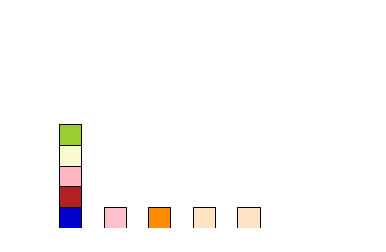

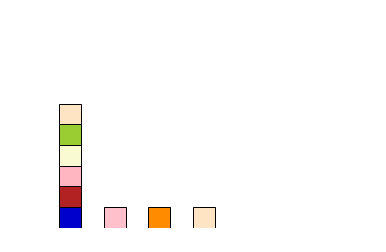

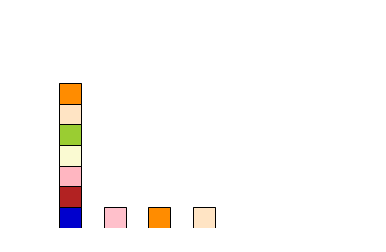

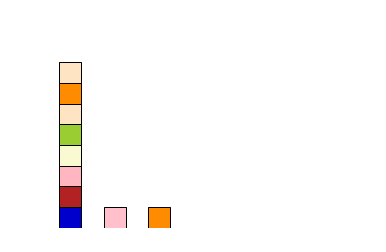

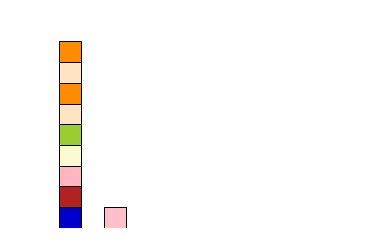

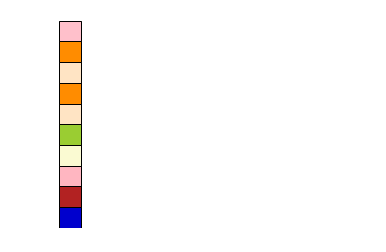

Parsing domain blocks-domain.pddl
Parsing problem tworules/problem9.pddl
5.924859921666715 [('b0', 'red'), ('b1', 'red'), ('b1', 'blue'), ('b2', 'blue'), ('b3', 'blue'), ('b4', 'blue'), ('b5', 'green'), ('b5', 'blue'), ('b6', 'green'), ('b7', 'green'), ('b7', 'yellow'), ('b8', 'red'), ('b9', 'red')]
5.944005547543793 [('b0', 'red'), ('b1', 'red'), ('b1', 'blue'), ('b2', 'blue'), ('b3', 'blue'), ('b4', 'blue'), ('b5', 'green'), ('b6', 'green'), ('b7', 'green'), ('b7', 'yellow'), ('b8', 'red'), ('b9', 'red')]
7.418515867526329 [('b0', 'red'), ('b1', 'red'), ('b1', 'blue'), ('b2', 'blue'), ('b3', 'blue'), ('b4', 'blue'), ('b5', 'green'), ('b5', 'blue'), ('b6', 'green'), ('b7', 'green'), ('b7', 'yellow'), ('b8', 'red'), ('b9', 'red'), ('b4', 'red')]
7.437661493403407 [('b0', 'red'), ('b1', 'red'), ('b1', 'blue'), ('b2', 'blue'), ('b3', 'blue'), ('b4', 'blue'), ('b5', 'green'), ('b6', 'green'), ('b7', 'green'), ('b7', 'yellow'), ('b8', 'red'), ('b9', 'red'), ('b4', 'red')]
7.452045360331276

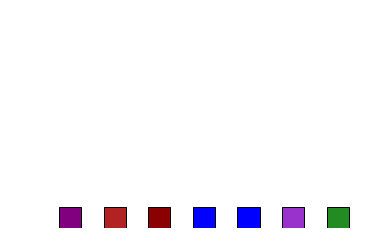

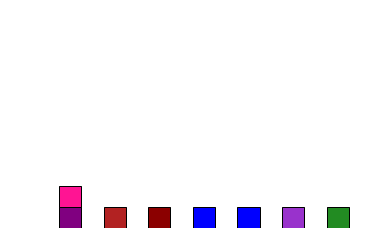

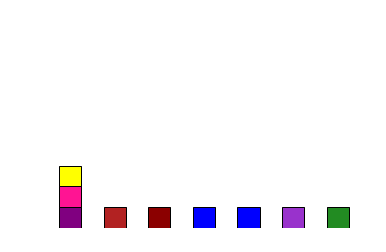

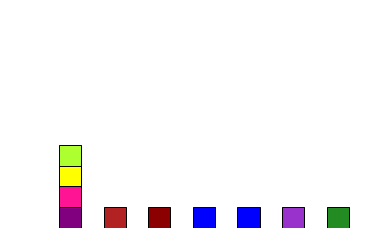

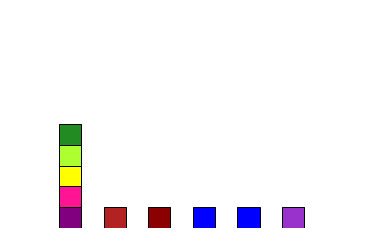

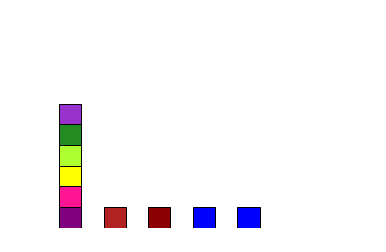

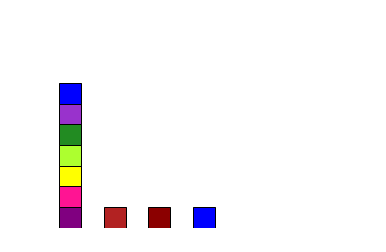

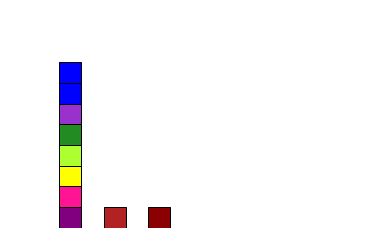

T: No, now you cannot put b0 in the tower because you must put red blocks on blue blocks


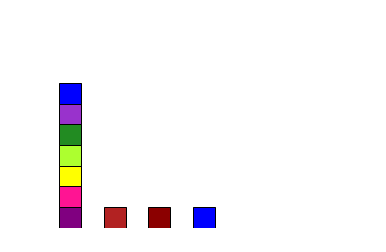

1.0443533482929361 [('b0', 'red'), ('b1', 'red'), ('b1', 'blue'), ('b2', 'blue'), ('b3', 'blue')]
1.1998818519867631 [('b0', 'red'), ('b1', 'red'), ('b2', 'blue'), ('b3', 'blue')]


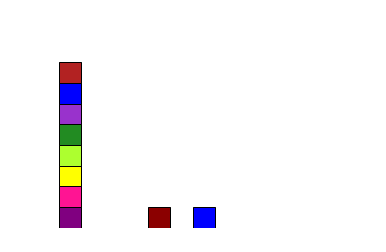

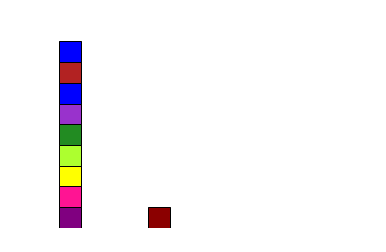

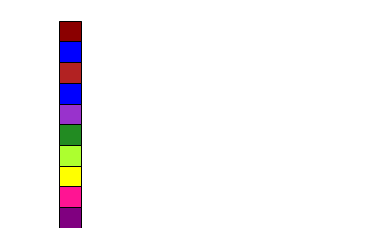

In [5]:

for problem in problems:
    w = world.PDDLWorld('blocks-domain.pddl', '{}/{}'.format(problem_dir, problem))
    agent.new_world(w)
    while not w.test_success():
        plan = agent.plan()
        for a, args in plan:
            if a == 'reach-goal':
                break
            w.update(a, args)
            w.draw()
            correction = agent.teacher.correction(w)
            if correction:
                print("T: " + correction)
                agent.get_correction(correction, a, args)

                w.draw()
#                 raise ValueError()
                break
                



In [9]:
agent.goal.subformulas
agent.tmp_goal

In [15]:
from prob_model import KDEColourModel
from evaluation import test_colour_model, colour_probs, colour_dict, name_to_rgb

In [23]:
cm = KDEColourModel('red', fix_bw=True, bw=0.15)

In [24]:
cm.update([1,0,0], 1)

In [9]:
test_colour_model(cm)

NameError: name 'cm' is not defined

In [15]:
red_cm = agent.colour_models['red']
blue_cm = agent.colour_models['blue']

In [12]:
print(red_cm.data, red_cm.weights)
print(red_cm.data_neg, red_cm.weights_neg)

[[1. 0. 0.]] [1.]
None []


In [13]:
test_colour_model(red_cm)

True Label  R=1 R=0
Predict R=1| 4 | 0 |
        R=0| 1 | 37 |


{'fn': 1, 'fp': 0, 'tn': 37, 'tp': 4}

In [16]:
test_colour_model(blue_cm)

True Label  B=1 B=0
Predict B=1| 3 | 0 |
        B=0| 6 | 33 |


{'fn': 6, 'fp': 0, 'tn': 33, 'tp': 3}

In [13]:
red_cm

In [18]:
red_cm.bw(red_cm.data)

1.0

In [28]:
cm.bw(cm.data)

0.15